#1 Pendahuluan

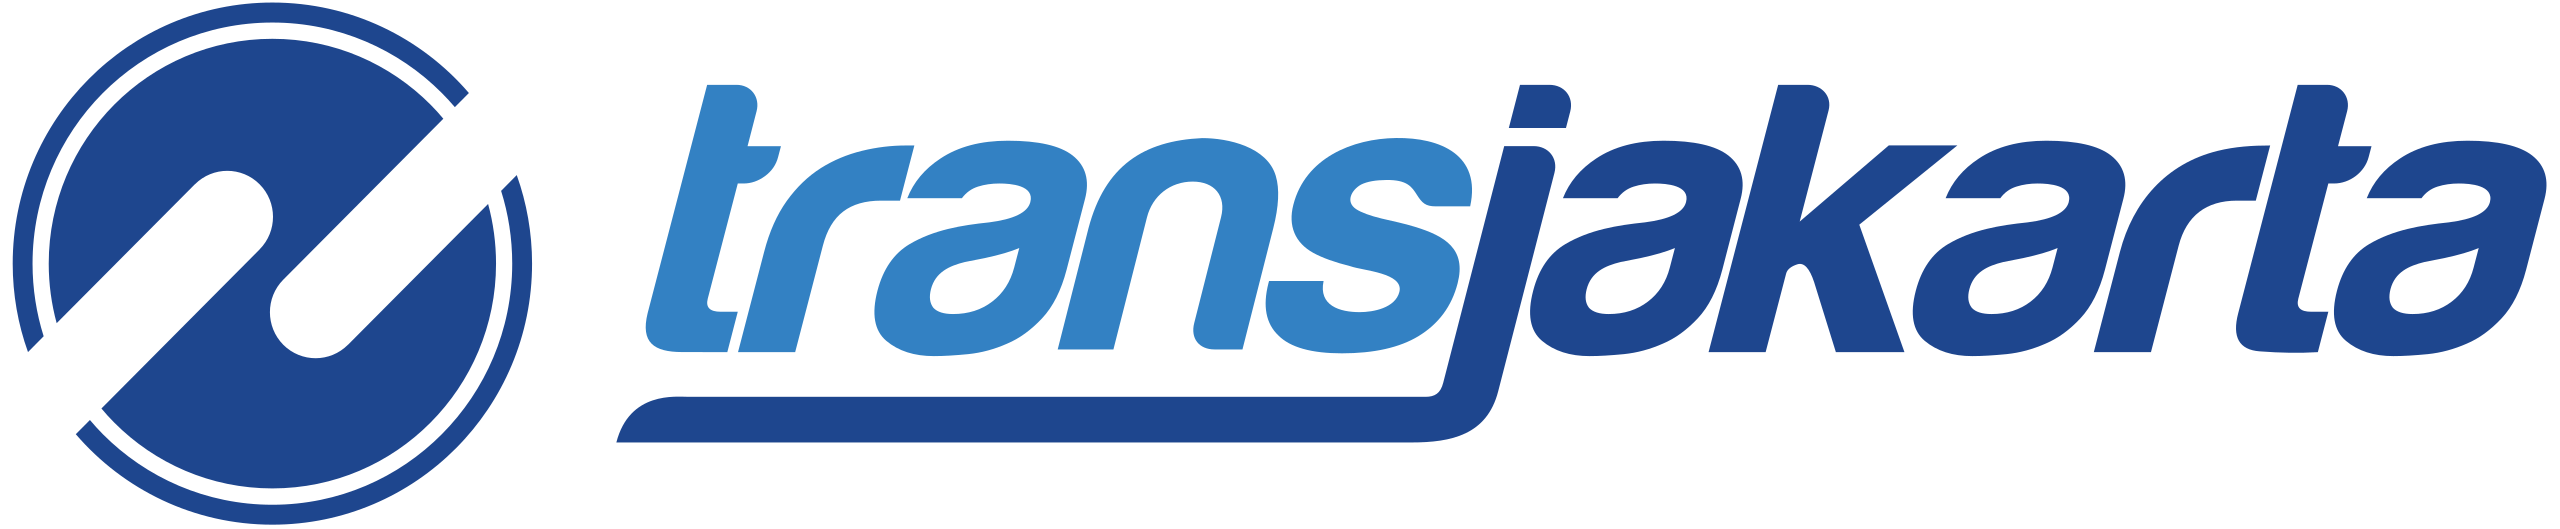

**Latar Belakang**

TransJakarta adalah sebuah sistem transportasi Bus Rapid Transit (BRT) pertama di Asia Tenggara dan Selatan dengan jalur lintasan terpanjang di dunia (208 km). Sistem BRT ini didesain berdasarkan sistem TransMilenio di Bogota, Kolombia. Terhitung sejak 1 Februari 2004, TransJakarta resmi beroperasi
Transjakarta merupakan opsi moda transportasi utama masyarakat. Pada bulan April 2023 terdapat jumlah transaksi lebih dari 30000 kali. Transjakarta sangat populer karena memiliki tarif yang terjangkau

> Visi: Menghubungkan Kehidupan Jakarta

> Misi: Bersama-sama menyediakan layanan transportasi terintegrasi yang memudahkan dan membahagiakan kehidupan Jakarta.

Pada April 2023, Transjakarta menerapkan tarif Rp0 pada banyak koridor.
Hal tersebut menyebabkan tidak ada pemasukan yang didapat dari koridor-koridor tersebut.
Seluruh biaya operasional dari koridor yang bertarif Rp0 tersebut sepenuhnya bergantung pada dana subsidi dari pemerintah.
Selain koridor bertarif Rp0, faktanya koridor yang bertarif Rp3500 dan Rp20000 juga biaya operasionalnya masih disubsidi oleh Pemerintah

Berdasarkan jumlah kendaraan dan jadwal Transjakarta yang saat ini beroperasi, sering ditemui kondisi penumpang yang berdesak-desakan. Hal ini terjadi karena Sarana Transportasi Transjakarta tidak mampu untuk menampung jumlah penumpang yang tiba-tiba membludak pada waktu-waktu tertentu. Kondisi ini tentunya dapat membuat kondisi yang kurang nyaman bagi pengguna TransJakarta

Pengguna Transjakarta mayoritas adalah wanita, bahkan pada beberapa koridor terdapat jumlah wanita yang sangat dominan dibanding dengan jumlah pria pada jam-jam sibuk. Selain wanita, segmen penumpang yang perlu diperhatikan adalah pada sektor Lansia. Meskipun jumlah lansia merupakan jumlah minoritas, tetapi lansia perlu mendapat perlakuan khusus. Oleh karena itu perlu dilakukan peningkatkan fasilitas Transjakarta untuk meningkatkan kenyamananan penumpang Wanita dan Lansia

---



**Rumusan/Batasan Masalah**

1. Bagaimana langkah yang perlu dilakukan untuk menekan biaya operasional dan mengurangi ketergantungan terhadap dana subsidi dari pemerintah
2. Bagaimana strategi pengelolaan Sistem Transjakarta pada Jam-Jam Padat agar tidak terjadi penumpukan penumpang
3. Bagaimana langkah awal yang perlu dilakukan untuk mewujudkan Transjakarta yang ramah terhadap wanita dan ramah terhadap lansia

**Penjelasan Kolom**

1.	transID: Unique transaction id for every transaction
2.	payCardID: Customers main identifier. The card customers use as a ticket for entrance and exit.
3.	payCardBank: Customers card bank issuer name
4.	payCardName: Customers name that is embedded in the card.
5.	payCardSex: Customers sex that is embedded in the card
6.	payCardBirthDate: Customers birth year
7.	corridorID: Corridor ID / Route ID as key for route grouping.
8.	corridorName: Corridor Name / Route Name contains Start and Finish for each route.
9.	direction: 0 for Go, 1 for Back. Direction of the route.
10.	tapInStops: Tap In (entrance) Stops ID for identifying stops name
11.	tapInStopsName: Tap In (entrance) Stops Name where customers tap in.
12.	tapInStopsLat: Latitude of Tap In Stops
13.	tapInStopsLon: Longitude of Tap In Stops
14.	stopStartSeq: Sequence of the stops, 1st stop, 2nd stops etc. Related to direction.
15.	tapInTime: Time of tap in. Date and time
16.	tapOutStops: Tap Out (Exit) Stops ID for identifying stops name
17.	tapOutStopsName: Tap out (exit) Stops Name where customers tap out.
18.	tapOutStopsLat: Latitude of Tap Out Stops
19.	tapOutStopsLon: Longitude of Tap Out Stops
20.	stopEndSeq: Sequence of the stops, 1st stop, 2nd stops etc. Related to direction.
21.	tapOutTime: Time of tap out. Date and time
22.	payAmount: The number of what customers pay. Some are free. Some not.



#2 Data Cleaning dan Preparation

## 2.1 Import data Transjakarta dan Library Python

In [ ]:
import pandas as pd
from google.colab import drive #tandai ini sebagai comment jika running secara offline

#Import Transjakarta dari google drive
drive.mount('/content/drive') #tandai sebagai ini comment jika running secara offline
file_path = '/content/drive/MyDrive/Transjakarta.csv'#tandai ini sebagai comment jika running secara offline

tj = pd.read_csv(file_path)#tandai ini sebagai comment jika running secara offline

#tj = pd.read_csv('Transjakarta.csv') # uncomment jika dibuka secara offline dan file csv berada 1 folder dengan file ipynb

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, normaltest
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [ ]:
tj.head()

transID         payCardID payCardBank      payCardName payCardSex  \
0  EIIW227B8L34VB   180062659848800      emoney   Bajragin Usada          M   
1  LGXO740D2N47GZ  4885331907664776         dki     Gandi Widodo          F   
2  DJWR385V2U57TO  4996225095064169         dki    Emong Wastuti          F   
3  JTUZ800U7C86EH      639099174703       flazz     Surya Wacana          F   
4  VMLO535V7F95NJ      570928206772       flazz  Embuh Mardhiyah          M   

   payCardBirthDate corridorID                              corridorName  \
0              2008          5                     Matraman Baru - Ancol   
1              1997         6C  Stasiun Tebet - Karet via Patra Kuningan   
2              1992        R1A                        Pantai Maju - Kota   
3              1978        11D       Pulo Gebang - Pulo Gadung 2 via PIK   
4              1982         12                     Tanjung Priok - Pluit   

   direction tapInStops          tapInStopsName  tapInStopsLat  tapInStopsLon  \
0        1.0     P00142               Pal Putih      -6.184631      106.84402   
1        0.0    B01963P              Kemenkes 2      -6.228700      106.83302   
2        0.0    B00499P            Gg. Kunir II      -6.133132      106.81435   
3        0.0    B05587P            Taman Elok 1      -6.195743      106.93526   
4        0.0     P00239  Sunter Boulevard Barat      -6.149650      106.88900   

   stopStartSeq            tapInTime tapOutStops        tapOutStopsName  \
0             7  2023-04-03 05:21:44      P00253                Tegalan   
1            13  2023-04-03 05:42:44     B03307P    Sampoerna Strategic   
2            38  2023-04-03 05:59:06     B04962P  Simpang Kunir Kemukus   
3            23  2023-04-03 05:44:51     B03090P      Raya Penggilingan   
4             5  2023-04-03 06:17:35      P00098       Kali Besar Barat   

   tapOutStopsLat  tapOutStopsLon  stopEndSeq           tapOutTime  payAmount  
0       -6.203101       106.85715        12.0  2023-04-03 06:00:53     3500.0  
1       -6.217152       106.81892        21.0  2023-04-03 06:40:01     3500.0  
2       -6.133731       106.81475        39.0  2023-04-03 06:50:55     3500.0  
3       -6.183068       106.93194        29.0  2023-04-03 06:28:16     3500.0  
4       -6.135355       106.81143        15.0  2023-04-03 06:57:03     3500.0

## 2.2 Mengecek Kesesuaian Tipe Data

In [ ]:
tj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

In [ ]:
tj['payCardID'] = tj['payCardID'].astype('object')
tj['tapInTime'] = pd.to_datetime(tj['tapInTime'], errors='coerce')
tj['tapOutTime'] = pd.to_datetime(tj['tapOutTime'], errors='coerce')
tj['stopEndSeq'] = pd.to_numeric(tj['stopEndSeq'], errors='coerce').astype('Int64')
tj['stopStartSeq'] = pd.to_numeric(tj['stopStartSeq'], errors='coerce').astype('Int64')
tj['payCardBirthDate'] = pd.to_datetime(tj['payCardBirthDate'], format='%Y', errors='coerce').dt.year

## 2.3 Mengecek Missing Value

In [ ]:
tj.isna().sum()[tj.isna().sum()>0]

corridorID         1257
corridorName       1930
tapInStops         1213
tapOutStops        2289
tapOutStopsName    1344
tapOutStopsLat     1344
tapOutStopsLon     1344
stopEndSeq         1344
tapOutTime         1344
payAmount          1007
dtype: int64

###2.3.1 Mengisi Missing Value pada Kolom `tapOutStops` dan `tapInStops`

In [ ]:
dataTapOut = tj[['tapOutStops','tapOutStopsName']].dropna().drop_duplicates()
dataTapIn = tj[['tapInStops','tapInStopsName']].dropna().drop_duplicates()

# Membuat Dictionary Halte dengan tapInStopsname dan tapOutStopsName sebagai keys; tapOutStops dan tapInStops sebagai values
dictTapOut = pd.Series(dataTapOut.tapOutStops.values, index=dataTapOut.tapOutStopsName).to_dict()
dictTapIn = pd.Series(dataTapIn.tapInStops.values, index=dataTapIn.tapInStopsName).to_dict()
dictHalte = dictTapOut | dictTapIn

In [ ]:
# Mengisi missing value pada tapInStops
def tapInID(x,dictHalte):
  if not pd.isna(x['tapInStops']):
    return x['tapInStops']
  else :
    return dictHalte.get(x['tapInStopsName'], None)

tj['tapInStops'] = tj.apply(lambda x: tapInID(x,dictHalte), axis=1)

In [ ]:
# Mengisi missing value pada tapOutStops
def tapOutID(x,dictHalte):
  if not pd.isna(x['tapOutStops']):
    return x['tapOutStops']
  else :
    return dictHalte.get(x['tapOutStopsName'], None)

tj['tapOutStops'] = tj.apply(lambda x: tapOutID(x,dictHalte), axis=1)

In [ ]:
tj.isna().sum()[tj.isna().sum()>0]

corridorID         1257
corridorName       1930
tapInStops           22
tapOutStops        1353
tapOutStopsName    1344
tapOutStopsLat     1344
tapOutStopsLon     1344
stopEndSeq         1344
tapOutTime         1344
payAmount          1007
dtype: int64

- Missing value dari kolom `tapInStops` berkurang dari **1213 menjadi 22**
- Missing value dari kolom `tapOutStops` berkurang dari **2289 menjadi 1353**

###2.3.2 Mengisi Missing Value pada Kolom `corridorID` dan `corridorName`

In [ ]:
dataCorridor = tj[['corridorID','corridorName']].dropna().drop_duplicates()

#Membuat dictionary dengan corridorID sebagai keys dan corridorName sebagai values
dictCorridorIDName= pd.Series(dataCorridor['corridorName'].values, index=dataCorridor['corridorID']).to_dict()

#Membuat dictionary dengan corridorName sebagai keys dan corridorID sebagai values
dictCorridorNameID = pd.Series(dataCorridor['corridorID'].values, index=dataCorridor['corridorName']).to_dict()

In [ ]:
#Mengisi missing value pada CorridorID
def koridorID(x,dictCorridorNameID):
  if not pd.isna(x['corridorID']):
    return x['corridorID']
  else :
    return dictCorridorNameID.get(x['corridorName'], None)

tj['corridorID'] = tj.apply(lambda x: koridorID(x,dictCorridorNameID), axis=1)

In [ ]:
#Mengisi missing value pada CorridorName
def koridorName(x,dictCorridorIDName):
  if not pd.isna(x['corridorName']):
    return x['corridorName']
  else :
    return dictCorridorIDName.get(x['corridorID'], None)

tj['corridorName'] = tj.apply(lambda x: koridorName(x,dictCorridorIDName), axis=1)

In [ ]:
tj.isna().sum()[tj.isna().sum()>0]

corridorID         1125
corridorName       1125
tapInStops           22
tapOutStops        1353
tapOutStopsName    1344
tapOutStopsLat     1344
tapOutStopsLon     1344
stopEndSeq         1344
tapOutTime         1344
payAmount          1007
dtype: int64

- Missing value dari kolom `corridorID` berkurang dari **1257 menjadi 1125**
- Missing value dari kolom `corridorName` berkurang dari **1930 menjadi 1125**

###2.3.3 Mengisi Missing Value pada Kolom `payAmount`

In [ ]:
dataPayAmount = tj[['corridorID','payAmount']].dropna().drop_duplicates()

#Membuat dictionary dengan corridorID sebagai keys dan corridorName sebagai values
dictCorridorIDPayAmount= pd.Series(dataPayAmount['payAmount'].values, index=dataPayAmount['corridorID']).to_dict()

In [ ]:
#Mengisi missing value pada payAmount
def payHarga(x,dictCorridorIDPayAmount):
  if not pd.isna(x['payAmount']):
    return x['payAmount']
  else :
    return dictCorridorIDPayAmount.get(x['corridorID'], None)

tj['payAmount'] = tj.apply(lambda x: payHarga(x,dictCorridorIDPayAmount), axis=1)

In [ ]:
tj.isna().sum()[tj.isna().sum()>0]

corridorID         1125
corridorName       1125
tapInStops           22
tapOutStops        1353
tapOutStopsName    1344
tapOutStopsLat     1344
tapOutStopsLon     1344
stopEndSeq         1344
tapOutTime         1344
payAmount          1007
dtype: int64

- Missing value dari kolom `payAmount` tidak berubah

In [ ]:
tj[tj['payAmount'].isna()].groupby(['corridorID'])['transID'].count()

corridorID
3H          90
JAK.48A    249
JAK.48B    159
M1H        171
M7B        310
Name: transID, dtype: int64

- Berdasarkan https://transjakarta.co.id/rute
  + **JAK48A dan JAK48B** masuk ke kategori **mikrotrans yang tarifnya 0**
  + **3H** masuk ke kategori **BRT yang tarifnya 3500**
  + **Tidak ditemukan** informasi terkait koridor **M1H dan M7B**

In [ ]:
#Update dictionary
dictCorridorIDPayAmount = dictCorridorIDPayAmount | {'JAK.48A':0, 'JAK.48B':0, '3H':3500}

#Mengisi missing value pada payAmount
tj['payAmount'] = tj.apply(lambda x: payHarga(x,dictCorridorIDPayAmount), axis=1)

In [ ]:
tj.isna().sum()[tj.isna().sum()>0]

corridorID         1125
corridorName       1125
tapInStops           22
tapOutStops        1353
tapOutStopsName    1344
tapOutStopsLat     1344
tapOutStopsLon     1344
stopEndSeq         1344
tapOutTime         1344
payAmount           509
dtype: int64

- Missing value pada kolom `payAmount` berkurang dari **1007** menjadi **509**

Kolom `tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`, `stopEndSeq` dan `tapOutTime` memiliki pola missing value secara bersama-sama dalam 1344 baris data. Ada kemungkinan hal ini terjadi karena penumpang tidak melakukan Tap Out

##2.4 Menghapus Missing Value

In [ ]:
tj = tj.dropna()
tj.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34983 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transID           34983 non-null  object        
 1   payCardID         34983 non-null  object        
 2   payCardBank       34983 non-null  object        
 3   payCardName       34983 non-null  object        
 4   payCardSex        34983 non-null  object        
 5   payCardBirthDate  34983 non-null  int32         
 6   corridorID        34983 non-null  object        
 7   corridorName      34983 non-null  object        
 8   direction         34983 non-null  float64       
 9   tapInStops        34983 non-null  object        
 10  tapInStopsName    34983 non-null  object        
 11  tapInStopsLat     34983 non-null  float64       
 12  tapInStopsLon     34983 non-null  float64       
 13  stopStartSeq      34983 non-null  Int64         
 14  tapInTime         34983 non

>Missing value pada dataframe TJ sudah dihilangkan

##2.5 Mengecek dan Menghapus Baris Data yang Terduplikat

In [ ]:
tj[tj.duplicated()]

Empty DataFrame
Columns: [transID, payCardID, payCardBank, payCardName, payCardSex, payCardBirthDate, corridorID, corridorName, direction, tapInStops, tapInStopsName, tapInStopsLat, tapInStopsLon, stopStartSeq, tapInTime, tapOutStops, tapOutStopsName, tapOutStopsLat, tapOutStopsLon, stopEndSeq, tapOutTime, payAmount]
Index: []

- Tidak ditemukan duplikat data pada dataframe TJ

##2.6 Mengecek dan Memastikan Tidak Ada Anomali

###2.6.1 Mengecek `tapInTime` yang lebih besar dari `tapOutTime`

In [ ]:
tj[tj['tapOutTime']-tj['tapInTime']< pd.Timedelta(seconds=0)]

Empty DataFrame
Columns: [transID, payCardID, payCardBank, payCardName, payCardSex, payCardBirthDate, corridorID, corridorName, direction, tapInStops, tapInStopsName, tapInStopsLat, tapInStopsLon, stopStartSeq, tapInTime, tapOutStops, tapOutStopsName, tapOutStopsLat, tapOutStopsLon, stopEndSeq, tapOutTime, payAmount]
Index: []

###2.6.2 Mengecek `payAmount` yang < 0

In [ ]:
tj[tj['payAmount']<0]

Empty DataFrame
Columns: [transID, payCardID, payCardBank, payCardName, payCardSex, payCardBirthDate, corridorID, corridorName, direction, tapInStops, tapInStopsName, tapInStopsLat, tapInStopsLon, stopStartSeq, tapInTime, tapOutStops, tapOutStopsName, tapOutStopsLat, tapOutStopsLon, stopEndSeq, tapOutTime, payAmount]
Index: []

###2.6.3 Mengecek Validitas Data `payCardBirthDate`

####2.6.3.1 Menambahkan Kolom `age` dan `ageCategory`

In [ ]:
tj['age'] = tj['tapInTime'].dt.year - tj['payCardBirthDate']

In [ ]:
def usia(x) :
  if x['age'] >=10 and x['age'] <= 18 :
    return 'Remaja'
  elif x['age'] >= 19 and x['age'] <= 44 :
    return 'Dewasa'
  elif x['age'] >= 45 and x['age'] <= 59 :
    return 'Pra Lansia'
  elif x['age'] >= 60 :
    return 'Lansia'

tj['ageCategory'] = tj.apply(usia,axis=1)

####2.6.3.2 Mengecek Anomali pada Kolom `age`

In [ ]:
tj[(tj['age']>100) | (tj['age']<0)]

Empty DataFrame
Columns: [transID, payCardID, payCardBank, payCardName, payCardSex, payCardBirthDate, corridorID, corridorName, direction, tapInStops, tapInStopsName, tapInStopsLat, tapInStopsLon, stopStartSeq, tapInTime, tapOutStops, tapOutStopsName, tapOutStopsLat, tapOutStopsLon, stopEndSeq, tapOutTime, payAmount, age, ageCategory]
Index: []

###2.6.4 Mengecek Kolom `direction`

In [ ]:
tj['direction'].unique()

array([1., 0.])

In [ ]:
# Mengubah kolom direction menjadi go dan back
def directionTJ (x) :
  if x['direction'] == 0.0 :
    return 'Go'
  elif x['direction'] == 1.0 :
    return 'Back'
  else :
    return None

tj['direction'] = tj.apply(directionTJ, axis=1)

###2.6.5 Membuat Kolom Jam, Hari dan Tanggal berdasarkan kolom `tapInTime`

In [ ]:
tj['tapInHour'] = tj['tapInTime'].dt.hour
tj['tapInDay'] = tj['tapInTime'].dt.day_name()
tj['tapInDate'] = tj['tapInTime'].dt.day

##2.7 Hasil dari Proses Data Cleaning

In [ ]:
tj.columns

Index(['transID', 'payCardID', 'payCardBank', 'payCardName', 'payCardSex',
       'payCardBirthDate', 'corridorID', 'corridorName', 'direction',
       'tapInStops', 'tapInStopsName', 'tapInStopsLat', 'tapInStopsLon',
       'stopStartSeq', 'tapInTime', 'tapOutStops', 'tapOutStopsName',
       'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime',
       'payAmount', 'age', 'ageCategory', 'tapInHour', 'tapInDay',
       'tapInDate'],
      dtype='object')

In [ ]:
# Memfilter kolom yang hanya akan digunakan pada analisis data
tj = tj[['transID', 'payCardBank', 'payCardSex','age','ageCategory',
       'corridorID', 'corridorName', 'direction',
       'tapInStops', 'tapInStopsName', 'tapInStopsLat', 'tapInStopsLon',
       'stopStartSeq', 'tapInTime', 'tapOutStops', 'tapOutStopsName',
       'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime',
       'payAmount', 'tapInHour', 'tapInDay','tapInDate']]

In [ ]:
tj.head()

transID payCardBank payCardSex  age ageCategory corridorID  \
0  EIIW227B8L34VB      emoney          M   15      Remaja          5   
1  LGXO740D2N47GZ         dki          F   26      Dewasa         6C   
2  DJWR385V2U57TO         dki          F   31      Dewasa        R1A   
3  JTUZ800U7C86EH       flazz          F   45  Pra Lansia        11D   
4  VMLO535V7F95NJ       flazz          M   41      Dewasa         12   

                               corridorName direction tapInStops  \
0                     Matraman Baru - Ancol      Back     P00142   
1  Stasiun Tebet - Karet via Patra Kuningan        Go    B01963P   
2                        Pantai Maju - Kota        Go    B00499P   
3       Pulo Gebang - Pulo Gadung 2 via PIK        Go    B05587P   
4                     Tanjung Priok - Pluit        Go     P00239   

           tapInStopsName  tapInStopsLat  tapInStopsLon  stopStartSeq  \
0               Pal Putih      -6.184631      106.84402             7   
1              Kemenkes 2      -6.228700      106.83302            13   
2            Gg. Kunir II      -6.133132      106.81435            38   
3            Taman Elok 1      -6.195743      106.93526            23   
4  Sunter Boulevard Barat      -6.149650      106.88900             5   

            tapInTime tapOutStops        tapOutStopsName  tapOutStopsLat  \
0 2023-04-03 05:21:44      P00253                Tegalan       -6.203101   
1 2023-04-03 05:42:44     B03307P    Sampoerna Strategic       -6.217152   
2 2023-04-03 05:59:06     B04962P  Simpang Kunir Kemukus       -6.133731   
3 2023-04-03 05:44:51     B03090P      Raya Penggilingan       -6.183068   
4 2023-04-03 06:17:35      P00098       Kali Besar Barat       -6.135355   

   tapOutStopsLon  stopEndSeq          tapOutTime  payAmount  tapInHour  \
0       106.85715          12 2023-04-03 06:00:53     3500.0          5   
1       106.81892          21 2023-04-03 06:40:01     3500.0          5   
2       106.81475          39 2023-04-03 06:50:55     3500.0          5   
3       106.93194          29 2023-04-03 06:28:16     3500.0          5   
4       106.81143          15 2023-04-03 06:57:03     3500.0          6   

  tapInDay  tapInDate  
0   Monday          3  
1   Monday          3  
2   Monday          3  
3   Monday          3  
4   Monday          3

In [ ]:
tj.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34983 entries, 0 to 37899
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   transID          34983 non-null  object        
 1   payCardBank      34983 non-null  object        
 2   payCardSex       34983 non-null  object        
 3   age              34983 non-null  int32         
 4   ageCategory      34983 non-null  object        
 5   corridorID       34983 non-null  object        
 6   corridorName     34983 non-null  object        
 7   direction        34983 non-null  object        
 8   tapInStops       34983 non-null  object        
 9   tapInStopsName   34983 non-null  object        
 10  tapInStopsLat    34983 non-null  float64       
 11  tapInStopsLon    34983 non-null  float64       
 12  stopStartSeq     34983 non-null  Int64         
 13  tapInTime        34983 non-null  datetime64[ns]
 14  tapOutStops      34983 non-null  object    

In [ ]:
#ekspor data frame tj menjadi csv
tj.to_csv('/content/drive/MyDrive/TransjakartaCleaned.csv', index=False)

#3 Gambaran Umum

##3.1 Gambaran Data Numerik

In [ ]:
tj.describe()

age  tapInStopsLat  tapInStopsLon  stopStartSeq  \
count  34983.000000   34983.000000   34983.000000       34983.0   
mean      32.866535      -6.214752     106.841746     13.572164   
min       11.000000      -6.394973     106.614730           0.0   
25%       23.000000      -6.245863     106.802360           4.0   
50%       33.000000      -6.214459     106.835350          10.0   
75%       41.000000      -6.175105     106.882960          19.0   
max       77.000000      -6.089429     107.023950          68.0   
std       13.036677       0.058134       0.060724     12.247474   

                           tapInTime  tapOutStopsLat  tapOutStopsLon  \
count                          34983    34983.000000    34983.000000   
mean   2023-04-16 08:04:05.445616384       -6.214511      106.841435   
min              2023-04-01 06:22:27       -6.394973      106.614730   
25%       2023-04-10 09:04:24.500000       -6.246974      106.800940   
50%              2023-04-16 17:32:08       -6.214632      106.834892   
75%              2023-04-21 21:38:22       -6.174360      106.884140   
max              2023-04-30 21:55:41       -6.091746      107.023660   
std                              NaN        0.059291        0.061373   

       stopEndSeq                     tapOutTime     payAmount     tapInHour  \
count     34983.0                          34983  34983.000000  34983.000000   
mean    21.231455  2023-04-16 09:16:14.519938560   2681.473859     12.521282   
min           1.0            2023-04-01 07:27:31      0.000000      5.000000   
25%          11.0            2023-04-10 10:18:09      0.000000      7.000000   
50%          18.0            2023-04-16 18:55:44   3500.000000     13.000000   
75%          29.0            2023-04-21 23:07:01   3500.000000     17.000000   
max          77.0            2023-04-30 23:23:18  20000.000000     21.000000   
std     13.847529                            NaN   4209.790172      5.717043   

          tapInDate  
count  34983.000000  
mean      15.793643  
min        1.000000  
25%       10.000000  
50%       16.000000  
75%       21.000000  
max       30.000000  
std        7.716997


- age:

  - Median usia adalah 33 tahun dengan rentang usia dari 11 hingga 77 tahun.

- tapInStopsLat dan tapInStopsLon:
  - Rata-rata latitudenya sekitar -6,21 dan longitudenya sekitar 106,84. Rentangnya menunjukkan lokasi di Jakarta.

- tapOutStopsLat dan tapOutStopsLon:
  - Lokasi geografis "tap out" dengan rata-rata koordinat serupa dengan "tap in".
  Ini menunjukkan perjalanan umumnya terjadi di dalam wilayah yang sama.

- payAmount:
  - Rata-rata pembayaran adalah 2.681,47 dengan rentang dari 0 hingga 20.000.

- tapInTime:
  - Min: 2023-04-01 06:22:27 → Tap in paling awal tercatat pada tanggal 1 April 2023 pukul 06:22:27.
  - Max: 2023-04-30 21:55:41 → Tap in terakhir tercatat pada tanggal 30 April 2023 pukul 21:55:41.
  
- tapOutTime:
  - Min: 2023-04-01 07:27:31 → Tap out paling awal tercatat pada tanggal 1 April 2023 pukul 07:27:31.
  - Max: 2023-04-30 23:23:18 → Tap out terakhir tercatat pada tanggal 30 April 2023 pukul 23:23:18.


<Figure size 1500x1500 with 0 Axes>

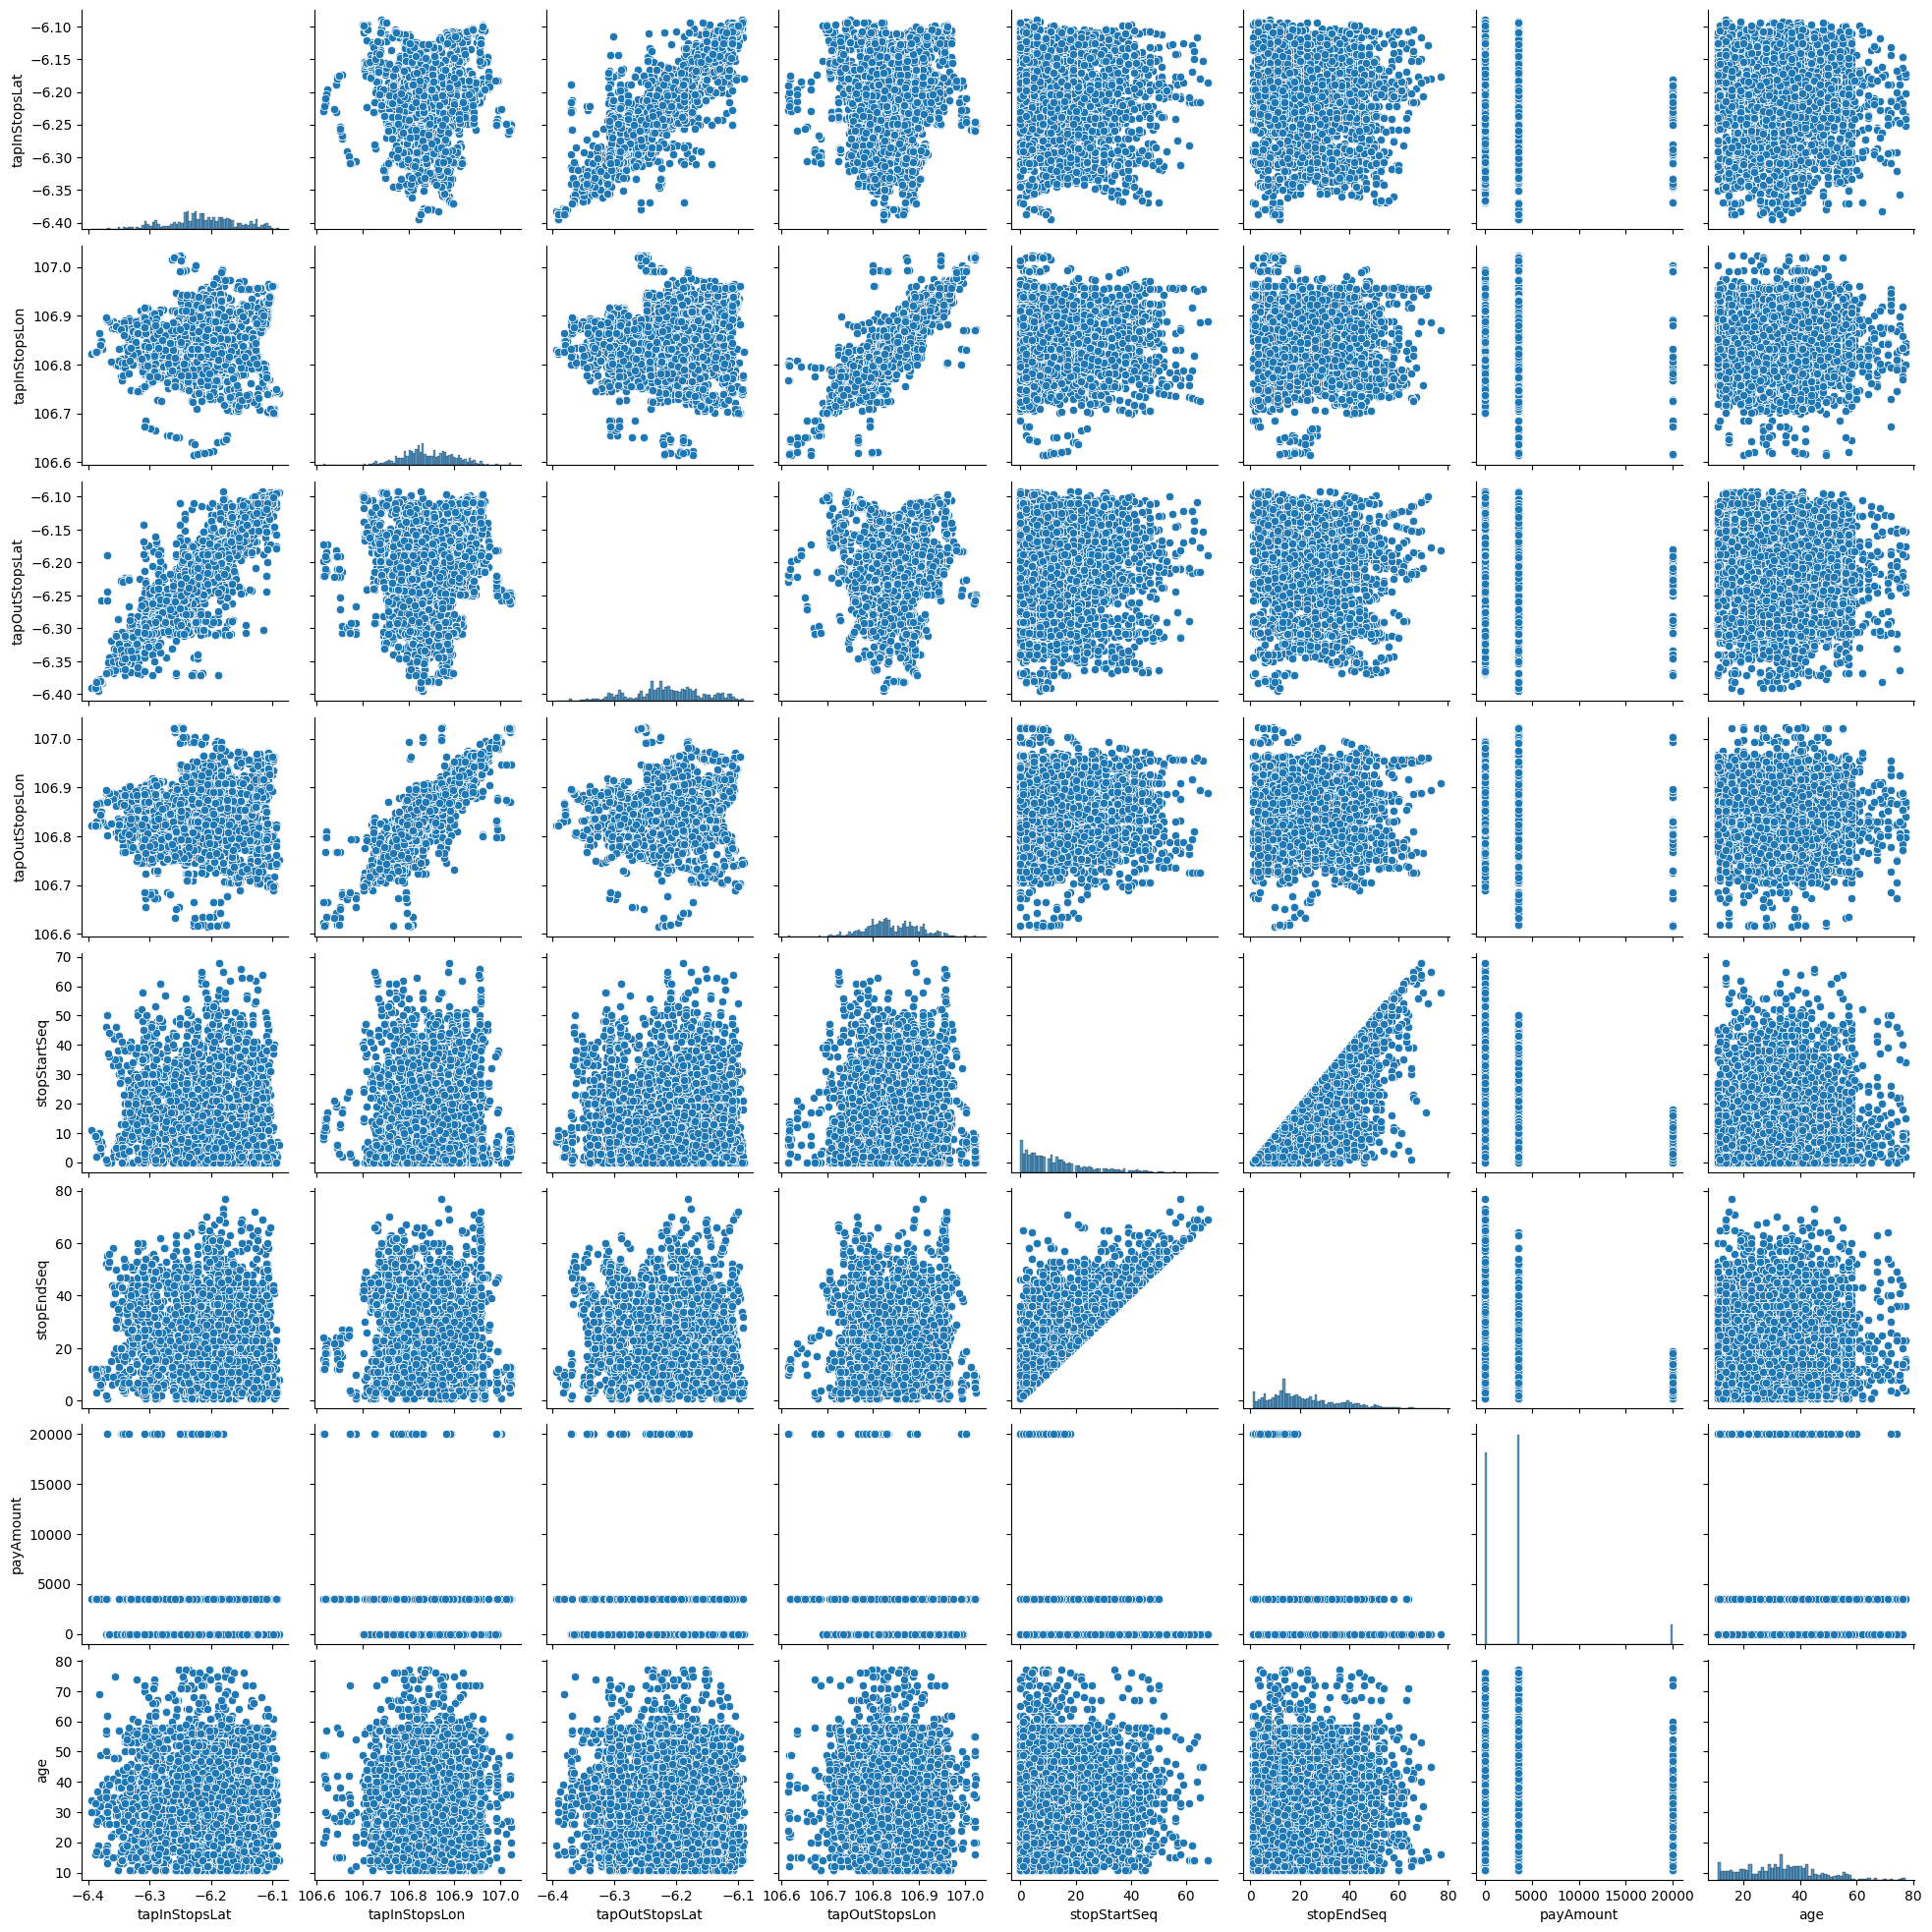

In [ ]:
plt.figure(figsize = (15,15))
sns.pairplot(tj[['tapInStopsLat','tapInStopsLon','tapOutStopsLat','tapOutStopsLon','stopStartSeq','stopEndSeq','payAmount','age']])
plt.show()

In [ ]:
# Uji Shapiro Wilk dan D'Agostino and Pearson's pada kolom numerik
kolomNumerik = (['tapInStopsLat','tapInStopsLon','tapOutStopsLat','tapOutStopsLon',
                 'stopStartSeq','stopEndSeq','payAmount','age'])

for kolom in kolomNumerik:

  shapiro_test = shapiro(tj[kolom])
  print(f"Pengujian Shapiro-Wilk untuk kolom {kolom}:")
  print(f"  Statistic: {shapiro_test.statistic}")
  print(f"  P-value: {shapiro_test.pvalue}")


  normal_test = normaltest(tj[kolom])
  print(f"Pengujian D'Agostino and Pearson's untuk kolom {kolom}:")
  print(f"  Statistic: {normal_test.statistic}")
  print(f"  P-value: {normal_test.pvalue}")
  print("-" * 50)

Pengujian Shapiro-Wilk untuk kolom tapInStopsLat:
  Statistic: 0.9881218212899155
  P-value: 1.9758479498184064e-45
Pengujian D'Agostino and Pearson's untuk kolom tapInStopsLat:
  Statistic: 497.07238683894496
  P-value: 1.1537259065474508e-108
--------------------------------------------------
Pengujian Shapiro-Wilk untuk kolom tapInStopsLon:
  Statistic: 0.9922872968487908
  P-value: 2.047799149393162e-38
Pengujian D'Agostino and Pearson's untuk kolom tapInStopsLon:
  Statistic: 375.4161852184372
  P-value: 3.015859958752029e-82
--------------------------------------------------
Pengujian Shapiro-Wilk untuk kolom tapOutStopsLat:
  Statistic: 0.9872593177353277
  P-value: 1.2567501353863663e-46
Pengujian D'Agostino and Pearson's untuk kolom tapOutStopsLat:
  Statistic: 576.8803512584863
  P-value: 5.3953964893235146e-126
--------------------------------------------------
Pengujian Shapiro-Wilk untuk kolom tapOutStopsLon:
  Statistic: 0.9937285897121056
  P-value: 2.8537519753065387e-3

- Berdasarkan pairplot : **Semua kolom numerik** pada dataframe TJ **tidak berdistribusi normal**

- Berdasarkan pengujian Shapiro-Wilk dan D'Agostino and Pearson's: **Semua kolom numerik tidak berdistribusi normal**

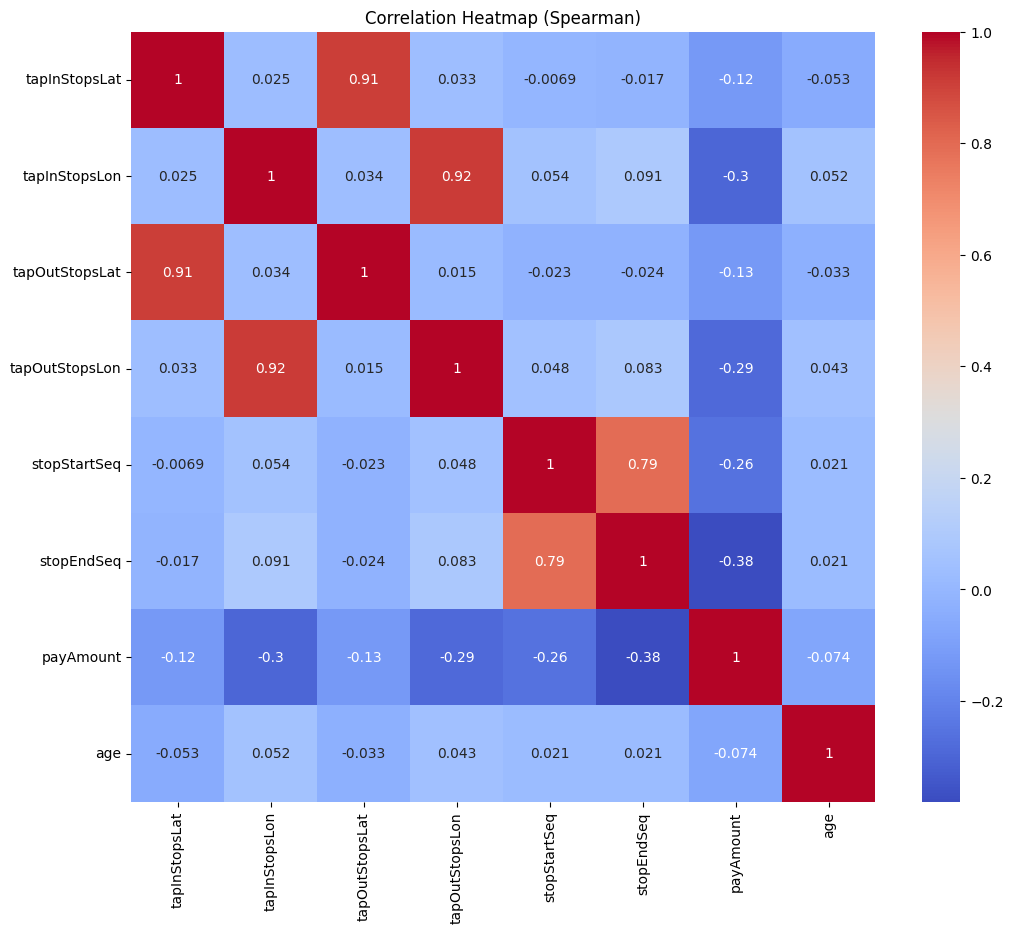

In [ ]:
#Mengecek korelasi dengan metode Spearman karena distribusi data tidak normal
plt.figure(figsize=(12, 10))
sns.heatmap(tj[['tapInStopsLat','tapInStopsLon','tapOutStopsLat','tapOutStopsLon','stopStartSeq','stopEndSeq','payAmount','age']].corr(method='spearman'), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Spearman)')
plt.show()

- Berdasarkan heatmap
  + **tapOutStopsLon dan tapInStopsLon** berkorelasi 0.92
  + **tapOutStopsLat dan tapInStopsLat** berkorelasi 0.91
  + **stopStartSeq dan stopEndSeq** berkorelasi 0.79
- Korelasi tersebut menunjukan ada kecenderungan mayoritas pengguna bertransportasi dengan TransJakarta untuk jarak yang dekat

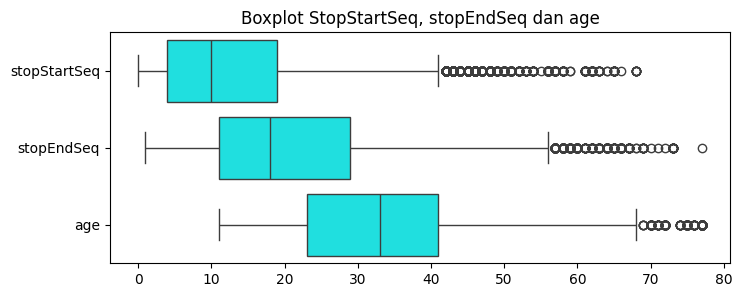

In [ ]:
plt.figure(figsize=(8, 3))
sns.boxplot(data=tj[['stopStartSeq', 'stopEndSeq', 'age']], color='cyan', orient='h')
plt.title('Boxplot StopStartSeq, stopEndSeq dan age')
plt.show()

- Terdapat Outlier pada kolom stopStartSeq, stopEndSeq dan age

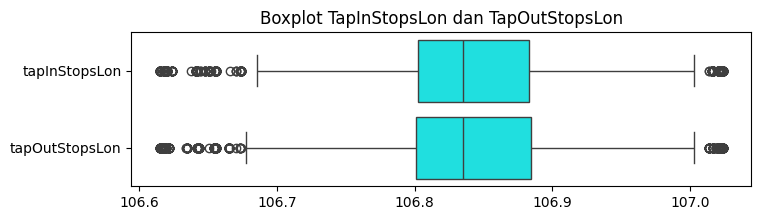

In [ ]:
plt.figure(figsize=(8, 2))
sns.boxplot(data=tj[['tapInStopsLon', 'tapOutStopsLon']], color='cyan', orient='h')
plt.title('Boxplot TapInStopsLon dan TapOutStopsLon')
plt.show()

- Terdapat Outlier pada kolom tapInStopsLon dan tapOutStopsLon

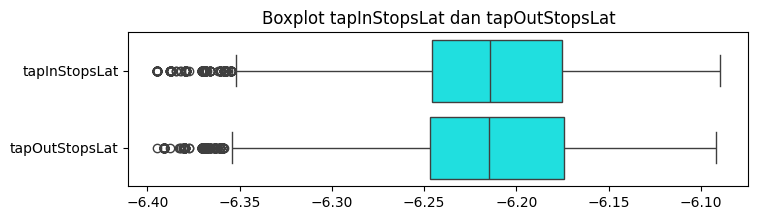

In [ ]:
plt.figure(figsize=(8, 2))
sns.boxplot(data=tj[['tapInStopsLat', 'tapOutStopsLat']], color='cyan', orient='h')
plt.title('Boxplot tapInStopsLat dan tapOutStopsLat')
plt.show()

- Terdapat Outlier pada kolom tapInStopsLat dan tapOutStopsLat

In [ ]:
def outlier(df, listKolom):
  outliers = {}
  for kolom in listKolom:
    Q1 = df[kolom].quantile(0.25)
    Q3 = df[kolom].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    kolomOutliers = df[(df[kolom] < lower_bound) | (df[kolom] > upper_bound)]
    outliers[kolom] = len(kolomOutliers)
  return outliers

kolomNumerik = ['tapInStopsLat', 'tapInStopsLon', 'tapOutStopsLat', 'tapOutStopsLon', 'stopStartSeq', 'stopEndSeq', 'age']
jumlahOutlier = outlier(tj, kolomNumerik)

for kolom, jumlah in jumlahOutlier.items():
  print(f"Jumlah outlier pada kolom {kolom} adalah {jumlah}")

Jumlah outlier pada kolom tapInStopsLat adalah 356
Jumlah outlier pada kolom tapInStopsLon adalah 521
Jumlah outlier pada kolom tapOutStopsLat adalah 347
Jumlah outlier pada kolom tapOutStopsLon adalah 419
Jumlah outlier pada kolom stopStartSeq adalah 1420
Jumlah outlier pada kolom stopEndSeq adalah 558
Jumlah outlier pada kolom age adalah 315


##3.2 Gambaran Data Kategorik

In [ ]:
tj.describe(include='object')

transID payCardBank payCardSex ageCategory corridorID  \
count            34983       34983      34983       34983      34983   
unique           34983           6          2           4        219   
top     EIIW227B8L34VB         dki          F      Dewasa         1T   
freq                 1       17326      18639       23255        384   

                corridorName direction tapInStops tapInStopsName tapOutStops  \
count                  34983     34983      34983          34983       34983   
unique                   214         2       2501           2500        2190   
top     Cibubur - Balai Kota      Back     P00170    Penjaringan      P00016   
freq                     384     17509        229            229         302   

       tapOutStopsName tapInDay  
count            34983    34983  
unique            2189        7  
top                BKN   Friday  
freq               302     6351

- Jumlah transaksi Transjakarta pada bulan April 2023 adalah **34983**
- Media pembayaran terbanyak menggunakan **kartu bank DKI**
- **Wanita** memiliki jumlah transaksi yang lebih banyak dibanding pria
- **Dewasa** merupakan segmen usia pengguna Transjakarta terbanyak
- Koridor dengan jumlah transaksi terbanyak adalah **Koridor 1T - Cibubur-Balai Kota** dengan **384 transaksi**
- Jumlah transaksi pada **direction back** lebih banyak dari direction go
- Halte dengan jumlah aktivitas tap in terbanyak adalah **P00170 Penjaringan** dengan jumlah **229**
- Halte dengan jumlah aktivitas tap out terbanyak adalah **P00016 BKN** dengan jumlah **302**
- Hari dengan akumulasi jumlah transaksi terbanyak adalah **Jumat**

#4 Analisis dan Pembahasan

##4.1 Evaluasi Keberjalanan Sistem Transjakarta untuk Menekan Biaya Operasional

###Problem: Biaya Operasional Moda Transportasi Transjakarta Masih Mengandalkan Dana Subsidi Pemerintah

- Pada **April 2023**, Transjakarta masih menerapkan **tarif Rp0** pada banyak koridor.
Hal tersebut menyebabkan **tidak ada pemasukan yang didapat dari pengguna** yang menggunakan **koridor bertarif Rp0** tersebut.
- **Seluruh biaya operasional dari koridor yang bertarif Rp0** tersebut **sepenuhnya sangat bergantung dana subsidi** dari pemerintah
Selain koridor bertarif Rp0, **koridor yang bertarif Rp3500 dan Rp20000** biaya operasionalnya juga masih dibantu oleh **dana subsidi** dari Pemerintah


In [ ]:
# Menentukan koridor yang memiliki tarif 0 rupiah
dfCorridorPerPay = (tj.groupby(by=['corridorID','payAmount'])
                      .head(1)[['corridorID','corridorName','payAmount']]
                      .groupby(by=['payAmount'])['corridorID'].count()
                      .reset_index()
                      )
dfCorridorPerPay['percentage'] = dfCorridorPerPay['corridorID'] / dfCorridorPerPay['corridorID'].sum() * 100

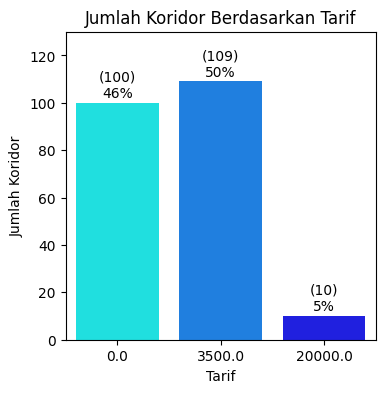

In [ ]:
# Membuat barplot tarif terhadap jumlah koridor
plt.figure(figsize=(4,4))
sns.barplot(x=dfCorridorPerPay['payAmount'], y=dfCorridorPerPay['corridorID'], palette='blend:cyan,blue')
plt.xlabel('Tarif')
plt.ylabel('Jumlah Koridor')
plt.title('Jumlah Koridor Berdasarkan Tarif')
plt.ylim(0,130)

# Menambahkan label percentage dari jumlah koridor
for i, v in enumerate(dfCorridorPerPay['corridorID']):
    plt.text(i, v + 1, f"{dfCorridorPerPay['percentage'].iloc[i]:.0f}%", ha='center', va='bottom')

# Menambahkan label jumlah koridor
for i, v in enumerate(dfCorridorPerPay['corridorID']):
    plt.text(i, v + 8, f"({v})", ha='center', va='bottom')

plt.show()

1. Pada bulan **April 2023** terdapat total **219 Koridor** Transjakarta yang beroperasi
2. Sebanyak **100 Koridor** atau **46% Koridor** yang **bertarif Rp.0**, artinya disubsidi 100% oleh pemerintah


In [ ]:
# Menentukan jumlah transaksi yang memiliki tarif 0 rupiah
dfCorridorPerTrans = (tj.groupby(by=['payAmount'])['transID'].count().reset_index())
dfCorridorPerTrans['percentage'] = dfCorridorPerTrans['transID']/dfCorridorPerTrans['transID'].sum() * 100

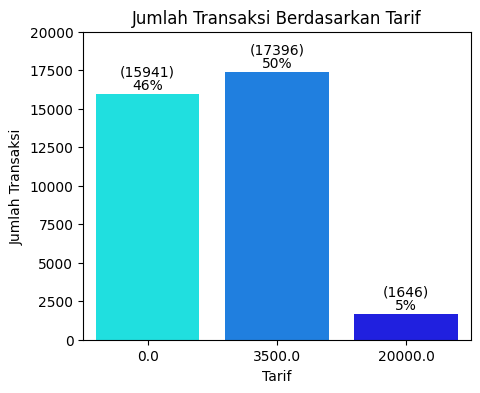

In [ ]:
# Membuat barplot tarif terhadap jumlah Transaksi
plt.figure(figsize=(5,4))
sns.barplot(x=dfCorridorPerTrans['payAmount'], y=dfCorridorPerTrans['transID'], palette='blend:cyan,blue')
plt.xlabel('Tarif')
plt.ylabel('Jumlah Transaksi')
plt.title('Jumlah Transaksi Berdasarkan Tarif')
plt.yticks([x for x in range(0,20001,2500)])

# Menambahkan label percentage dari jumlah Transaksi
for i, v in enumerate(dfCorridorPerTrans['transID']):
  plt.text(i, v + 100, f"{dfCorridorPerTrans['percentage'].iloc[i]:.0f}%", ha='center', va='bottom')

# Menambahkan label jumlah Transaksi
for i, v in enumerate(dfCorridorPerTrans['transID']):
  plt.text(i, v + 1000, f"({v})", ha='center', va='bottom')

plt.show()

1. Pada **April 2023** terdapat total **34983 transaksi** Transjakarta
2. Sebanyak **15941 transaksi** atau **46% dari total transaksi** bernilai **Rp.0**


### Menaikkan Tarif BUKANLAH SOLUSI!

**Ketergantungan yang tinggi terhadap subsidi pemerintah** bisa menjadi **bumerang** dikemudian hari jika sewaktu-waktu pemerintah mengurangi atau bahkan mencabut subsidi untuk biaya operasional Transjakarta

**Menaikkan tarif transjakarta** untuk mengurangi ketergantungan pada subsidi dana dari pemerintah tentunya **tidak efektif** karena dapat **membebani masyarakat** sebagai pengguna Transjakarta

Perlu dilakukan **analisis terhadap keberjalanan sistem Transjakarta** untuk **menekan beban biaya operasional dan meningkatkan pemasukan**

###4.1.1 Analisis Koridor yang Jarang Digunakan oleh Masyarakat

In [ ]:
# Membuat dataframe koridor dengan jumlah pengguna terendah pada April 2023
dfMinCorridor = (tj.groupby(['corridorID','corridorName'])['transID'].count()
                                .sort_values()
                                .reset_index()
                                .rename(columns={'transID':'totalTransaksi'})
                                )
dfMinCorridor['percentage'] = dfMinCorridor['totalTransaksi']/dfMinCorridor['totalTransaksi'].sum() * 100
dfMinCorridor = dfMinCorridor.head(25)
dfMinCorridor

corridorID                                    corridorName  totalTransaksi  \
0          M5                           Matraman Baru - Ancol              17   
1          7B                       Kampung Rambutan - Blok M              17   
2      JAK.12  Tanah Abang - Kebayoran Lama via Pos Pengumben              22   
3      JAK.99                     Term. Pulo Gadung - Lampiri              30   
4          1R                             Senen - Tanah Abang              38   
5      JAK.53                Grogol - Pos Pengumben via Slipi              39   
6          2Q                         Gondangdia - Balai Kota              39   
7          7P                             Pondok Kelapa - BKN              47   
8          6M                      Stasiun Manggarai - Blok M              53   
9         12F               Rusun Marunda - Rusun Waduk Pluit              54   
10        11C            Rusun Pinus Elok - Rusun Pulo Gebang              54   
11        12P                    St. LRT Pegangsaan Dua - JIS              54   
12         1N                            Tanah Abang - Blok M              56   
13         5B                             Stasiun Tebet - BNN              57   
14     JAK.33                              Pulo Gadung - Kota              59   
15         M1                                   Blok M - Kota              60   
16          9                            Pinang Ranti - Pluit              61   
17         M2                             Pulo Gadung - Monas              61   
18         M6                            Ragunan - MH Thamrin              62   
19     JAK.59                        Rawamangun - Tanah Merah              64   
20     JAK.47          Pasar Minggu - Ciganjur via KB Ragunan              66   
21     JAK.52       Terminal Kalideres - Terminal Muara Angke              67   
22         M8                        Lebak Bulus - Pasar Baru              69   
23     JAK.28                 Kp. Rambutan - Taman Wiladatika              75   
24     JAK.80                       Rawa Buaya - Rawa Kompeni              78   

    percentage  
0     0.048595  
1     0.048595  
2     0.062888  
3     0.085756  
4     0.108624  
5     0.111483  
6     0.111483  
7     0.134351  
8     0.151502  
9     0.154361  
10    0.154361  
11    0.154361  
12    0.160078  
13    0.162936  
14    0.168653  
15    0.171512  
16    0.174370  
17    0.174370  
18    0.177229  
19    0.182946  
20    0.188663  
21    0.191522  
22    0.197239  
23    0.214390  
24    0.222965

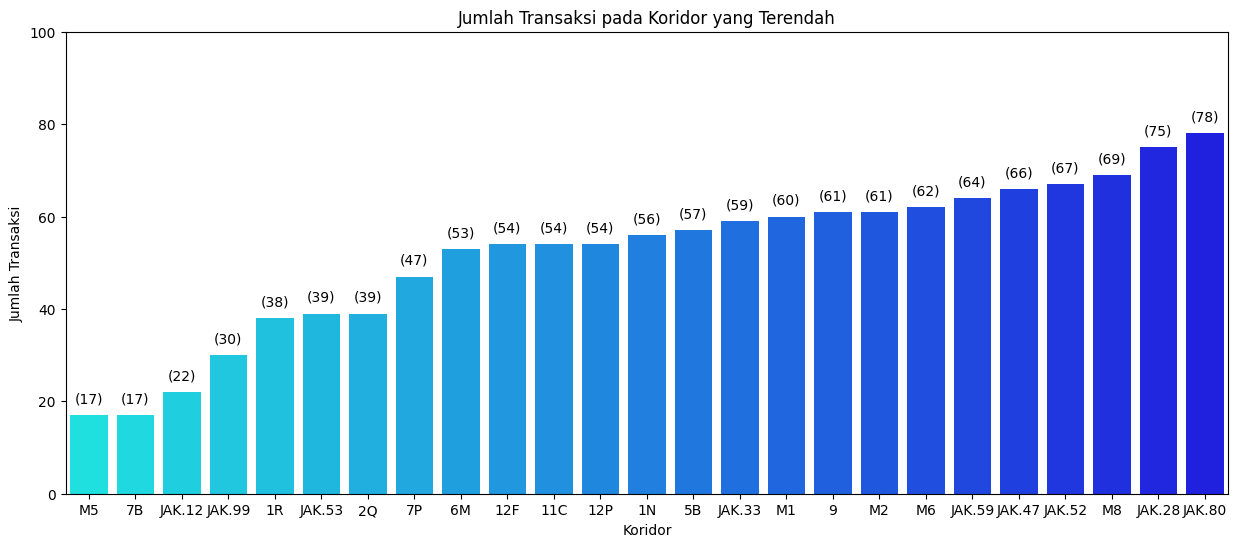

In [ ]:
# Membuat barplot Koridor terhadap jumlah Transaksi
plt.figure(figsize=(15,6))
sns.barplot(x=dfMinCorridor['corridorID'], y=dfMinCorridor['totalTransaksi'], palette='blend:cyan,blue')
plt.xlabel('Koridor')
plt.ylabel('Jumlah Transaksi')
plt.title('Jumlah Transaksi pada Koridor yang Terendah')
plt.yticks([x for x in range(0,101,20)])


# Menambahkan label jumlah Transaksi
for i, v in enumerate(dfMinCorridor['totalTransaksi']):
    plt.text(i, v + 2, f"({v})", ha='center', va='bottom')

plt.show()

In [ ]:
minCorridorForPlot = (tj[tj['corridorID'].isin(dfMinCorridor['corridorID'])]
      [['corridorID','transID','tapInDate','tapInDay','tapInHour']]
      .groupby(['corridorID','tapInDate'])['transID'].count()
      .sort_values(ascending=True)
      .unstack().reindex(dfMinCorridor['corridorID'])
 )
# Menginput manual pada tanggal 1 dan 2 dengan nilai 0 karena di tanggal 1 dan 2 jumlah penumpang = 0 (tidak ada penumpang)
minCorridorForPlot[[1,2]] = 0
minCorridorForPlot = minCorridorForPlot.fillna(0).T.sort_index() # DataFrame di transpose agar tanggal menjadi index lalu diurutkan
minCorridorForPlot.head()

corridorID   M5   7B  JAK.12  JAK.99   1R  JAK.53   2Q   7P   6M  12F  11C  \
tapInDate                                                                    
1           0.0  0.0     0.0     0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0   
2           0.0  0.0     0.0     0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0   
3           0.0  0.0     0.0     1.0  0.0     1.0  0.0  2.0  2.0  2.0  2.0   
4           0.0  0.0     0.0     0.0  0.0     0.0  0.0  2.0  2.0  2.0  2.0   
5           0.0  0.0     0.0     0.0  0.0     0.0  0.0  2.0  1.0  2.0  1.0   

corridorID  12P   1N   5B  JAK.33   M1    9   M2   M6  JAK.59  JAK.47  JAK.52  \
tapInDate                                                                       
1           0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0     0.0     0.0     0.0   
2           0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0     0.0     0.0     0.0   
3           2.0  2.0  2.0     1.0  2.0  2.0  2.0  2.0     2.0     2.0     2.0   
4           2.0  3.0  2.0     2.0  2.0  2.0  2.0  2.0     2.0     2.0     2.0   
5           2.0  3.0  2.0     1.0  2.0  1.0  2.0  2.0     2.0     2.0     2.0   

corridorID   M8  JAK.28  JAK.80  
tapInDate                        
1           0.0     0.0     0.0  
2           0.0     0.0     0.0  
3           2.0     2.0     2.0  
4           2.0     2.0     1.0  
5           2.0     1.0     2.0

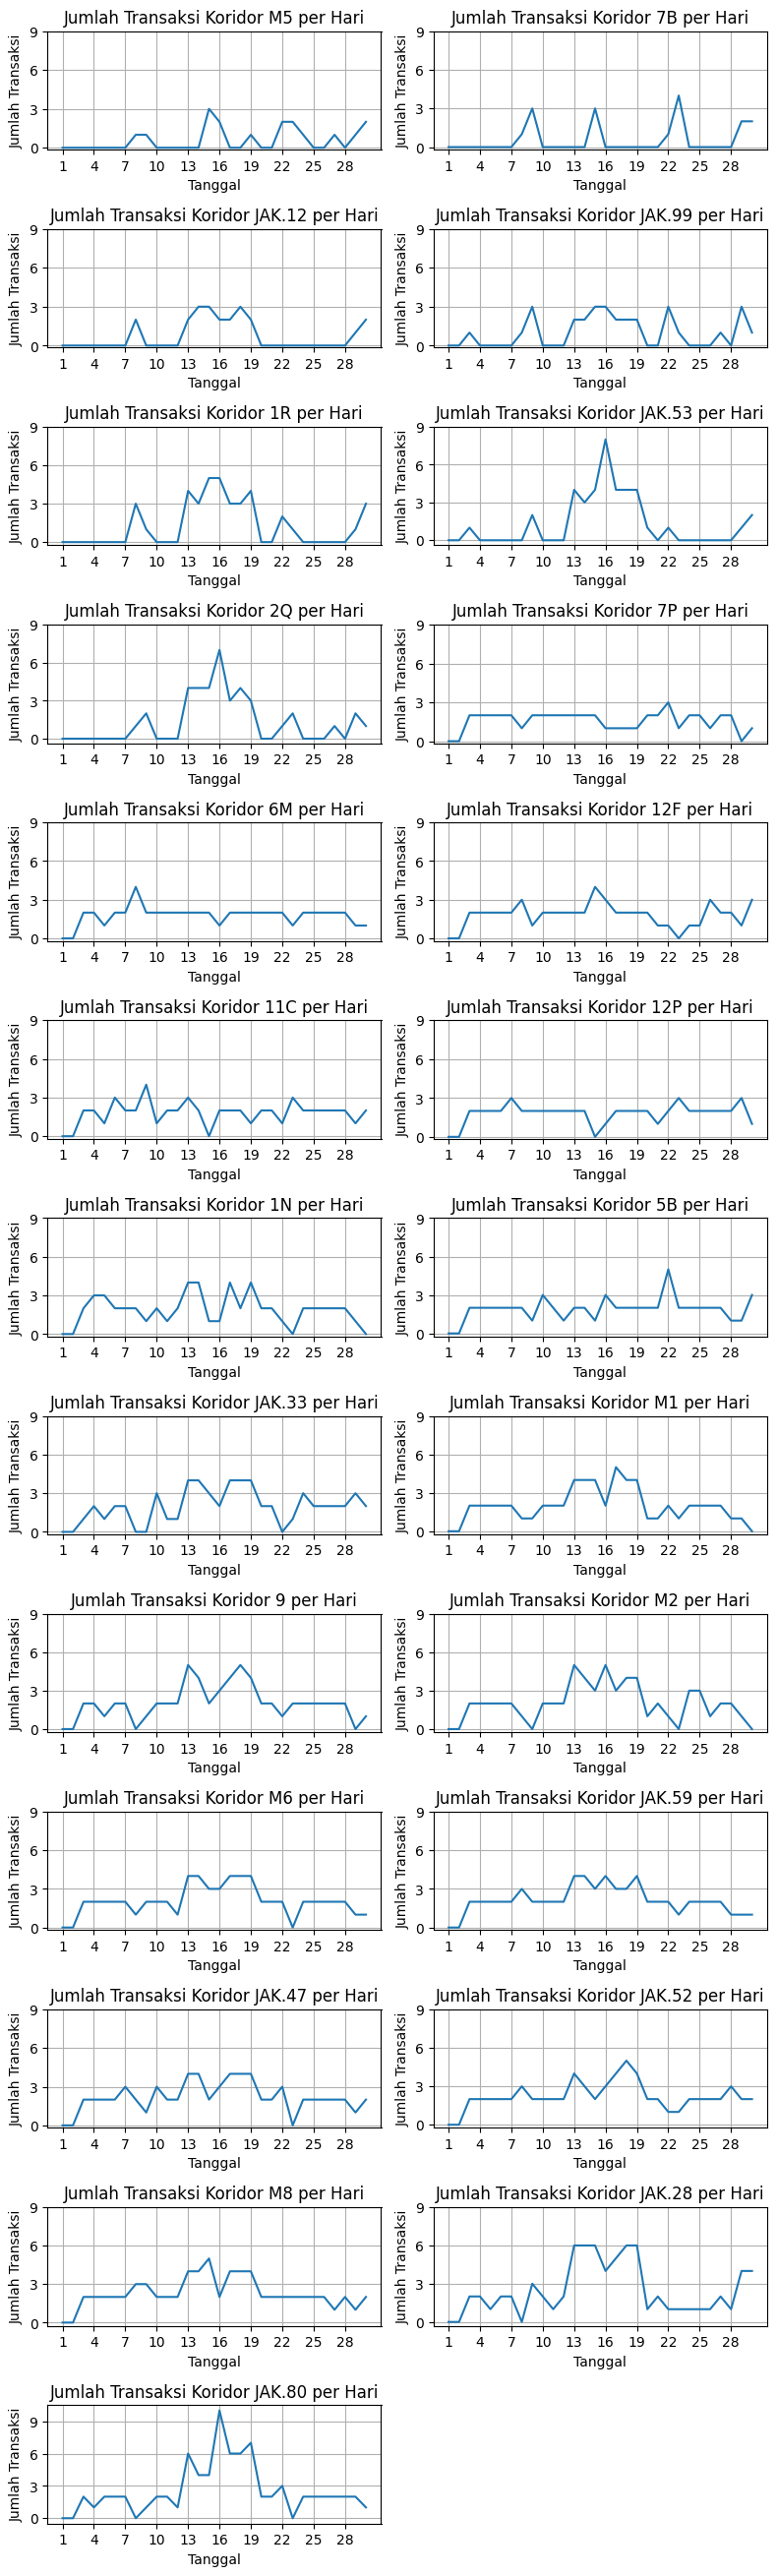

In [ ]:
plt.figure(figsize=(8, 50))
for corridor in minCorridorForPlot.columns:
  plt.subplot(len(minCorridorForPlot.columns), 2, minCorridorForPlot.columns.get_loc(corridor) + 1)
  sns.lineplot(x = minCorridorForPlot.index, y = minCorridorForPlot[corridor])
  plt.xlabel('Tanggal')
  plt.ylabel('Jumlah Transaksi')
  plt.title(f'Jumlah Transaksi Koridor {corridor} per Hari')
  plt.grid(True)
  plt.xticks([x for x in range(1,31,3)])
  plt.yticks([x for x in range(0,11,3)])
  plt.tight_layout()
plt.show()

In [ ]:
print('Pada bulan April 2023:')
for corridor in minCorridorForPlot.columns :
  print(f'- {corridor} terdapat transaksi berjumlah 0 sebanyak {(minCorridorForPlot[corridor]==0).sum()} hari')

Pada bulan April 2023:
- M5 terdapat transaksi berjumlah 0 sebanyak 19 hari
- 7B terdapat transaksi berjumlah 0 sebanyak 23 hari
- JAK.12 terdapat transaksi berjumlah 0 sebanyak 20 hari
- JAK.99 terdapat transaksi berjumlah 0 sebanyak 15 hari
- 1R terdapat transaksi berjumlah 0 sebanyak 17 hari
- JAK.53 terdapat transaksi berjumlah 0 sebanyak 17 hari
- 2Q terdapat transaksi berjumlah 0 sebanyak 16 hari
- 7P terdapat transaksi berjumlah 0 sebanyak 3 hari
- 6M terdapat transaksi berjumlah 0 sebanyak 2 hari
- 12F terdapat transaksi berjumlah 0 sebanyak 3 hari
- 11C terdapat transaksi berjumlah 0 sebanyak 3 hari
- 12P terdapat transaksi berjumlah 0 sebanyak 3 hari
- 1N terdapat transaksi berjumlah 0 sebanyak 4 hari
- 5B terdapat transaksi berjumlah 0 sebanyak 2 hari
- JAK.33 terdapat transaksi berjumlah 0 sebanyak 5 hari
- M1 terdapat transaksi berjumlah 0 sebanyak 3 hari
- 9 terdapat transaksi berjumlah 0 sebanyak 4 hari
- M2 terdapat transaksi berjumlah 0 sebanyak 5 hari
- M6 terdapat tr

<a name='corridorHapus'></a>

In [ ]:
# Menentukan Koridor dengan Jumlah Hari yang Jumlah Transaksi nya 0 berdasarkan Q3
corridorData = {'corridor': minCorridorForPlot.columns.tolist(),
                'zero_user_days': [(minCorridorForPlot[col] == 0).sum() for col in minCorridorForPlot.columns]}
dfCorridorZeroDays = pd.DataFrame(corridorData)

dfCorridorZeroDays[dfCorridorZeroDays['zero_user_days']>=dfCorridorZeroDays['zero_user_days'].quantile(0.75)]

corridor  zero_user_days
0       M5              19
1       7B              23
2   JAK.12              20
3   JAK.99              15
4       1R              17
5   JAK.53              17
6       2Q              16

In [ ]:
# Mengecek Jumlah Hari dengan Transaksi 0 yang ekstrem
IQR = dfCorridorZeroDays['zero_user_days'].quantile(0.75) - dfCorridorZeroDays['zero_user_days'].quantile(0.25)
lower_bound = dfCorridorZeroDays['zero_user_days'].quantile(0.25) - 1.5 * IQR
upper_bound = dfCorridorZeroDays['zero_user_days'].quantile(0.75) + 1.5 * IQR

dfCorridorZeroDays[(dfCorridorZeroDays['zero_user_days'] > upper_bound)]

Empty DataFrame
Columns: [corridor, zero_user_days]
Index: []

#### Solusi 4.1.1

1. **Koridor M5, 7B, JAK12, JAK99, 1R, 2Q dan JAK53** tanpa penumpang **(0 penumpang)** dalam **>= 15 Hari** pada April 2023
2. **Koridor M5, 7B, JAK12, JAK99, 1R, 2Q dan JAK53 bukan koridor yang biasa digunakan masyarakat untuk aktivitas sehari-hari** sehingga perlu dipertimbangkan untuk **dinonaktifkan** agar mengurangi beban operasional

###4.1.2 Analisis Halte yang Jarang Digunakan oleh Masyarakat

In [ ]:
# Menghitung jumlah aktivitas setiap halte dalam 1 bulan
halteActivity = pd.concat([tj['tapOutStopsName'],tj['tapInStopsName']],axis=0).value_counts().reset_index()
halteActivity = halteActivity.rename(columns={'index':'Halte','tapOutStopsName':'count'})
halteActivity = (halteActivity.groupby(['Halte'])['count'].sum()
                              .reset_index())
halteActivity.head()

Halte  count
0  18 Office Park     19
1             ABA      2
2  ACC Simatupang      2
3    ACE Hardware      8
4       AKR Tower      1

In [ ]:
# Memfilter berdasarkan halte yang memiliki jumlah aktivitas terendah
halteMin = halteActivity[halteActivity['count']==halteActivity['count'].min()]
halteMin.head()

Halte  count
4                AKR Tower      1
8                     ASSA      1
10        Acacia Residence      1
12            Adam Malik 1      1
14  Ahmad Yani Bea Cukai 1      1

In [ ]:
print(f'Dari total {len(halteActivity)} halte, terdapat {len(halteMin)} halte atau {round(len(halteMin)/len(halteActivity)*100,0)}% halte yang hanya digunakan 1x selama bulan April 2023')

Dari total 3533 halte, terdapat 980 halte atau 28.0% halte yang hanya digunakan 1x selama bulan April 2023


In [ ]:
# Membuat list Koridor dengan Transaksi Terendah
minCountCorridor = dfMinCorridor['corridorID']

# Memfilter baris dataFrame yang mengandung halte yang hanya 1 aktivitas pada tiap bulan dan berasal dari Koridor dengan Transaksi Terendah
transMinHalte = (tj[(tj['tapOutStopsName'].isin(halteActivity['Halte'])) | (tj['tapInStopsName'].isin(halteActivity['Halte']))]
                      [tj['corridorID'].isin(minCountCorridor)]
                      [['corridorID','tapOutStopsName','tapInStopsName']]
                      )
transMinHalte.head()

corridorID                  tapOutStopsName      tapInStopsName
29         M1                   Karet Sudirman    Polda Metro Jaya
50         7P  Jln. Swakarsa III Pondok Kelapa  Komplek Dolog Jaya
67         M8                   Pondok Indah 1   Tanah Kusir Kodim
83     JAK.52              Term. Muara Angke 2         Karang Asri
92         M2                           Atrium              Bermis

In [ ]:
# Dari baris dataFrame tersebut akan dibuat daftar halte yang terdapat dalam list halte yang hanya memiliki 1 aktivitas dalam 1 bulan
transMinHalte = pd.concat([transMinHalte['tapOutStopsName'],transMinHalte['tapInStopsName']],axis=0).value_counts().reset_index()
transMinHalte = transMinHalte.rename(columns={'index':'Halte','tapOutStopsName':'count'})
transMinHalte = transMinHalte[transMinHalte['Halte'].isin(halteMin['Halte'])]
transMinHalte[['Halte']].head()

Halte
264        Sbr. RSUD Jagakarsa
266  Pabrik Plastik Sawah Mede
267           Jln. H. Abdullah
270       Sbr. PTC Pulo Gadung
273               Naga Ciracas

In [ ]:
print(f'Dari total {len(halteActivity)} halte terdapat {len(halteMin)} halte dengan hanya 1 aktivitas dalam 1 bulan, \ndimana {len(transMinHalte)} halte dengan 1 aktivitas dalam 1 bulan tersebut berasal dari {len(minCountCorridor)} Koridor terendah')

Dari total 3533 halte terdapat 980 halte dengan hanya 1 aktivitas dalam 1 bulan, 
dimana 111 halte dengan 1 aktivitas dalam 1 bulan tersebut berasal dari 25 Koridor terendah


List Halte yang direkomendasikan untuk dinonaktifkan <a name='halteHapus'></a>

In [ ]:
transMinHalte['Halte'].to_list()

['Sbr. RSUD Jagakarsa',
 'Pabrik Plastik Sawah Mede',
 'Jln. H. Abdullah',
 'Sbr. PTC Pulo Gadung',
 'Naga Ciracas',
 'Simpang Benda Raya Prepedan',
 'Komplek Zeni Raya Bogor',
 'RS Pusdikkes',
 'Kel. Sukabumi Selatan',
 'Jembatan Serong',
 'Jln. Pelepah Elok I',
 'Jln. Srengseng Dalam Lap Bola',
 'Jln. Kb. Kacang X',
 'Taman Rekreasi Wiladatika',
 'Formindo Prima Agung',
 'Jln. Cempaka Putih Tengah XVI',
 'Sbr. Taman Wiladatika',
 'Jln. Harun II Sukabumi Utara',
 'Jln. Mangga Cibubur',
 'Taman Buni',
 'Jln. Menceng Raya 1',
 'Gading Harmony',
 'Maspion Plaza',
 'Sbr. PPKD Jaktim',
 'Bulak Rantai',
 'Term. Grogol 2',
 'Sbr. SMPN 131',
 'Sbr. Binus Syahdan',
 'Jln. Sahabat Kamal',
 'Klinik Darsa Medika Kamal',
 'Jln. Seroja Cengkareng Barat',
 'SMP Islam Al Azhar 19',
 'Sbr. SMAN 85',
 'Sbr. Airy Eco Binus',
 'Sbr. Taman Buni',
 'Komplek Hankam Cidodol',
 'Simpang Jln. 26 Utara',
 'Perempatan Jln. Cempaka Putih Tengah XIII',
 'Icon Residence',
 'Plaza St. Manggarai',
 'Gg. Iman Utara Ci

In [ ]:
# prepare dataframe untuk folium
halteMapTapIn = tj[tj['tapInStopsName'].isin(transMinHalte['Halte'])][['corridorID','corridorName','tapInStopsName','tapInStopsLat','tapInStopsLon']]
halteMapTapIn = halteMapTapIn.drop_duplicates(subset='tapInStopsName').rename(columns={'tapInStopsName':'Halte','tapInStopsLat':'lattitude','tapInStopsLon':'longitude'})
halteMapTapOut = tj[tj['tapOutStopsName'].isin(transMinHalte['Halte'])][['corridorID','corridorName','tapOutStopsName','tapOutStopsLat','tapOutStopsLon']]
halteMapTapOut = halteMapTapOut.drop_duplicates(subset='tapOutStopsName').rename(columns={'tapOutStopsName':'Halte','tapOutStopsLat':'lattitude','tapOutStopsLon':'longitude'})
halteMap = pd.concat([halteMapTapIn,halteMapTapOut],axis=0)
halteMap.head()

corridorID                               corridorName  \
32040     JAK.52  Terminal Kalideres - Terminal Muara Angke   
32210     JAK.52  Terminal Kalideres - Terminal Muara Angke   
32271        12P               St. LRT Pegangsaan Dua - JIS   
32282     JAK.99                Term. Pulo Gadung - Lampiri   
32312     JAK.59                   Rawamangun - Tanah Merah   

                                Halte  lattitude   longitude  
32040  Sbr. Jln. Utama III Cengkareng  -6.149992  106.724710  
32210                     Sumur Bor 3  -6.152746  106.718780  
32271       St. LRT Boulevard Utara 1  -6.159158  106.906310  
32282            Masjid Al-Marzuqiyah  -6.203530  106.922932  
32312           Gg. Damai Tanah Merah  -6.139737  106.909240

In [ ]:
import folium

# jakarta map
jakarta_map = folium.Map(location = [-6.2188, 106.8456], zoom_start = 11)

# menambahkan marker untuk setiap halte yang direkomendasikan untuk di nonaktifkan
for index, row in halteMap.iterrows():
  folium.Marker([row['lattitude'], row['longitude']],
                popup = f"Halte berada pada {row['corridorID']} {row['corridorName']}",
                tooltip = row['Halte']).add_to(jakarta_map)

jakarta_map

#### Solusi 4.1.2

1. Sebanyak **980 Halte** dari total **3533 total Halte** hanya didapati **1 aktivitas** saja pada bulan April 2023
2. Dengan mengacu ke **koridor dengan transaksi terendah**, terdapat **111 halte** dengan hanya **1 aktivitas dalam 1 bulan** yang dapat dipertimbangkan untuk **dinonaktifkan**

### 4.1.3 Analisis terhadap Bank yang Bisa Dijadikan Mitra Bisnis

In [ ]:
# Agregasi jumlah transaksi berdasarkan payCardBank
dfBankTrans = tj.groupby('payCardBank')['transID'].count().sort_values(ascending=False).reset_index()
dfBankTrans['percentage'] = dfBankTrans['transID']/dfBankTrans['transID'].sum() * 100

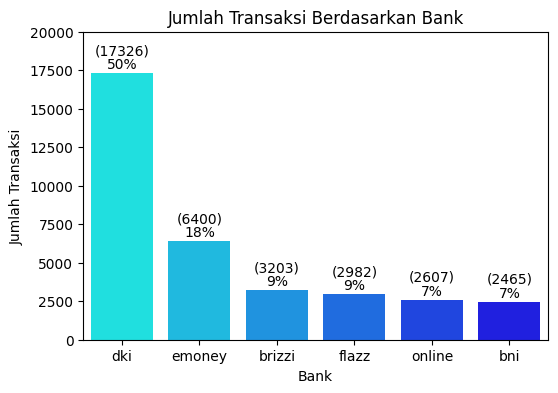

In [ ]:
# Membuat barplot Bank terhadap jumlah Transaksi
plt.figure(figsize=(6,4))
sns.barplot(x=dfBankTrans['payCardBank'], y=dfBankTrans['transID'], palette='blend:cyan,blue')
plt.xlabel('Bank')
plt.ylabel('Jumlah Transaksi')
plt.title('Jumlah Transaksi Berdasarkan Bank')
plt.yticks([x for x in range(0,20001,2500)])

# Menambahkan label percentage dari jumlah Transaksi
for i, v in enumerate(dfBankTrans['transID']):
    plt.text(i, v + 100, f"{dfBankTrans['percentage'].iloc[i]:.0f}%", ha='center', va='bottom')

# Menambahkan label jumlah Transaksi
for i, v in enumerate(dfBankTrans['transID']):
    plt.text(i, v + 1000, f"({v})", ha='center', va='bottom')

plt.show()

In [ ]:
dfBankTrans[dfBankTrans['transID'] > dfBankTrans['transID'].quantile(0.75)]

payCardBank  transID  percentage
0         dki    17326   49.526913
1      emoney     6400   18.294600

In [ ]:
IQR = (dfBankTrans['transID'].quantile(0.75) - dfBankTrans['transID'].quantile(0.25)) * 1.5
lower_bound = dfBankTrans['transID'].quantile(0.25) - IQR
upper_bound = dfBankTrans['transID'].quantile(0.75) + IQR
dfBankTrans[(dfBankTrans['transID'] > upper_bound)]

payCardBank  transID  percentage
0         dki    17326   49.526913

- Mayoritas transaksi Transjakarta dilakukan melalui bank DKI dan Emoney (bank mandiri)
- Jumlah transaksi melalui bank DKI (49.52% -> hampir 50%), jauh lebih tinggi dibanding bank lain

In [ ]:
# Agregasi jumlah revenue transaksi berdasarkan payCardBank
dfBankPay = tj.groupby('payCardBank')['payAmount'].sum().sort_values(ascending=False).reset_index()
dfBankPay['percentage'] = dfBankPay['payAmount']/dfBankPay['payAmount'].sum() * 100

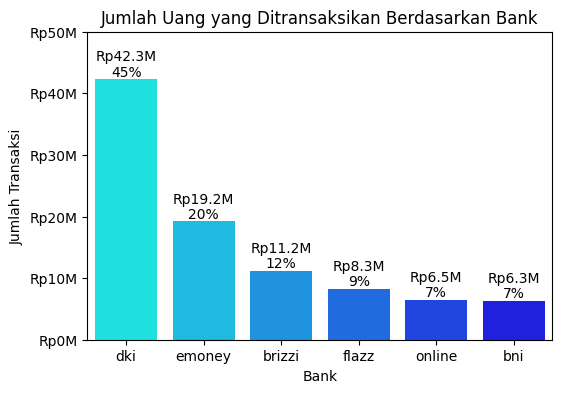

In [ ]:
# Membuat barplot Bank terhadap jumlah Transaksi

import matplotlib.ticker as mtick

plt.figure(figsize=(6,4))
ax = sns.barplot(x=dfBankPay['payCardBank'], y=dfBankPay['payAmount'], palette='blend:cyan,blue')
plt.xlabel('Bank')
plt.ylabel('Jumlah Transaksi')
plt.title('Jumlah Uang yang Ditransaksikan Berdasarkan Bank')
plt.ylim(0,50000000)

# Format axis y menjadi mata uang
formatter = mtick.FuncFormatter(lambda x, p: f'Rp{x/1000000:,.0f}M')
ax.yaxis.set_major_formatter(formatter)

# Menambahkan label percentage dari jumlah Transaksi
for i, v in enumerate(dfBankPay['payAmount']):
    plt.text(i, v + 100, f"{dfBankPay['percentage'].iloc[i]:.0f}%", ha='center', va='bottom')

# Menambahkan label jumlah Transaksi
for i, v in enumerate(dfBankPay['payAmount']):
    plt.text(i, v + 2500000 , f"Rp{v/1000000:,.1f}M", ha='center', va='bottom')

plt.show()

<a name='databank'></a>

In [ ]:
dfBankPay[dfBankPay['payAmount'] > dfBankPay['payAmount'].quantile(0.75)]

payCardBank   payAmount  percentage
0         dki  42303000.0   45.096262
1      emoney  19211500.0   20.480033

In [ ]:
IQR = (dfBankPay['payAmount'].quantile(0.75) - dfBankPay['payAmount'].quantile(0.25)) * 1.5
lower_bound = dfBankPay['payAmount'].quantile(0.25) - IQR
upper_bound = dfBankPay['payAmount'].quantile(0.75) + IQR
dfBankPay[(dfBankPay['payAmount'] > upper_bound)]

payCardBank   payAmount  percentage
0         dki  42303000.0   45.096262

- Mayoritas pemasukan dari transaksi Transjakarta diperoleh melalui pembayaran dari bank DKI dan Emoney (bank mandiri)
- Jumlah uang yang ditransaksikan melalui bank DKI memiliki porsi 45%, angka ini jauh lebih tinggi dibanding bank lain

#### Solusi 4.1.3
1. **Bank DKI dan Emoney (Bank Mandiri)** merupakan 2 bank yang paling banyak digunakan oleh penumpang.
2. Transjakarta disarankan untuk **meningkatkan kerjasama bisnis** dengan kedua bank tersebut, **terutama dengan Bank DKI** agar Transjakarta dapat memperoleh pemasukan tambahan

##4.2 Strategi Pengelolaan Sistem Transjakarta Pada Waktu-Waktu Padat Penumpang

### Problem: Penumpang Harus Berdesak-desakan karena Sarana Transportasi Tidak Dapat Menampung Jumlah Penumpang yang Membludak

Dengan **jumlah dan jadwal Transjakarta** yang saat ini beroperasi, sering ditemui kondisi **penumpang yang berdesak-desakan**. Hal ini terjadi karena **Sarana Transportasi** Transjakarta **tidak dapat menampung** jumlah penumpang yang tiba-tiba **membludak pada waktu-waktu tertentu**.

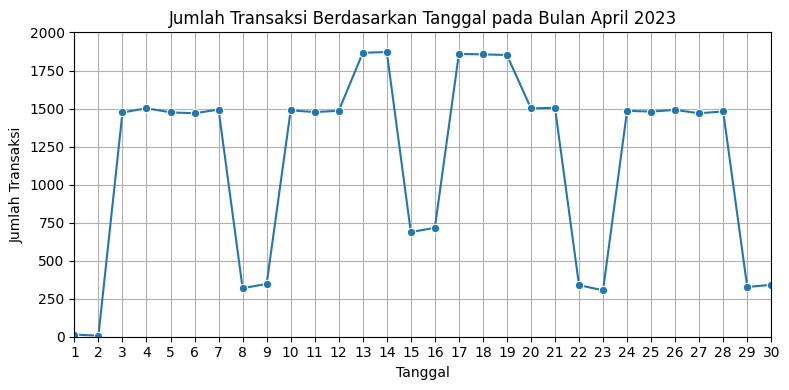

In [ ]:
transPerDate = (tj.groupby(by=['tapInDate','tapInDay'])['transID'].count()
                    .reset_index()
                    .rename(columns={'tapInDate':'date','tapInDay':'day','transID':'transaction'})
                    )
plt.figure(figsize=(8,4))
sns.lineplot(data=transPerDate, x='date', y='transaction',marker='o')
plt.title('Jumlah Transaksi Berdasarkan Tanggal pada Bulan April 2023')
plt.ylabel('Jumlah Transaksi')
plt.xlabel('Tanggal')
plt.xlim(1,30)
plt.ylim(0,2001)
plt.xticks(transPerDate['date'])
plt.grid()
plt.tight_layout()

plt.show()

Pada Bulan **April 2023**, jumlah penumpang perhari dari Moda Transportasi Transjakarta memiliki **pola 5 hari jumlah penumpangnya tinggi dan 2 hari jumlah penumpangnya rendah**. **5 Hari** dengan penumpang tinggi merupakan pada **hari kerja (Weekday) yaitu Senin sampai Jumat**, sedangkan **2 Hari** dengan penumpang yang rendah merupakan **akhir pekan (Weekend) yaitu hari Sabtu dan Minggu**

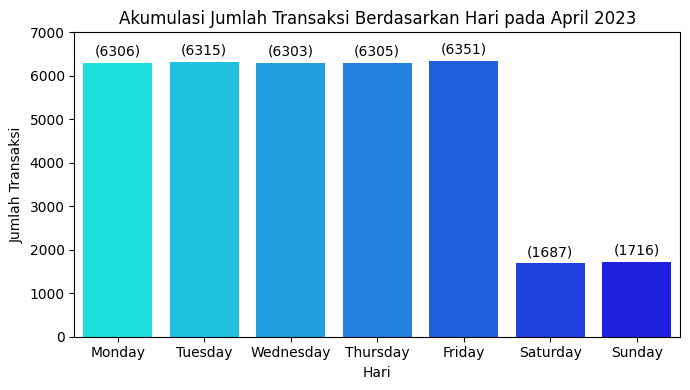

In [ ]:
transPerDay = (tj.groupby(by=['tapInDay'])['transID'].count()
                    .reindex('Monday Tuesday Wednesday Thursday Friday Saturday Sunday'.split(' '))
                    .reset_index().rename(columns={'tapInDay':'day','transID':'transaction'})
                    )

plt.figure(figsize=(7,4))
sns.barplot(data=transPerDay, x='day', y='transaction', palette='blend:cyan,blue')
plt.ylabel('Jumlah Transaksi')
plt.xlabel('Hari')
plt.title('Akumulasi Jumlah Transaksi Berdasarkan Hari pada April 2023')
plt.ylim(0,7000)
plt.tight_layout()

# Menambahkan label jumlah Transaksi
for i, v in enumerate(transPerDay['transaction']):
    plt.text(i, v + 100, f"({v})", ha='center', va='bottom')

plt.show()

Jumlah Transaksi saat **hari kerja (weekday) jauh lebih tinggi** dibandingkan transaksi saat weekend. Masyarakat menggunakan Transjakarta sebagai **sarana transportasi untuk mobilisasi dalam menunjang aktivitas pekerjaannya**

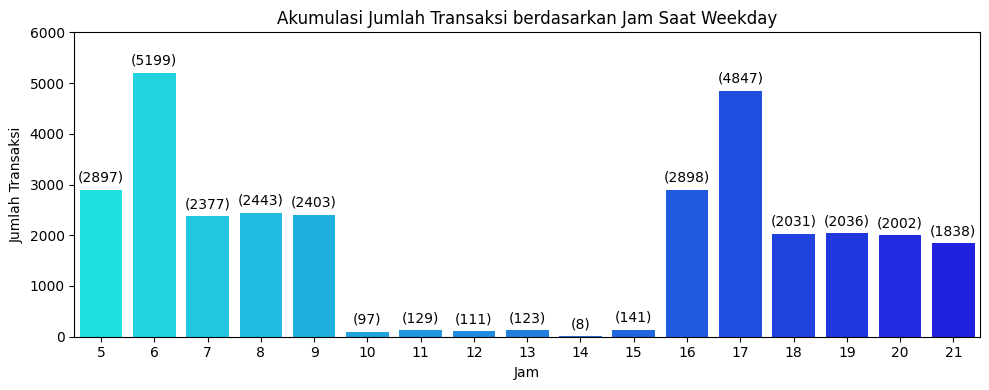

In [ ]:
transPerHourWeekday = (tj[tj['tapInDay'].isin('Monday Tuesday Wednesday Thursday Friday'.split(' '))]
                                              .groupby(by=['tapInHour'])['transID'].count()
                                              .reset_index()
                                              .rename(columns={'tapInHour':'hour','transID':'transaction'})
                                              )
plt.figure(figsize=(10,4))
sns.barplot(data=transPerHourWeekday, x='hour', y='transaction', palette='blend:cyan,blue')
plt.title('Akumulasi Jumlah Transaksi berdasarkan Jam Saat Weekday')
plt.ylabel('Jumlah Transaksi')
plt.xlabel('Jam')
plt.ylim(0,6000)
plt.tight_layout()

# Menambahkan label jumlah Transaksi
for i, v in enumerate(transPerHourWeekday['transaction']):
    plt.text(i, v + 100, f"({v})", ha='center', va='bottom')


plt.show()

Berdasarkan Jam pada saat hari kerja (Senin - Jumat), jumlah transaksi Transjakarta memiliki pola: \\
1. Pada pukul **05.00 - 09.59 jumlah transaksi nya tinggi** dengan **peak pada pukul 06.00 - 06.59**.
2. Pada pukul **10.00 - 15.59, jumlah transaksi nya rendah**.
3. Pada pukul **16.00 - 21.59, jumlah transaksi nya tinggi** dengan **peak pada pukul 17.00 - 17.59**.

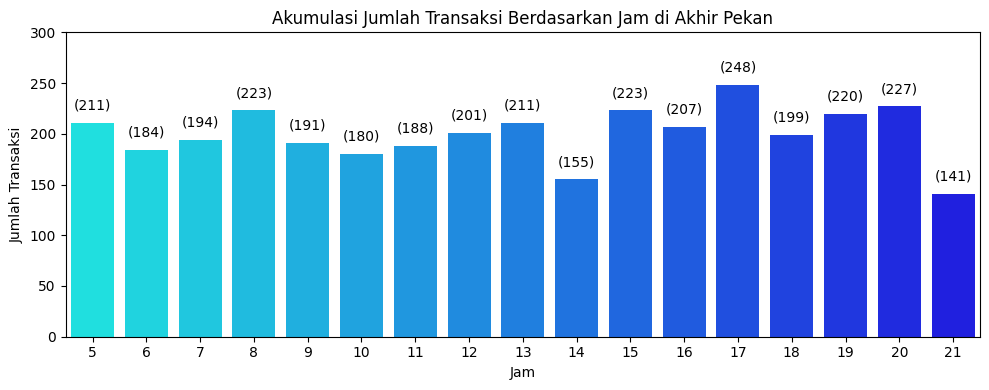

In [ ]:
transPerHourWeekend = (tj[tj['tapInDay'].isin('Saturday Sunday'.split(' '))]
                                              .groupby(by=['tapInHour'])['transID'].count()
                                              .reset_index()
                                              .rename(columns={'tapInHour':'hour','transID':'transaction'})
                                              )

plt.figure(figsize=(10,4))
sns.barplot(data=transPerHourWeekend, x='hour', y='transaction', palette='blend:cyan,blue')
plt.title('Akumulasi Jumlah Transaksi Berdasarkan Jam di Akhir Pekan')
plt.ylabel('Jumlah Transaksi')
plt.xlabel('Jam')
plt.ylim(0,300)
plt.tight_layout()

# Menambahkan label jumlah Transaksi
for i, v in enumerate(transPerHourWeekend['transaction']):
    plt.text(i, v + 10, f"({v})", ha='center', va='bottom')

plt.show()

Pada **akhir pekan (Sabtu dan Minggu), jumlah transaksi Transjakarta lebih rendah** dibandingkan dengan transaksi pada saat hari kerja (Senin - Jumat)

###4.2.1 Analisis Strategi Pengelolaan Transjakarta pada Jam Sibuk Kerja Pagi Hari (05.00 - 09.59)

####4.2.1.1 Analisis Pemindahan Alokasi Kendaraan dari Koridor dengan Jumlah Transaksi Rendah ke Koridor dengan Jumlah Transaksi Tinggi pada Jam Sibuk Kerja Pagi

In [ ]:
# Membuat dataframe yang memfilter Transaksi yang terjadi pada Jam 05.00 - 09.59 di Weekday
df0509 = (tj[tj['tapInHour'].isin([5,6,7,8,9])]
                [tj['tapInDay'].isin('Monday Tuesday Wednesday Thursday Friday'.split(' '))]
          )

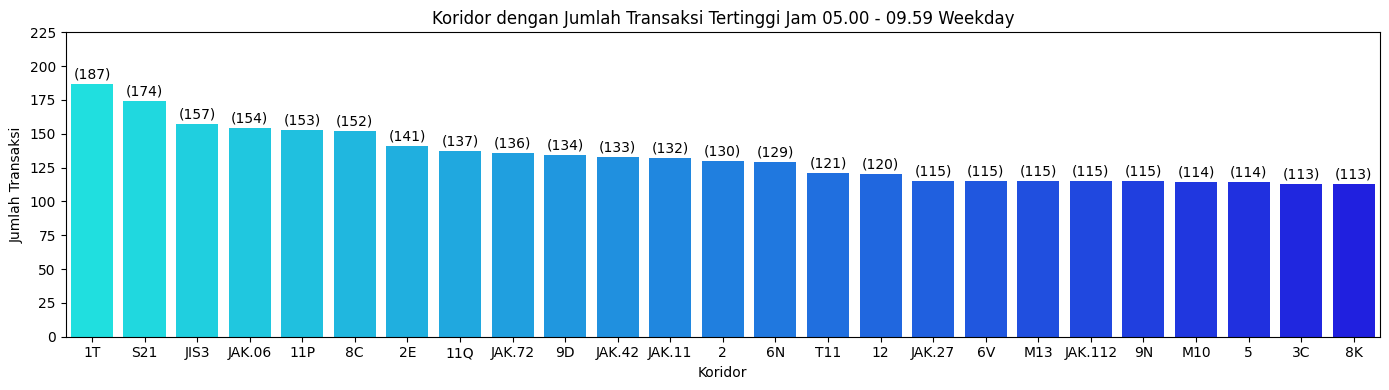

In [ ]:
# Menentukan Koridor dengan Jumlah Transaksi Terbanyak pada weekday 05.00 - 09.59
dfTop0509 = (df0509.groupby(['corridorID','corridorName'])['transID'].count()
                     .sort_values(ascending=False)
                     .reset_index()).head(25)

# Membuat Barplot dari Koridor dengan Jumlah Transaksi Terbanyak
plt.figure(figsize=(14,4))
sns.barplot(x=dfTop0509['corridorID'], y=dfTop0509['transID'], palette='blend:cyan,blue')
plt.xlabel('Koridor')
plt.ylabel('Jumlah Transaksi')
plt.ylim(0,225)
plt.title('Koridor dengan Jumlah Transaksi Tertinggi Jam 05.00 - 09.59 Weekday')
plt.tight_layout()

# Menambahkan label jumlah Transaksi
for i, v in enumerate(dfTop0509['transID']):
    plt.text(i, v + 2, f"({v})", ha='center', va='bottom')

plt.show()

In [ ]:
dfTop0509[(dfTop0509['transID'] > dfTop0509['transID'].quantile(0.75))]

corridorID                                 corridorName  transID
0         1T                         Cibubur - Balai Kota      187
1        S21                                Ciputat - CSW      174
2       JIS3      Harmoni - Jakarta International Stadium      157
3     JAK.06               Kampung Rambutan - Pondok Gede      154
4        11P  Rusun Pondok Bambu - Walikota Jakarta Timur      153
5         8C                 Kebayoran Lama - Tanah Abang      152

In [ ]:
# Mengecek koridor dengan jumlah transaksi tinggi yang nilai nya ekstrem
IQR = (dfTop0509['transID'].quantile(0.75) - dfTop0509['transID'].quantile(0.25)) * 1.5
lower_bound = dfTop0509['transID'].quantile(0.25) - IQR
upper_bound = dfTop0509['transID'].quantile(0.75) + IQR
dfTop0509[(dfTop0509['transID'] > upper_bound)]

corridorID          corridorName  transID
0         1T  Cibubur - Balai Kota      187

- Koridor dengan jumlah **transaksi tertinggi** yaitu **Koridor 1T, S21, JIS3, JAK06, 11P dan 8C**
- **Koridor 1T** memiliki jumlah transaksi dengan **nilai yang jauh lebih tinggi** dibanding dengan koridor lainnya

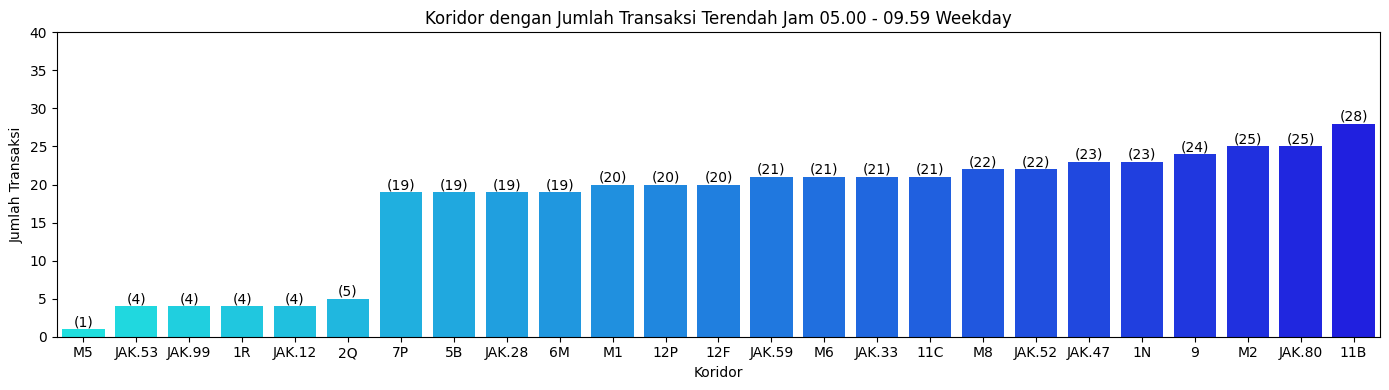

In [ ]:
# Menentukan Koridor dengan Jumlah Transaksi Terendah pada Weekday 05.00 - 09.59
dfBottom0509 = (df0509.groupby(['corridorID','corridorName'])['transID'].count()
                        .sort_values(ascending=True)
                        .reset_index()).head(25)

# Membuat Barplot dari 20 Koridor dengan Jumlah Transaksi Terendah
plt.figure(figsize=(14,4))
sns.barplot(x=dfBottom0509['corridorID'], y=dfBottom0509['transID'], palette='blend:cyan,blue')
plt.xlabel('Koridor')
plt.ylabel('Jumlah Transaksi')
plt.ylim(0,40)
plt.title('Koridor dengan Jumlah Transaksi Terendah Jam 05.00 - 09.59 Weekday')
plt.tight_layout()

# Menambahkan label jumlah Transaksi
for i, v in enumerate(dfBottom0509['transID']):
    plt.text(i, v , f"({v})", ha='center', va='bottom')

plt.show()

In [ ]:
dfBottom0509[(dfBottom0509['transID'] < dfBottom0509['transID'].quantile(0.25))]

corridorID                                    corridorName  transID
0         M5                           Matraman Baru - Ancol        1
1     JAK.53                Grogol - Pos Pengumben via Slipi        4
2     JAK.99                     Term. Pulo Gadung - Lampiri        4
3         1R                             Senen - Tanah Abang        4
4     JAK.12  Tanah Abang - Kebayoran Lama via Pos Pengumben        4
5         2Q                         Gondangdia - Balai Kota        5

In [ ]:
IQR = (dfBottom0509['transID'].quantile(0.75) - dfBottom0509['transID'].quantile(0.25)) * 1.5
lower_bound = dfBottom0509['transID'].quantile(0.25) - IQR
upper_bound = dfBottom0509['transID'].quantile(0.75) + IQR
dfBottom0509[(dfBottom0509['transID'] < lower_bound)]

corridorID                                    corridorName  transID
0         M5                           Matraman Baru - Ancol        1
1     JAK.53                Grogol - Pos Pengumben via Slipi        4
2     JAK.99                     Term. Pulo Gadung - Lampiri        4
3         1R                             Senen - Tanah Abang        4
4     JAK.12  Tanah Abang - Kebayoran Lama via Pos Pengumben        4
5         2Q                         Gondangdia - Balai Kota        5

- Koridor dengan jumlah **transaksi terendah** yaitu **Koridor M5, JAK53, 1R, JAK99, JAK12 dan 2Q**
- **Koridor M5, JAK53, 1R, JAK99, JAK12 dan 2Q** memiliki **nilai nya yang jauh lebih rendah** dibanding dengan koridor lainnya

#####Solusi 4.2.1.1

 1. Koridor dengan **Jumlah Transaksi yang rendah** pada Jam Sibuk Kerja Pagi adalah **Koridor M5, JAK53, 1R, JAK99, JAK12, 2Q dan 8C**
 2. Koridor dengan **Jumlah Transaksi yang tinggi** pada Jam Sibuk Kerja Pagi adalah **Koridor 1T, S21, JIS3, JAK06 dan 11P**
 3. Pada Jam Sibuk Kerja Pagi, kendaraan pada **Koridor M5, JAK53, 1R, JAK99, JAK12 dan 2Q** dapat **dialokasikan** ke **Koridor 1T, S21, JIS3, JAK06, 11P dan 8C**
 4. **Koridor 1T** adalah koridor dengan prioritas utama untuk dialokasikan kendaraan lebih banyak kedalamnya

####4.2.1.2 Analisis Alokasi Kendaraan pada Koridor dengan Jumlah Transaksi Tinggi pada Jam Sibuk Kerja Pagi berdasarkan Direction

In [ ]:
# Membuat dataframe yang meng-agregasi jumlah transaksi berdasarkan Direction
df0509Direction = (df0509[df0509['corridorID'].isin(dfTop0509['corridorID'])]
                      .groupby(['corridorID','corridorName','direction'])['transID'].count()
                      .reset_index())

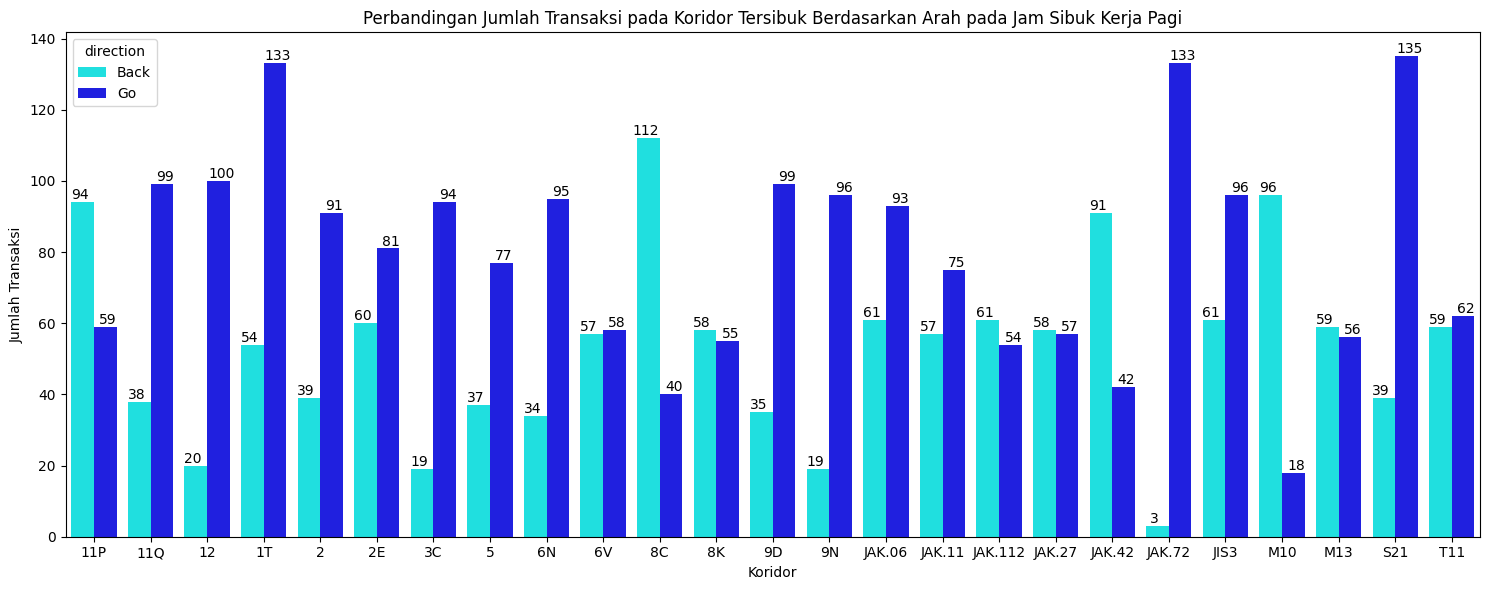

In [ ]:
plt.figure(figsize=(15, 6))
sns.barplot(x='corridorID', y='transID', hue='direction', data=df0509Direction, palette='blend:cyan,blue')
plt.xlabel('Koridor')
plt.ylabel('Jumlah Transaksi')
plt.title('Perbandingan Jumlah Transaksi pada Koridor Tersibuk Berdasarkan Arah pada Jam Sibuk Kerja Pagi')
plt.tight_layout()

# Menambahkan label jumlah Transaksi
for i, v in enumerate(df0509Direction['transID']):
    plt.text(i/2 - 0.25, v , f"{v}", ha='center', va='bottom')

plt.show()

- Pada Koridor dengan jumlah transaksi tertinggi di jam sibuk pagi, **jumlah transaksi pada koridor berdasarkan directionnya tidak sama**. Oleh sebab itu **alokasi jumlah kendaraan** pada suatu koridor antara **direction go dan back harus dibedakan** \\
- Dengan adanya **perbedaan jumlah transaksi pada direction go dan direction back pada 1 koridor yang sama**, maka **jumlah kendaraan harus dialokasikan lebih banyak pada direction yang jumlah transaksinya lebih banyak** dibandingkan **direction yang jumlah transaksi yang sedikit**

In [ ]:
# Menentukan Koridor yang Jumlah Transaksi Arah Go lebih besar dari Arah Back
df0509DirectionCopy = (df0509[df0509['corridorID'].isin(dfTop0509['corridorID'])]
                      .groupby(['corridorID','corridorName','direction'])['transID'].count()
                      .unstack())
df0509DirectionGo = (df0509DirectionCopy[df0509DirectionCopy['Go'] > df0509DirectionCopy['Back']]
                      .sort_values(by='Go',ascending=False))
df0509DirectionGo['go/back'] = df0509DirectionGo['Go']/df0509DirectionGo['Back']
df0509DirectionGo

direction                                            Back   Go    go/back
corridorID corridorName                                                  
S21        Ciputat - CSW                               39  135   3.461538
1T         Cibubur - Balai Kota                        54  133   2.462963
JAK.72     Kampung Rambutan - Pasar Rebo via Poncol     3  133  44.333333
12         Tanjung Priok - Pluit                       20  100   5.000000
11Q        Kampung Melayu - Pulo Gebang via BKT        38   99   2.605263
9D         Pasar Minggu - Tanah Abang                  35   99   2.828571
9N         Pinang Ranti - Pramuka                      19   96   5.052632
JIS3       Harmoni - Jakarta International Stadium     61   96   1.573770
6N         Ragunan - Blok M via Kemang                 34   95   2.794118
3C         Rusun Kapuk Muara - Penjaringan             19   94   4.947368
JAK.06     Kampung Rambutan - Pondok Gede              61   93   1.524590
2          Pulo Gadung - Monas                         39   91   2.333333
2E         Rusun Rawa Bebek - Kodamar                  60   81   1.350000
5          Matraman Baru - Ancol                       37   77   2.081081
JAK.11     Tanah Abang - Kebayoran Lama                57   75   1.315789
T11        Poris Plawad - Bundaran Senayan             59   62   1.050847
6V         Ragunan - Gelora Bung Karno                 57   58   1.017544

In [ ]:
# Memfilter Koridor dengan Rasio Go/Back tertinggi berdasarkan Q3
df0509DirectionGo = (df0509DirectionGo[df0509DirectionGo['go/back'] >= df0509DirectionGo['go/back'].quantile(0.75)]
                      .sort_values(by=['Go','go/back'],ascending=[False,False]))
df0509DirectionGo

direction                                            Back   Go    go/back
corridorID corridorName                                                  
S21        Ciputat - CSW                               39  135   3.461538
JAK.72     Kampung Rambutan - Pasar Rebo via Poncol     3  133  44.333333
12         Tanjung Priok - Pluit                       20  100   5.000000
9N         Pinang Ranti - Pramuka                      19   96   5.052632
3C         Rusun Kapuk Muara - Penjaringan             19   94   4.947368

In [ ]:
IQR = df0509DirectionGo['go/back'].quantile(0.75) - df0509DirectionGo['go/back'].quantile(0.25)
lower_bound = df0509DirectionGo['go/back'].quantile(0.25) - IQR
upper_bound = df0509DirectionGo['go/back'].quantile(0.75) + IQR
df0509DirectionGo[(df0509DirectionGo['go/back'] > upper_bound)]

direction                                            Back   Go    go/back
corridorID corridorName                                                  
JAK.72     Kampung Rambutan - Pasar Rebo via Poncol     3  133  44.333333

Pada Jam Sibuk Kerja Pagi:
- Koridor dengan **rasio direction go terhadap back yang tinggi** adalah **Koridor S21, JAK72, 12, 9N dan 3C**
- **Rasio direction go terhadap back** pada **Koridor JAK72 jauh lebih tinggi** dibandingkan koridor lain

In [ ]:
# Menentukan Koridor yang Jumlah Transaksi Arah Back yang lebih besar dari Arah Go
df0509DirectionBack = (df0509DirectionCopy[df0509DirectionCopy['Go'] < df0509DirectionCopy['Back']]
                        .sort_values(by='Back',ascending=False))
df0509DirectionBack['back/go'] = df0509DirectionBack['Back']/df0509DirectionBack['Go']
df0509DirectionBack

direction                                               Back  Go   back/go
corridorID corridorName                                                   
8C         Kebayoran Lama - Tanah Abang                  112  40  2.800000
M10        PGC 2 - Tanjung Priok                          96  18  5.333333
11P        Rusun Pondok Bambu - Walikota Jakarta Timur    94  59  1.593220
JAK.42     Kampung Melayu - Pondok Kelapa                 91  42  2.166667
JAK.112    Terminal Tanah Merah - Pulo Gadung             61  54  1.129630
M13        Puri Beta 2 - Tendean                          59  56  1.053571
8K         Batusari - Grogol                              58  55  1.054545
JAK.27     Pulo Gebang - Rorotan                          58  57  1.017544

In [ ]:
df0509DirectionBack[df0509DirectionBack['back/go'] >= df0509DirectionBack['back/go'].quantile(0.75)]

direction                                Back  Go   back/go
corridorID corridorName                                    
8C         Kebayoran Lama - Tanah Abang   112  40  2.800000
M10        PGC 2 - Tanjung Priok           96  18  5.333333

In [ ]:
IQR = df0509DirectionBack['back/go'].quantile(0.75) - df0509DirectionBack['back/go'].quantile(0.25)
lower_bound = df0509DirectionBack['back/go'].quantile(0.25) - IQR
upper_bound = df0509DirectionBack['back/go'].quantile(0.75) + IQR
df0509DirectionBack[(df0509DirectionBack['back/go'] > upper_bound)]

direction                         Back  Go   back/go
corridorID corridorName                             
M10        PGC 2 - Tanjung Priok    96  18  5.333333

Pada Jam Sibuk Kerja Pagi:
- Koridor dengan **rasio direction back terhadap go yang tinggi** adalah **Koridor 8C dan M10**
- **Rasio direction back terhadap go** pada **Koridor M10 jauh lebih tinggi** dibandingkan koridor lain

#####Solusi 4.2.1.2

Pada Koridor dengan jumlah transaksi terbanyak pada jam sibuk pagi hari, dapat dilakukan optimalisasi berdasarkan direction nya:
1. **Jumlah kendaraan direction go** pada koridor **S21, JAK72, 12, 9N dan 3C** harus **dialokasikan lebih banyak** daripada direction back-nya. **Koridor JAK72** harus mendapat prioritas utama.  
2. **Jumlah kendaraan direction back** pada koridor **8C dan M10** harus **dialokasikan lebih banyak** daripada direction go-nya. **Koridor M10** harus mendapat prioritas utama.

####4.2.1.3 Analis Rekayasa Jalur Pada Corridor Terpadat pada Jam Sibuk Kerja Pagi Hari

- Kendaraan Transjakarta **bergerak sesuai dengan koridornya** dari **titik halte awal sampai ke halte akhir**.
- Pada praktiknya terdapat **lintasan halte** dengan **jumlah penumpang yang bernilai 0**, tentunya akan menjadi hal yang **tidak efisien** jika **kendaraan tetap berjalan dari halte awal sampai halte akhir**.
- Perlu dilakukan **rekayasa jalur** agar kendaraan Transjakarta **berjalan pada lintasan halte-halte tertentu yang terdapat penumpang didalamnya**

#####4.2.1.3.1 Rekayasa Jalur pada Direction Back

In [ ]:
# Menentukan stopStartSeq minimum pada tiap koridor dengan direction back
df0509StartSeqBack = (df0509[df0509['direction']=='Back']
                          [df0509['corridorID'].isin(dfTop0509['corridorID'])]
                          [['corridorID','corridorName','tapInStopsName','stopStartSeq']]
                          .sort_values(by=['corridorID','corridorName','stopStartSeq'])
                          .groupby(['corridorID','corridorName']).head(1)
                          .reset_index(drop=True)
                          )
df0509StartSeqBack.head()

corridorID                                 corridorName  \
0        11P  Rusun Pondok Bambu - Walikota Jakarta Timur   
1        11Q         Kampung Melayu - Pulo Gebang via BKT   
2         12                        Tanjung Priok - Pluit   
3         1T                         Cibubur - Balai Kota   
4          2                          Pulo Gadung - Monas   

              tapInStopsName  stopStartSeq  
0   Walikota Jakarta Timur 2             3  
1  Ps. Inpres Cipinang Besar             5  
2   Gunung Sahari Mangga Dua             8  
3               Balai Kota 1             0  
4                      Monas             0

In [ ]:
# Menentukan stopEndSeq maksimum pada tiap koridor dengan direction back
df0509EndSeqBack = (df0509[df0509['direction']=='Back']
                          [df0509['corridorID'].isin(dfTop0509['corridorID'])]
                          [['corridorID','tapOutStopsName','stopEndSeq']]
                          .sort_values(by=['corridorID','stopEndSeq'], ascending=[False,False])
                          .groupby(['corridorID']).head(1)
                          .reset_index(drop=True)
                          )
df0509EndSeqBack.head()

corridorID     tapOutStopsName  stopEndSeq
0        T11  Term. Poris Plawad          24
1        S21      Situ Gintung 2          20
2        M13          Adam Malik          10
3        M10               PGC 2          21
4       JIS3                 JIS          14

In [ ]:
# Menggabungkan dataframe koridor dengan stopStartSeq minimum dengan stopEndSeq maksimum
df0509RekayasaBack = df0509StartSeqBack.merge(df0509EndSeqBack, how = 'left', on = 'corridorID')

# Menambahkan kolom newRouteCorridor, yaitu rute baru dari suatu koridor yang mengacu pada halte di stopStartSeq minimum dengan stopEndSeq maksimum
# nantinya kendaraan pada direction back hanya akan berjalan dari halte dengan stopStartSeq minimum sampai halte stopEndSeq maksimum
df0509RekayasaBack['newRouteCorridor'] = df0509RekayasaBack['tapInStopsName'] + ' - ' + df0509RekayasaBack['tapOutStopsName']

# Menambahkan kolom newSeqRoute, yaitu rute baru yang mengacu pada stopStartSeq minimum dengan stopEndSeq maksimum
df0509RekayasaBack['newSeqRoute'] = df0509RekayasaBack['stopStartSeq'].astype(str) + ' - ' + df0509RekayasaBack['stopEndSeq'].astype(str)

# Menambahkan kolom countseq, yaitu banyak nya halte yang harus dilalui pada rute tersebut (halte stopEndSeq dikurangi halte stopStartEnd)
df0509RekayasaBack['countSeq'] = df0509RekayasaBack['stopEndSeq'] - df0509RekayasaBack['stopStartSeq']
df0509RekayasaBack = df0509RekayasaBack.sort_values(by='countSeq', ascending=True)
df0509RekayasaBack[['corridorID','corridorName','newSeqRoute','countSeq','newRouteCorridor']]

corridorID                                 corridorName newSeqRoute  \
6          3C              Rusun Kapuk Muara - Penjaringan       0 - 1   
13         9N                       Pinang Ranti - Pramuka       1 - 2   
7           5                        Matraman Baru - Ancol      5 - 12   
22        M13                        Puri Beta 2 - Tendean      2 - 10   
20       JIS3      Harmoni - Jakarta International Stadium      6 - 14   
8          6N                  Ragunan - Blok M via Kemang     12 - 21   
2          12                        Tanjung Priok - Pluit      8 - 18   
3          1T                         Cibubur - Balai Kota      0 - 11   
4           2                          Pulo Gadung - Monas      0 - 15   
9          6V                  Ragunan - Gelora Bung Karno      0 - 15   
15     JAK.11                 Tanah Abang - Kebayoran Lama     11 - 26   
24        T11              Poris Plawad - Bundaran Senayan      6 - 24   
21        M10                        PGC 2 - Tanjung Priok      2 - 21   
19     JAK.72     Kampung Rambutan - Pasar Rebo via Poncol      8 - 27   
17     JAK.27                        Pulo Gebang - Rorotan     23 - 42   
0         11P  Rusun Pondok Bambu - Walikota Jakarta Timur      3 - 22   
16    JAK.112           Terminal Tanah Merah - Pulo Gadung      9 - 29   
23        S21                                Ciputat - CSW      0 - 20   
1         11Q         Kampung Melayu - Pulo Gebang via BKT      5 - 26   
11         8K                            Batusari - Grogol      4 - 26   
10         8C                 Kebayoran Lama - Tanah Abang      0 - 22   
5          2E                   Rusun Rawa Bebek - Kodamar      2 - 26   
18     JAK.42               Kampung Melayu - Pondok Kelapa     14 - 46   
12         9D                   Pasar Minggu - Tanah Abang      1 - 47   
14     JAK.06               Kampung Rambutan - Pondok Gede      3 - 50   

    countSeq                                   newRouteCorridor  
6          1                    Penjaringan - Rusun Kapuk Muara  
13         1                   Garuda Taman Mini - Pinang Ranti  
7          7                               Budi Utomo - Tegalan  
22         8                             Tirtayasa - Adam Malik  
20         8                                   Pecenongan - JIS  
8          9       Sbr. Plaza Kemang 88 - Kementerian Pertanian  
2         10  Gunung Sahari Mangga Dua - Permai Koja Arah Utara  
3         11                     Balai Kota 1 - Flyover Karet 2  
4         15                              Monas - Pulo Gadung 1  
9         15           Gelora Bung Karno - Departemen Pertanian  
15        15  RS Medika Permata Hijau 3 - Sbr. The Jakarta Post  
24        18    RS Harapan Kita Arah Utara - Term. Poris Plawad  
21        19                   Permai Koja Arah Selatan - PGC 2  
19        19     Gg. Koperasi Ciracas - Jln. Bungur II Rambutan  
17        19     Pintu Air Gempol 1 - Gg. Sabar 2 Lingkar Timur  
0         19      Walikota Jakarta Timur 2 - Rusun Pondok Bambu  
16        20               Sbr. RS Mediros - Grii Kelapa Gading  
23        20                   Kejaksaan Agung - Situ Gintung 2  
1         21  Ps. Inpres Cipinang Besar - Walikota Jakarta T...  
11        22             Taman Anggrek - Yayasan Alkahfi Jakbar  
10        22               Jak Lingko Tanah Abang - Hotel Mulia  
5         24  Mushola Al Jihad Perintis Kemerdekaan - Rusun ...  
18        32           Komplek Abadi 2 - Term. Kampung Melayu 2  
12        46                  Term. Pasar Minggu 2 - JPO Blok G  
14        47                     Tanah Merdeka 1 - Pondok Molek

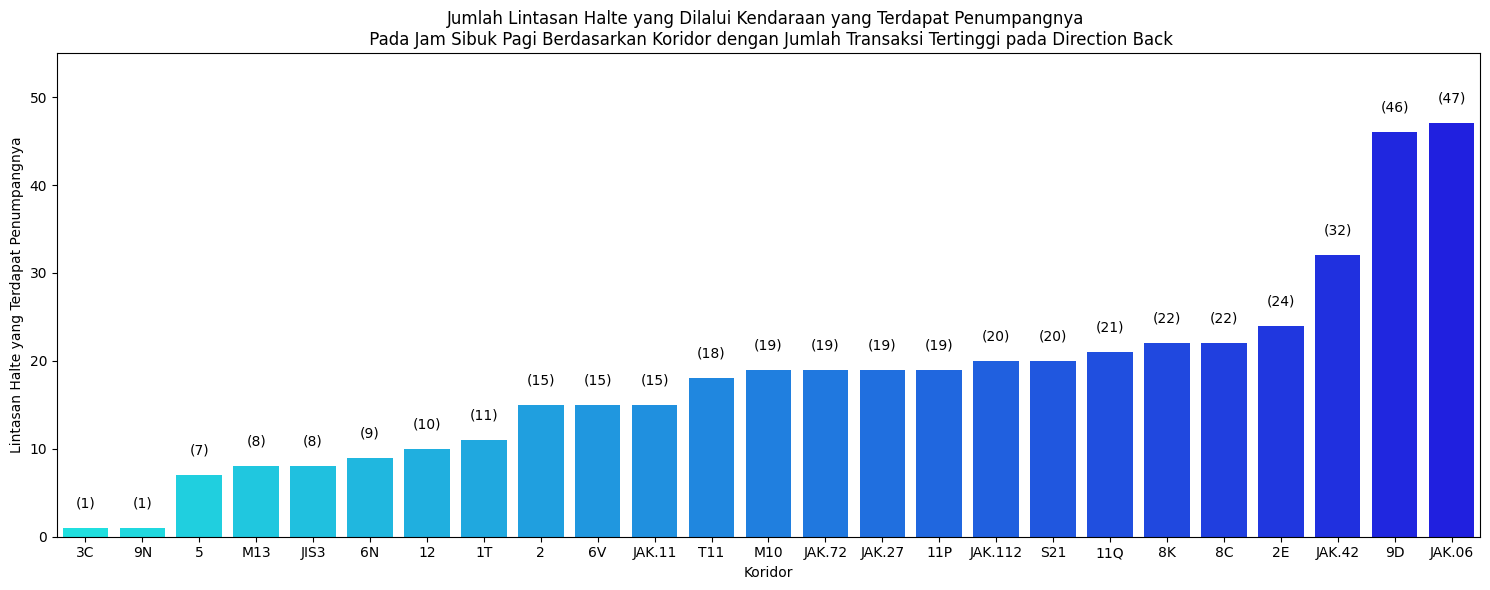

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(data=df0509RekayasaBack, x='corridorID', y='countSeq', palette='blend:cyan,blue')
plt.title('Jumlah Lintasan Halte yang Dilalui Kendaraan yang Terdapat Penumpangnya \n Pada Jam Sibuk Pagi Berdasarkan Koridor dengan Jumlah Transaksi Tertinggi pada Direction Back')
plt.xlabel('Koridor')
plt.ylabel('Lintasan Halte yang Terdapat Penumpangnya')
plt.ylim(0,55)
plt.tight_layout()

# Menambahkan label Jumlah Halte (countSeq) yang dilalui kendaraan yang terdapat penumpang didalamnya
for i, v in enumerate(df0509RekayasaBack['countSeq']):
    plt.text(i, v + 2, f"({v})", ha='center', va='bottom')

plt.show()

<a name='pagiback'></a>

In [ ]:
# FIlter data untuk countSeq terkecil berdasarkan Q1
(df0509RekayasaBack[df0509RekayasaBack['countSeq']<=df0509RekayasaBack['countSeq'].quantile(0.25)]
                    [['corridorID','corridorName','newSeqRoute','countSeq','newRouteCorridor']])

corridorID                             corridorName newSeqRoute  countSeq  \
6          3C          Rusun Kapuk Muara - Penjaringan       0 - 1         1   
13         9N                   Pinang Ranti - Pramuka       1 - 2         1   
7           5                    Matraman Baru - Ancol      5 - 12         7   
22        M13                    Puri Beta 2 - Tendean      2 - 10         8   
20       JIS3  Harmoni - Jakarta International Stadium      6 - 14         8   
8          6N              Ragunan - Blok M via Kemang     12 - 21         9   
2          12                    Tanjung Priok - Pluit      8 - 18        10   

                                     newRouteCorridor  
6                     Penjaringan - Rusun Kapuk Muara  
13                   Garuda Taman Mini - Pinang Ranti  
7                                Budi Utomo - Tegalan  
22                             Tirtayasa - Adam Malik  
20                                   Pecenongan - JIS  
8        Sbr. Plaza Kemang 88 - Kementerian Pertanian  
2   Gunung Sahari Mangga Dua - Permai Koja Arah Utara

- **koridor 12, 3C, 5, 6N, 9N, JIS3, dan M13** memiliki countSeq yang rendah pada **direction back**
- **Koridor 3C** dari ujung halte koridor ke ujung halte koridor hanya **terdapat 1 pemberhentian** saja sehingga corridorName nya sama dengan newRoute Corridor. OLeh karena itu koridor ini **tidak bisa dikategorikan** kedalam koridor yang akan direkayasa jalur nya

In [ ]:
# Mengecek apakah ada nilai countSeq yang ekstrem
IQR = df0509RekayasaBack['countSeq'].quantile(0.75) - df0509RekayasaBack['countSeq'].quantile(0.25)
lower_bound = df0509RekayasaBack['countSeq'].quantile(0.25) - IQR
upper_bound = df0509RekayasaBack['countSeq'].quantile(0.75) + IQR
df0509RekayasaBack[(df0509RekayasaBack['countSeq'] < lower_bound)]

Empty DataFrame
Columns: [corridorID, corridorName, tapInStopsName, stopStartSeq, tapOutStopsName, stopEndSeq, newRouteCorridor, newSeqRoute, countSeq]
Index: []

#####4.2.1.3.2 Rekayasa Jalur pada Direction Go

In [ ]:
# Menentukan stopStartSeq minimum pada tiap koridor dengan direction go
df0509StartSeqGo = (df0509[df0509['direction']=='Go']
                          [df0509['corridorID'].isin(dfTop0509['corridorID'])]
                          [['corridorID','corridorName','tapInStopsName','stopStartSeq']]
                          .sort_values(by=['corridorID','corridorName','stopStartSeq'])
                          .groupby(['corridorID','corridorName']).head(1)
                          .reset_index(drop=True)
                          )
df0509StartSeqGo.head()

corridorID                                 corridorName  \
0        11P  Rusun Pondok Bambu - Walikota Jakarta Timur   
1        11Q         Kampung Melayu - Pulo Gebang via BKT   
2         12                        Tanjung Priok - Pluit   
3         1T                         Cibubur - Balai Kota   
4          2                          Pulo Gadung - Monas   

           tapInStopsName  stopStartSeq  
0      Rusun Pondok Bambu             0  
1   Flyover Radin Inten 1             5  
2  Sunter Boulevard Barat             5  
3                Benhil 3             3  
4                  Bermis             1

In [ ]:
# Menentukan stopEndSeq maksimun pada tiap koridor dengan direction go
df0509EndSeqGo = (df0509[df0509['direction']=='Go']
                          [df0509['corridorID'].isin(dfTop0509['corridorID'])]
                          [['corridorID','tapOutStopsName','stopEndSeq']]
                          .sort_values(by=['corridorID','stopEndSeq'], ascending=[False,False])
                          .groupby(['corridorID']).head(1)
                          .reset_index(drop=True)
                          )
df0509EndSeqGo.head()

corridorID         tapOutStopsName  stopEndSeq
0        T11  Senayan JCC Arah Timur          22
1        S21         Kejaksaan Agung          31
2        M13                 Tendean          12
3        M10           Tanjung Priok          21
4       JIS3      Harmoni Arah Utara          13

In [ ]:
# Menggabungkan dataframe koridor dengan stopStartSeq minimum dengan stopEndSeq maksimum
df0509RekayasaGo = df0509StartSeqGo.merge(df0509EndSeqGo, how = 'left', on = 'corridorID')

# Menambahkan kolom newRouteCorridor, yaitu rute baru dari suatu koridor yang mengacu pada halte di stopStartSeq minimum dengan stopEndSeq maksimum
# nantinya kendaraan pada direction back hanya akan berjalan dari halte dengan stopStartSeq minimum sampai halte stopEndSeq maksimum
df0509RekayasaGo['newRouteCorridor'] = df0509RekayasaGo['tapInStopsName'] + ' - ' + df0509RekayasaGo['tapOutStopsName']

# Menambahkan kolom newSeqRoute, yaitu rute baru yang mengacu pada stopStartSeq minimum dengan stopEndSeq maksimum
df0509RekayasaGo['newSeqRoute'] = df0509RekayasaGo['stopStartSeq'].astype(str) + ' - ' + df0509RekayasaGo['stopEndSeq'].astype(str)

# Menambahkan kolom countseq, yaitu banyak nya halte yang harus dilalui pada rute tersebut (halte stopEndSeq dikurangi halte stopStartEnd)
df0509RekayasaGo['countSeq'] = df0509RekayasaGo['stopEndSeq'] - df0509RekayasaGo['stopStartSeq']
df0509RekayasaGo = df0509RekayasaGo.sort_values(by='countSeq', ascending=True)
df0509RekayasaGo[['corridorID','corridorName','newSeqRoute','countSeq','newRouteCorridor']]

corridorID                                 corridorName newSeqRoute  \
6          3C              Rusun Kapuk Muara - Penjaringan       0 - 1   
13         9N                       Pinang Ranti - Pramuka       1 - 2   
22        M13                        Puri Beta 2 - Tendean      1 - 12   
9          6V                  Ragunan - Gelora Bung Karno      2 - 13   
3          1T                         Cibubur - Balai Kota      3 - 15   
20       JIS3      Harmoni - Jakarta International Stadium      1 - 13   
2          12                        Tanjung Priok - Pluit      5 - 18   
7           5                        Matraman Baru - Ancol      1 - 14   
1         11Q         Kampung Melayu - Pulo Gebang via BKT      5 - 21   
0         11P  Rusun Pondok Bambu - Walikota Jakarta Timur      0 - 18   
4           2                          Pulo Gadung - Monas      1 - 19   
11         8K                            Batusari - Grogol      3 - 21   
21        M10                        PGC 2 - Tanjung Priok      2 - 21   
24        T11              Poris Plawad - Bundaran Senayan      3 - 22   
16    JAK.112           Terminal Tanah Merah - Pulo Gadung      6 - 26   
8          6N                  Ragunan - Blok M via Kemang      0 - 26   
5          2E                   Rusun Rawa Bebek - Kodamar      3 - 29   
23        S21                                Ciputat - CSW      5 - 31   
10         8C                 Kebayoran Lama - Tanah Abang      2 - 29   
17     JAK.27                        Pulo Gebang - Rorotan     13 - 44   
15     JAK.11                 Tanah Abang - Kebayoran Lama     15 - 47   
18     JAK.42               Kampung Melayu - Pondok Kelapa      5 - 44   
12         9D                   Pasar Minggu - Tanah Abang      2 - 47   
14     JAK.06               Kampung Rambutan - Pondok Gede      2 - 50   
19     JAK.72     Kampung Rambutan - Pasar Rebo via Poncol      4 - 54   

    countSeq                                   newRouteCorridor  
6          1                    Rusun Kapuk Muara - Penjaringan  
13         1                            Garuda Taman Mini - BKN  
22        11                              Puri Beta 1 - Tendean  
9         11                              SMK 57 - Masjid Agung  
3         12                                    Benhil 3 - IRTI  
20        12                Sbr. Taman BMW - Harmoni Arah Utara  
2         13                     Sunter Boulevard Barat - Pluit  
7         13                              Slamet Riyadi - Ancol  
1         16                   Flyover Radin Inten 1 - SMAN 100  
0         18            Rusun Pondok Bambu - Perumnas Klender 2  
4         18                                     Bermis - Monas  
11        18       Suzuki Panjang Arteri - Univ. Tarumanegara 2  
21        19                         Cawang UKI - Tanjung Priok  
24        19                Pengayoman - Senayan JCC Arah Timur  
16        20                Jln. Kelapa Nias IV - Pulo Gadung 5  
8         26                           Ragunan - Blok M Jalur 2  
5         26                Pengadilan Negeri Jaktim 2 - ASMI 2  
23        26                Jln. Pesanggrahan - Kejaksaan Agung  
10        27             Iskandar Muda - Jak Lingko Tanah Abang  
17        31    Sbr. YPI Asyaadah - Simpang Kaliabang Rorotan 1  
15        32                          DPP FPI - St. Kebayoran 2  
18        39  Taman Simpang Jatinegara - Sbr. TPU Pondok Kelapa  
12        45           Jln. Taman Jatibaru Timur - Pasar Minggu  
14        48             SMPN 6 Bekasi - Term. Kampung Rambutan  
19        50  Jln. Bungur VIII Rambutan - Sbr. Akademi Farma...

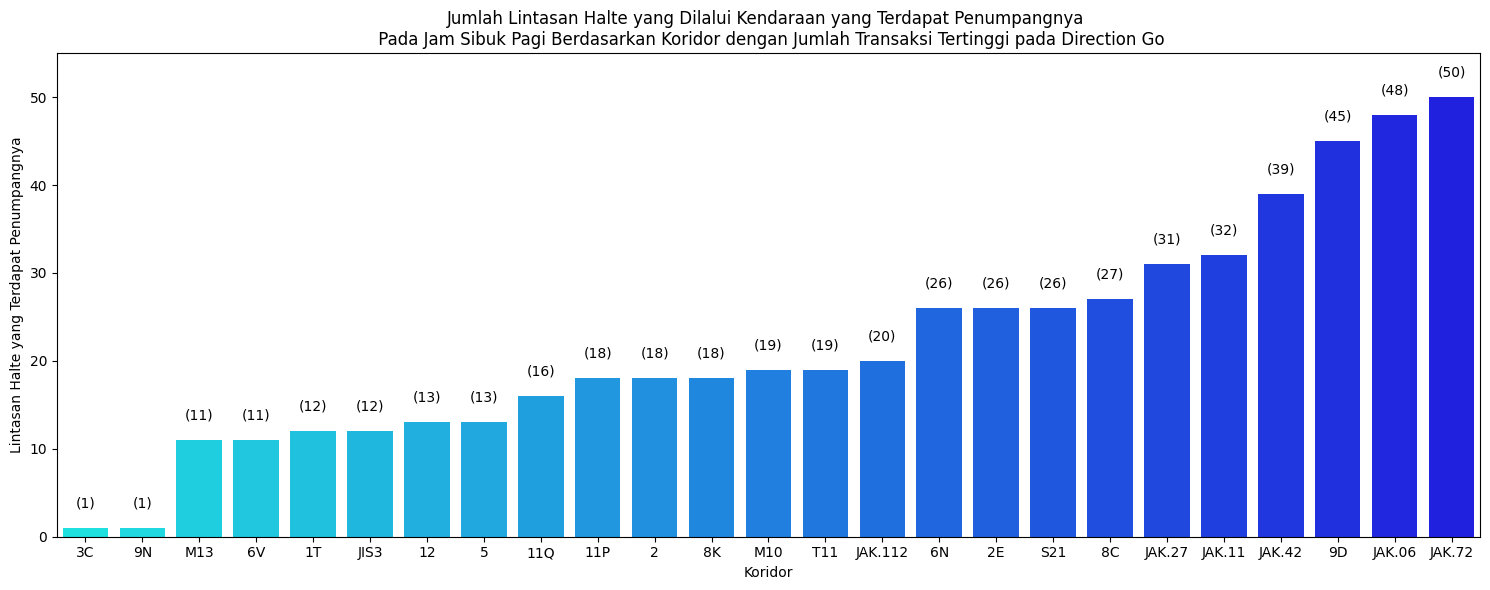

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(data=df0509RekayasaGo, x='corridorID', y='countSeq', palette='blend:cyan,blue')
plt.title('Jumlah Lintasan Halte yang Dilalui Kendaraan yang Terdapat Penumpangnya \n Pada Jam Sibuk Pagi Berdasarkan Koridor dengan Jumlah Transaksi Tertinggi pada Direction Go')
plt.xlabel('Koridor')
plt.ylabel('Lintasan Halte yang Terdapat Penumpangnya')
plt.ylim(0,55)
plt.tight_layout()

# Menambahkan label Jumlah Halte (countSeq) yang dilalui kendaraan yang terdapat penumpang didalamnya
for i, v in enumerate(df0509RekayasaGo['countSeq']):
    plt.text(i, v + 2, f"({v})", ha='center', va='bottom')

plt.show()

<a name='pagigo'></a>

In [ ]:
# FIlter data untuk countSeq terkecil berdasarkan Q1
(df0509RekayasaGo[df0509RekayasaGo['countSeq']<df0509RekayasaGo['countSeq'].quantile(0.25)]
                  [['corridorID','corridorName','newSeqRoute','countSeq','newRouteCorridor']])

corridorID                             corridorName newSeqRoute  countSeq  \
6          3C          Rusun Kapuk Muara - Penjaringan       0 - 1         1   
13         9N                   Pinang Ranti - Pramuka       1 - 2         1   
22        M13                    Puri Beta 2 - Tendean      1 - 12        11   
9          6V              Ragunan - Gelora Bung Karno      2 - 13        11   
3          1T                     Cibubur - Balai Kota      3 - 15        12   
20       JIS3  Harmoni - Jakarta International Stadium      1 - 13        12   

                       newRouteCorridor  
6       Rusun Kapuk Muara - Penjaringan  
13              Garuda Taman Mini - BKN  
22                Puri Beta 1 - Tendean  
9                 SMK 57 - Masjid Agung  
3                       Benhil 3 - IRTI  
20  Sbr. Taman BMW - Harmoni Arah Utara

- **Koridor 1T, 3C, 6V, 9N, JIS3, dan M13** memiliki countSeq yang rendah pada **direction go**
- **Koridor 3C** dari ujung halte koridor ke ujung halte koridor hanya **terdapat 1 pemberhentian** saja sehingga corridorName nya sama dengan newRoute Corridor. OLeh karena itu koridor ini **tidak bisa dikategorikan** kedalam koridor yang akan direkayasa jalur nya

In [ ]:
# Mengecek apakah ada nilai countSeq yang ekstrem
IQR = df0509RekayasaGo['countSeq'].quantile(0.75) - df0509RekayasaGo['countSeq'].quantile(0.25)
lower_bound = df0509RekayasaGo['countSeq'].quantile(0.25) - IQR
upper_bound = df0509RekayasaGo['countSeq'].quantile(0.75) + IQR
df0509RekayasaGo[(df0509RekayasaGo['countSeq'] < lower_bound)]

Empty DataFrame
Columns: [corridorID, corridorName, tapInStopsName, stopStartSeq, tapOutStopsName, stopEndSeq, newRouteCorridor, newSeqRoute, countSeq]
Index: []

#### Solusi 4.2.1.3

1. Pada jam sibuk kerja pagi, didapati data bahwa **penumpang hanya terdapat pada lintasan halte tertentu saja**. Artinya, ketika kendaraan Transjakarta bergerak dari halte awal (stopStart Seq = 0) sampai dengan halte pada ujung koridor, **terdapat kondisi dimana tidak ada penumpang yang berada pada kendaraan tersebut**. Tentunya hal tersebut menjadi tidak efektif dan efisien. Oleh karena itu **kendaraan tidak harus bergerak dari ujung halte koridor ke ujung halte koridor**
2. Pada direction go, terdapat koridor yang perlu diefektifkan perjalannya **agar tidak perlu bergerak dari halte awal (stopStart Seq = 0) sampai ujung halte koridor** yaitu **koridor 1T, 6V, 9N, JIS3, dan M13** dengan rincian:
  - Koridor **9N** yang pada direction **go** biasanya berjalan dari **Halte Pinang Ranti sampai Pramuka** dapat dibuat agar hanya berjalan dari **Halte Garuda Taman Mini sampai BKN**.
  - Koridor **M13** yang pada direction **go** biasanya berjalan dari **Halte Puri Beta 2 sampai Tendean** dapat dibuat agar hanya berjalan dari **Halte Puri Beta 1 sampai Tendean**.
  - Koridor **6V** yang pada direction **go** biasanya berjalan dari **Halte Ragunan sampai Gelora Bung Karno** dapat dibuat agar hanya berjalan dari **Halte SMK 57 sampai Masjid Agung**.
  - Koridor **1T** yang pada direction **go** biasanya berjalan dari **Halte Cibubur sampai Balai Kota** dapat dibuat agar hanya berjalan dari **Halte Benhil 3 sampai IRTI**.
  - Koridor **JIS3** yang pada direction **go** biasanya berjalan dari **Halte Harmoni sampai Jakarta International Stadium** dapat dibuat agar hanya berjalan dari **Halte Sbr. Taman BMW sampai Harmoni Arah Utara.**
2. Pada **direction back**, terdapat koridor yang perlu diefektifkan perjalannya **agar tidak perlu bergerak dari halte awal (stopStart Seq = 0) sampai ujung halte koridor** yaitu **koridor 12,  5, 6N, 9N, JIS3, dan M13** dengan rincian
  - Koridor **9N** yang pada direction **back** biasanya berjalan dari **Halte Pramuka sampai Pinang Ranti** dapat dibuat untuk berjalan hanya pada **Halte Garuda Taman Mini sampai Pinang Ranti.**
  - Koridor **5** yang pada direction **back** biasanya berjalan dari **Halte Ancol sampai Matraman Baru** dapat dibuat untuk berjalan hanya pada **Halte Budi Utomo sampai Tegalan**.
  - Koridor **M13** yang pada direction **back** biasanya berjalan dari **Halte Tendean sampai Puri Beta 2** dapat dibuat untuk berjalan hanya pada **Halte Tirtayasa sampai Adam Malik**.
  - Koridor **JIS3** yang pada direction **back** biasanya berjalan dari **Halte Jakarta International Stadium sampai Harmoni** dapat dibuat untuk berjalan hanya pada **Halte Pecongoran sampai JIS**.
  - Koridor **6N** yang pada direction **back** biasanya berjalan dari **Halte Blok M via Kemang sampai Ragunan** dapat dibuat untuk berjalan hanya pada **Halte Sbr. Plaza Kemang 88 sampai Kementerian Pertanian**.
  - Koridor **12** yang pada direction **back** biasanya berjalan dari **Halte Pluit sampai Tanjung Priok** dapat dibuat untuk berjalan hanya pada **Halte Gunung Sahari Mangga Dua sampai Permai Koja Arah Utara**.

###4.2.2 Analisis Strategi Pengelolaan Transjakarta pada Jam Sibuk Kerja Sore Hari (16.00 - 21.59)

####4.2.2.1 Analisis Pemindahan Alokasi Kendaraan dari Koridor dengan Jumlah Transaksi Rendah ke Koridor dengan Jumlah Transaksi Tinggi pada Jam Sibuk Kerja Sore

In [ ]:
# Membuat dataframe yang memfilter Transaksi yang terjadi pada Jam 16.00 - 21.59 di Weekday
df1621 = (tj[tj['tapInHour'].isin([16,17,18,19,20,21])]
                [tj['tapInDay'].isin('Monday Tuesday Wednesday Thursday Friday'.split(' '))]
          )

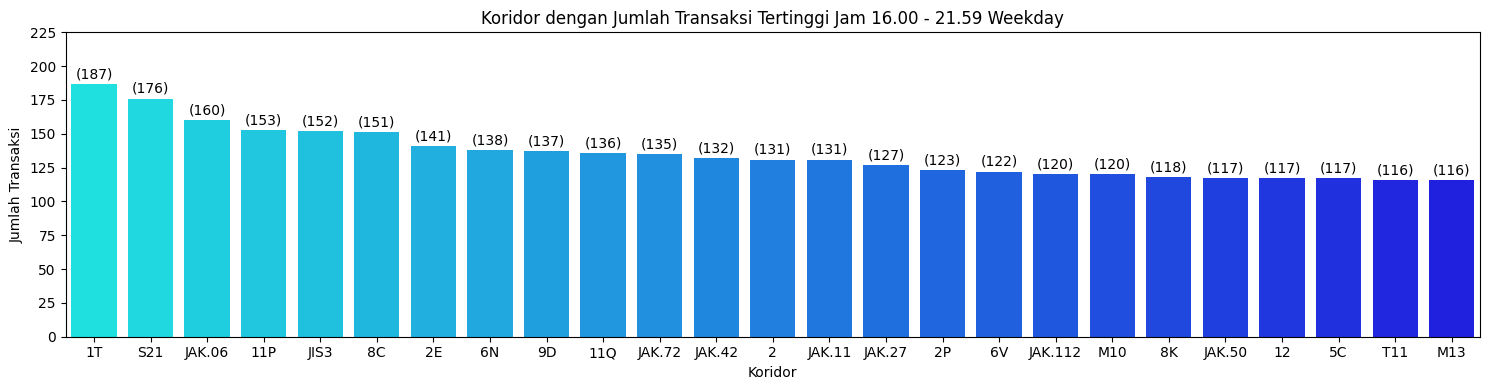

In [ ]:
# Menentukan Koridor dengan Jumlah Transaksi Terbanyak pada Jam Sibuk Sore
dfTop1621 = (df1621.groupby(['corridorID','corridorName'])['transID'].count()
                     .sort_values(ascending=False)
                     .reset_index()).head(25)

# Membuat Barplot dari Koridor dengan Jumlah Transaksi Terbanyak
plt.figure(figsize=(15,4))
sns.barplot(x=dfTop1621['corridorID'], y=dfTop1621['transID'], palette='blend:cyan,blue')
plt.xlabel('Koridor')
plt.ylabel('Jumlah Transaksi')
plt.ylim(0,225)
plt.title('Koridor dengan Jumlah Transaksi Tertinggi Jam 16.00 - 21.59 Weekday')
plt.tight_layout()

# Menambahkan label jumlah Transaksi
for i, v in enumerate(dfTop1621['transID']):
    plt.text(i, v + 2, f"({v})", ha='center', va='bottom')

plt.show()

In [ ]:
# Memfilter Koridor dengan Transaksi Tertinggi di Jam Sibuk Sore berdasarkan Q3
dfTop1621[(dfTop1621['transID'] > dfTop1621['transID'].quantile(0.75))]

corridorID                                 corridorName  transID
0         1T                         Cibubur - Balai Kota      187
1        S21                                Ciputat - CSW      176
2     JAK.06               Kampung Rambutan - Pondok Gede      160
3        11P  Rusun Pondok Bambu - Walikota Jakarta Timur      153
4       JIS3      Harmoni - Jakarta International Stadium      152
5         8C                 Kebayoran Lama - Tanah Abang      151

In [ ]:
# Mengecek apakah ada nilai ekstrem Koridor dengan Transaksi Tertinggi di Jam Sibuk Sore
IQR = (dfTop1621['transID'].quantile(0.75) - dfTop1621['transID'].quantile(0.25)) * 1.5
upper_bound = dfTop1621['transID'].quantile(0.75) + IQR
dfTop1621[(dfTop1621['transID'] > upper_bound)]

corridorID          corridorName  transID
0         1T  Cibubur - Balai Kota      187
1        S21         Ciputat - CSW      176

1. Koridor dengan **Jumlah Transaksi yang tinggi** pada Jam Sibuk Kerja Sore adalah **Koridor 1T, S21, JAK06, 11P, JIS3 dan 8C**
2. **Koridor 1T dan S21** memiliki jumlah transaksi yang jauh lebih tinggi dibanding koridor lain

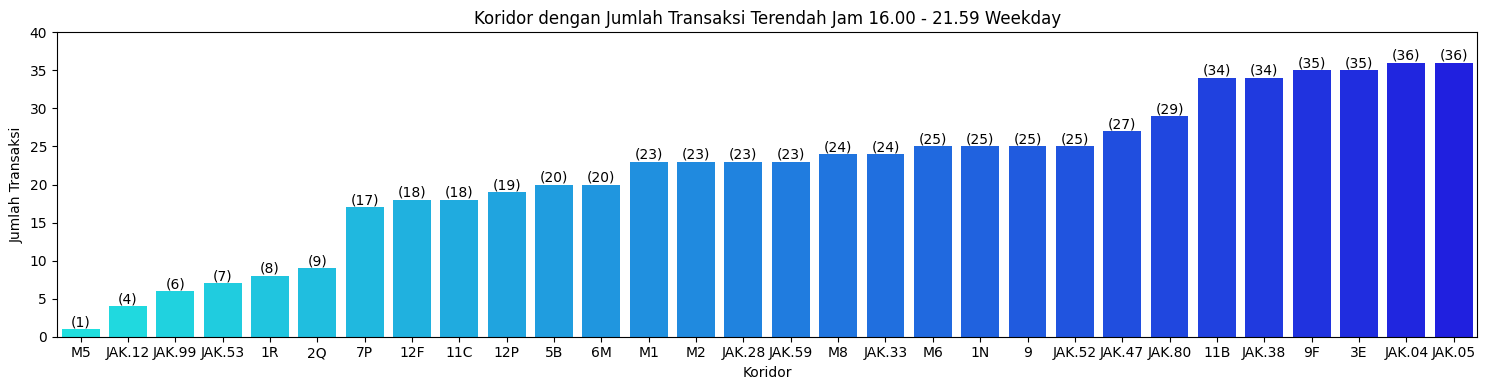

In [ ]:
# Menentukan Koridor dengan Jumlah Transaksi Terendah pada Jam Sibuk Sore Hari
dfBottom1621 = (df1621.groupby(['corridorID','corridorName'])['transID'].count()
                        .sort_values(ascending=True)
                        .reset_index()).head(30)

# Membuat Barplot dari Koridor dengan Jumlah Transaksi Terendah
plt.figure(figsize=(15,4))
sns.barplot(x=dfBottom1621['corridorID'], y=dfBottom1621['transID'], palette='blend:cyan,blue')
plt.xlabel('Koridor')
plt.ylabel('Jumlah Transaksi')
plt.ylim(0,40)
plt.title('Koridor dengan Jumlah Transaksi Terendah Jam 16.00 - 21.59 Weekday')
plt.tight_layout()

# Menambahkan label jumlah Transaksi
for i, v in enumerate(dfBottom1621['transID']):
    plt.text(i, v , f"({v})", ha='center', va='bottom')

plt.show()

In [ ]:
# Memfilter Koridor dengan Transaksi Tertinggi di Jam Sibuk Sore berdasarkan Q1
dfBottom1621[(dfBottom1621['transID'] < dfBottom1621['transID'].quantile(0.25))]

corridorID                                    corridorName  transID
0         M5                           Matraman Baru - Ancol        1
1     JAK.12  Tanah Abang - Kebayoran Lama via Pos Pengumben        4
2     JAK.99                     Term. Pulo Gadung - Lampiri        6
3     JAK.53                Grogol - Pos Pengumben via Slipi        7
4         1R                             Senen - Tanah Abang        8
5         2Q                         Gondangdia - Balai Kota        9
6         7P                             Pondok Kelapa - BKN       17

In [ ]:
# Mengecek apakah ada nilai ekstrem Koridor dengan Transaksi Terendah di Jam Sibuk Sore
IQR = (dfBottom1621['transID'].quantile(0.75) - dfBottom1621['transID'].quantile(0.25)) * 1.5
lower_bound = dfBottom1621['transID'].quantile(0.25) - IQR
dfBottom1621[(dfBottom1621['transID'] < lower_bound)]

corridorID                                    corridorName  transID
0         M5                           Matraman Baru - Ancol        1
1     JAK.12  Tanah Abang - Kebayoran Lama via Pos Pengumben        4

1. Koridor dengan **Jumlah Transaksi yang rendah** pada Jam Sibuk Kerja Sore adalah **Koridor M5, JAK12, JAK99, JAK53, 1R, 2Q dan 7P**
2. **Koridor M5 dan JAK12** adalah Koridor dengan jumlah transaksi yang **jauh lebih rendah** dibanding koridor lain

#####Solusi 4.2.2.1

 1. Koridor dengan **Jumlah Transaksi yang rendah** pada Jam Sibuk Kerja Sore adalah **Koridor M5, JAK12, JAK99, JAK53, 1R, 2Q dan 7P**
 2. Koridor dengan **Jumlah Transaksi yang tinggi** pada Jam Sibuk Kerja Sore adalah **Koridor 1T, S21, JAK06, 11P, JIS3 dan 8C**
 3. Pada Jam Sibuk Kerja Sore, kendaraan pada **Koridor M5, JAK12, JAK99, JAK53, 1R, 2Q dan 7P** dapat **dialokasikan** ke **Koridor 1T, S21, JAK06, 11P, JIS3 dan 8C**
 4. **Koridor M5 dan JAK12** adalah Koridor dengan prioritas utama **agar kendaraan didalamnya dialihkan ke koridor lain**
 5. **Koridor 1T dan S21** adalah koridor dengan prioritas utama **untuk dialokasikan kendaraan lebih banyak kedalamnya**

####4.2.2.2 Analisis Alokasi Kendaraan pada Koridor dengan Jumlah Transaksi Tinggi pada Jam Sibuk Kerja Sore berdasarkan Direction

In [ ]:
# Membuat dataframe yang meng-agregasi jumlah transaksi berdasarkan Direction
df1621Direction = (df1621[df1621['corridorID'].isin(dfTop1621['corridorID'])]
                      .groupby(['corridorID','corridorName','direction'])['transID'].count()
                      .reset_index())

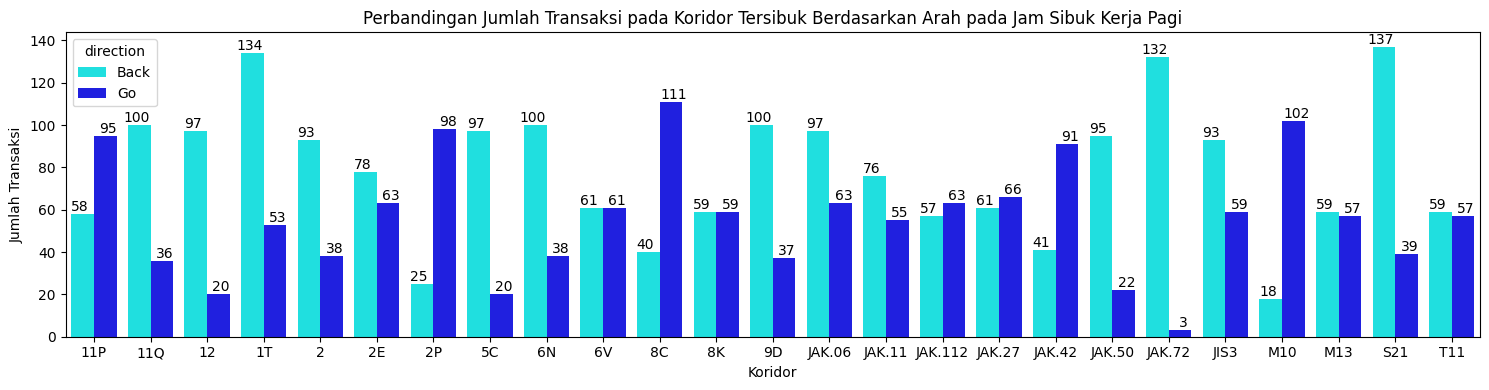

In [ ]:
plt.figure(figsize=(15, 4))
sns.barplot(x='corridorID', y='transID', hue='direction', data=df1621Direction, palette='blend:cyan,blue')
plt.xlabel('Koridor')
plt.ylabel('Jumlah Transaksi')
plt.title('Perbandingan Jumlah Transaksi pada Koridor Tersibuk Berdasarkan Arah pada Jam Sibuk Kerja Pagi')
plt.tight_layout()

# Menambahkan label jumlah Transaksi
for i, v in enumerate(df1621Direction['transID']):
    plt.text(i/2 - 0.25, v , f"{v}", ha='center', va='bottom')

plt.show()

- Pada Koridor dengan jumlah transaksi tertinggi di jam sibuk sore, **jumlah transaksi pada koridor berdasarkan directionnya tidak sama**. Oleh sebab itu **alokasi jumlah kendaraan** pada suatu koridor antara **direction go dan back harus dibedakan** \\
- Dengan adanya **perbedaan jumlah transaksi pada direction go dan direction back pada 1 koridor yang sama**, maka **jumlah kendaraan harus dialokasikan lebih banyak pada direction yang jumlah transaksinya lebih banyak** dibandingkan **direction yang jumlah transaksi yang sedikit**

In [ ]:
# Menentukan Koridor yang Jumlah Transaksi Arah Go yang lebih besar dari Arah Back
df1621DirectionCopy = (df1621[df1621['corridorID'].isin(dfTop1621['corridorID'])]
                      .groupby(['corridorID','corridorName','direction'])['transID'].count()
                      .unstack())
df1621DirectionGo = (df1621DirectionCopy[df1621DirectionCopy['Go'] > df1621DirectionCopy['Back']]
                      .sort_values(by='Go',ascending=False))
df1621DirectionGo['go/back'] = df1621DirectionGo['Go']/df1621DirectionGo['Back']
df1621DirectionGo

direction                                               Back   Go   go/back
corridorID corridorName                                                    
8C         Kebayoran Lama - Tanah Abang                   40  111  2.775000
M10        PGC 2 - Tanjung Priok                          18  102  5.666667
2P         Gondangdia - Senen                             25   98  3.920000
11P        Rusun Pondok Bambu - Walikota Jakarta Timur    58   95  1.637931
JAK.42     Kampung Melayu - Pondok Kelapa                 41   91  2.219512
JAK.27     Pulo Gebang - Rorotan                          61   66  1.081967
JAK.112    Terminal Tanah Merah - Pulo Gadung             57   63  1.105263

In [ ]:
# Menentukan Koridor dengan Rasio Go terhadap Back Tertinggi berdasarkan Q3
df1621DirectionGo[df1621DirectionGo['go/back'] > df1621DirectionGo['go/back'].quantile(0.75)]

direction                         Back   Go   go/back
corridorID corridorName                              
M10        PGC 2 - Tanjung Priok    18  102  5.666667
2P         Gondangdia - Senen       25   98  3.920000

In [ ]:
# Mengecek apakah ada nilai ekstrem pada Koridor dengan Rasio Go terhadap Back Tertinggi
IQR = 1.5 * (df1621DirectionGo['go/back'].quantile(0.75) - df1621DirectionGo['go/back'].quantile(0.25))
lower_bound = df1621DirectionGo['go/back'].quantile(0.25) - IQR
upper_bound = df1621DirectionGo['go/back'].quantile(0.75) + IQR
df1621DirectionGo[df1621DirectionGo['go/back'] > upper_bound]

Empty DataFrame
Columns: [Back, Go, go/back]
Index: []

- Pada jam sibuk sore, **koridor M10 dan 2P** memiliki jumlah penumpang dengan **rasio direction go yang lebih tinggi dibanding direction back**

In [ ]:
# Menentukan Koridor yang Jumlah Transaksi Arah Back yang lebih besar dari Arah Go
df1621DirectionBack = (df1621DirectionCopy[df1621DirectionCopy['Go'] < df1621DirectionCopy['Back']]
                        .sort_values(by='Back',ascending=False))
df1621DirectionBack['back/go'] = df1621DirectionBack['Back']/df1621DirectionBack['Go']
df1621DirectionBack

direction                                            Back  Go    back/go
corridorID corridorName                                                 
S21        Ciputat - CSW                              137  39   3.512821
1T         Cibubur - Balai Kota                       134  53   2.528302
JAK.72     Kampung Rambutan - Pasar Rebo via Poncol   132   3  44.000000
11Q        Kampung Melayu - Pulo Gebang via BKT       100  36   2.777778
6N         Ragunan - Blok M via Kemang                100  38   2.631579
9D         Pasar Minggu - Tanah Abang                 100  37   2.702703
12         Tanjung Priok - Pluit                       97  20   4.850000
5C         PGC - Juanda                                97  20   4.850000
JAK.06     Kampung Rambutan - Pondok Gede              97  63   1.539683
JAK.50     Kalideres - Puri Kembangan                  95  22   4.318182
2          Pulo Gadung - Monas                         93  38   2.447368
JIS3       Harmoni - Jakarta International Stadium     93  59   1.576271
2E         Rusun Rawa Bebek - Kodamar                  78  63   1.238095
JAK.11     Tanah Abang - Kebayoran Lama                76  55   1.381818
M13        Puri Beta 2 - Tendean                       59  57   1.035088
T11        Poris Plawad - Bundaran Senayan             59  57   1.035088

In [ ]:
# Menentukan Koridor dengan Rasio Back terhadap Go Tertinggi berdasarkan Q3
df1621DirectionBack[df1621DirectionBack['back/go'] > df1621DirectionBack['back/go'].quantile(0.75)]

direction                                            Back  Go    back/go
corridorID corridorName                                                 
JAK.72     Kampung Rambutan - Pasar Rebo via Poncol   132   3  44.000000
12         Tanjung Priok - Pluit                       97  20   4.850000
5C         PGC - Juanda                                97  20   4.850000
JAK.50     Kalideres - Puri Kembangan                  95  22   4.318182

In [ ]:
# Mengecek apakah ada nilai ekstrem pada Koridor dengan Rasio Back terhadap Go Tertinggi
IQR = 1.5 * (df1621DirectionBack['back/go'].quantile(0.75) - df1621DirectionBack['back/go'].quantile(0.25))
lower_bound = df1621DirectionBack['back/go'].quantile(0.25) - IQR
upper_bound = df1621DirectionBack['back/go'].quantile(0.75) + IQR
df1621DirectionBack[df1621DirectionBack['back/go'] > upper_bound]

direction                                            Back  Go  back/go
corridorID corridorName                                               
JAK.72     Kampung Rambutan - Pasar Rebo via Poncol   132   3     44.0

- Pada jam sibuk sore, **koridor JAK72, 12, 5C  dan JAK50** memiliki jumlah penumpang dengan **rasio direction back yang lebih tinggi** dibanding direction go
- **Koridor JAK72** memiliki rasio jumlah penumpang dengan **rasio direction back yang jauh lebih tinggi** dari direction go

#####Solusi 4.2.2.2

Pada Koridor dengan jumlah transaksi terbanyak pada jam sibuk sore hari, dapat dilakukan optimalisasi berdasarkan direction nya:
1. **Jumlah kendaraan direction go** pada koridor **M10 dan 2P** harus **dialokasikan lebih banyak** daripada direction back-nya.
2. **Jumlah kendaraan direction back** pada koridor **JAK72, 12, 5C dan JAK50** harus **dialokasikan lebih banyak** daripada direction go-nya. **Koridor JAK72** harus mendapat prioritas utama.

####4.2.2.3 Analis Rekayasa Jalur Pada Corridor Terpadat pada Jam Sibuk Kerja Sore Hari

- Kendaraan Transjakarta **bergerak sesuai dengan koridornya** dari **titik halte awal sampai ke halte akhir**.
- Pada praktiknya terdapat **lintasan halte** dengan **jumlah penumpang yang bernilai 0**, tentunya akan menjadi hal yang **tidak efisien** jika **kendaraan tetap berjalan dari halte awal sampai halte akhir**.
- Perlu dilakukan **rekayasa jalur** agar kendaraan Transjakarta **berjalan pada lintasan halte-halte tertentu yang terdapat penumpang didalamnya**

#####4.2.2.3.1 Rekayasa Jalur pada Direction Back

In [ ]:
# Menentukan stopStartSeq minimum pada tiap koridor dengan direction back
df1621StartSeqBack = (df1621[df1621['direction']=='Back']
                          [df1621['corridorID'].isin(dfTop1621['corridorID'])]
                          [['corridorID','corridorName','tapInStopsName','stopStartSeq']]
                          .sort_values(by=['corridorID','corridorName','stopStartSeq'])
                          .groupby(['corridorID','corridorName']).head(1)
                          .reset_index(drop=True)
                          )
df1621StartSeqBack.head()

corridorID                                 corridorName  \
0        11P  Rusun Pondok Bambu - Walikota Jakarta Timur   
1        11Q         Kampung Melayu - Pulo Gebang via BKT   
2         12                        Tanjung Priok - Pluit   
3         1T                         Cibubur - Balai Kota   
4          2                          Pulo Gadung - Monas   

              tapInStopsName  stopStartSeq  
0               Kodim 0505 1             1  
1      Jatinegara RS Premier             2  
2  Landmark Pluit Auto Plaza             1  
3           Bank Indonesia 1             1  
4                   Gambir 2             2

In [ ]:
# Menentukan stopEndSeq maksimum pada tiap koridor dengan direction back
df1621EndSeqBack = (df1621[df1621['direction']=='Back']
                          [df1621['corridorID'].isin(dfTop1621['corridorID'])]
                          [['corridorID','tapOutStopsName','stopEndSeq']]
                          .sort_values(by=['corridorID','stopEndSeq'], ascending=[False,False])
                          .groupby(['corridorID']).head(1)
                          .reset_index(drop=True)
                          )
df1621EndSeqBack.head()

corridorID      tapOutStopsName  stopEndSeq
0        T11  SDN Sukasari Enam 2          20
1        S21     Pool PPD Ciputat          28
2        M13          Puri Beta 2          11
3        M10      Pedati Prumpung          15
4       JIS3        Jembatan Item          13

In [ ]:
# Menggabungkan dataframe koridor dengan stopStartSeq minimum dengan stopEndSeq maksimum
df1621RekayasaBack = df1621StartSeqBack.merge(df1621EndSeqBack, how = 'left', on = 'corridorID')

# Menambahkan kolom newRouteCorridor, yaitu rute baru dari suatu koridor yang mengacu pada halte di stopStartSeq minimum dengan stopEndSeq maksimum
# nantinya kendaraan pada direction back hanya akan berjalan dari halte dengan stopStartSeq minimum sampai halte stopEndSeq maksimum
df1621RekayasaBack['newRouteCorridor'] = df1621RekayasaBack['tapInStopsName'] + ' - ' + df1621RekayasaBack['tapOutStopsName']

# Menambahkan kolom newSeqRoute, yaitu rute baru yang mengacu pada stopStartSeq minimum dengan stopEndSeq maksimum
df1621RekayasaBack['newSeqRoute'] = df1621RekayasaBack['stopStartSeq'].astype(str) + ' - ' + df1621RekayasaBack['stopEndSeq'].astype(str)

# Menambahkan kolom countseq, yaitu banyak nya halte yang harus dilalui pada rute tersebut (halte stopEndSeq dikurangi halte stopStartEnd)
df1621RekayasaBack['countSeq'] = df1621RekayasaBack['stopEndSeq'] - df1621RekayasaBack['stopStartSeq']
df1621RekayasaBack = df1621RekayasaBack.sort_values(by='countSeq', ascending=True)
df1621RekayasaBack[['corridorID','corridorName','newSeqRoute','countSeq','newRouteCorridor']]

corridorID                                 corridorName newSeqRoute  \
22        M13                        Puri Beta 2 - Tendean      6 - 11   
4           2                          Pulo Gadung - Monas      2 - 15   
20       JIS3      Harmoni - Jakarta International Stadium      0 - 13   
3          1T                         Cibubur - Balai Kota      1 - 15   
5          2E                   Rusun Rawa Bebek - Kodamar     10 - 25   
21        M10                        PGC 2 - Tanjung Priok      0 - 15   
9          6V                  Ragunan - Gelora Bung Karno      0 - 16   
7          5C                                 PGC - Juanda      1 - 18   
24        T11              Poris Plawad - Bundaran Senayan      2 - 20   
2          12                        Tanjung Priok - Pluit      1 - 19   
6          2P                           Gondangdia - Senen      1 - 19   
8          6N                  Ragunan - Blok M via Kemang      0 - 20   
15    JAK.112           Terminal Tanah Merah - Pulo Gadung      8 - 28   
0         11P  Rusun Pondok Bambu - Walikota Jakarta Timur      1 - 22   
11         8K                            Batusari - Grogol      5 - 26   
23        S21                                Ciputat - CSW      3 - 28   
1         11Q         Kampung Melayu - Pulo Gebang via BKT      2 - 27   
14     JAK.11                 Tanah Abang - Kebayoran Lama     11 - 40   
19     JAK.72     Kampung Rambutan - Pasar Rebo via Poncol      0 - 29   
17     JAK.42               Kampung Melayu - Pondok Kelapa     13 - 43   
18     JAK.50                   Kalideres - Puri Kembangan     11 - 44   
10         8C                 Kebayoran Lama - Tanah Abang      0 - 33   
13     JAK.06               Kampung Rambutan - Pondok Gede     13 - 50   
16     JAK.27                        Pulo Gebang - Rorotan      3 - 44   
12         9D                   Pasar Minggu - Tanah Abang      0 - 48   

    countSeq                                   newRouteCorridor  
22         5                              Seskoal - Puri Beta 2  
4         13                           Gambir 2 - Pulo Gadung 1  
20        13                 Harmoni Arah Utara - Jembatan Item  
3         14                Bank Indonesia 1 - Cibubur Junction  
5         15     Pool Taksi - Raya Pulo Gebang Akses St. Cakung  
21        15                    Tanjung Priok - Pedati Prumpung  
9         16                        Gelora Bung Karno - Ragunan  
7         17                                   Budi Utomo - BKN  
24        18       Senayan JCC Arah Barat - SDN Sukasari Enam 2  
2         18                Landmark Pluit Auto Plaza - Enggano  
6         18           Kel. Senen - Bundaran Taman Gondangdia 1  
8         20                          Blok M Jalur 2 - Ampera 1  
15        20         Bermis 1 - Boulevard Kelapa Hybrida Raya 2  
0         21                  Kodim 0505 1 - Rusun Pondok Bambu  
11        21  Mediterania Garden Residences - Yayasan Alkahf...  
23        25                     Kramat Pela - Pool PPD Ciputat  
1         25                Jatinegara RS Premier - Pulo Gebang  
14        29             RS Medika Permata Hijau 3 - JPO Blok G  
19        29         Jln. Pule Ciracas - Term. Kampung Rambutan  
17        30       RS Duren Sawit - Simpang Jatinegara Timur IV  
18        33  Jln. Madrasah I Bojong Raya - Jln. H. Hamid Se...  
10        33      Jak Lingko Tanah Abang - Ps. Kebayoran Lama 1  
13        37                       Green Terrace - Pondok Molek  
16        41  Sbr. Masjid At Taqwa Karang Tengah - Sentra Timur  
12        48      Term. Pasar Minggu - Jak Lingko Tanah Abang 2

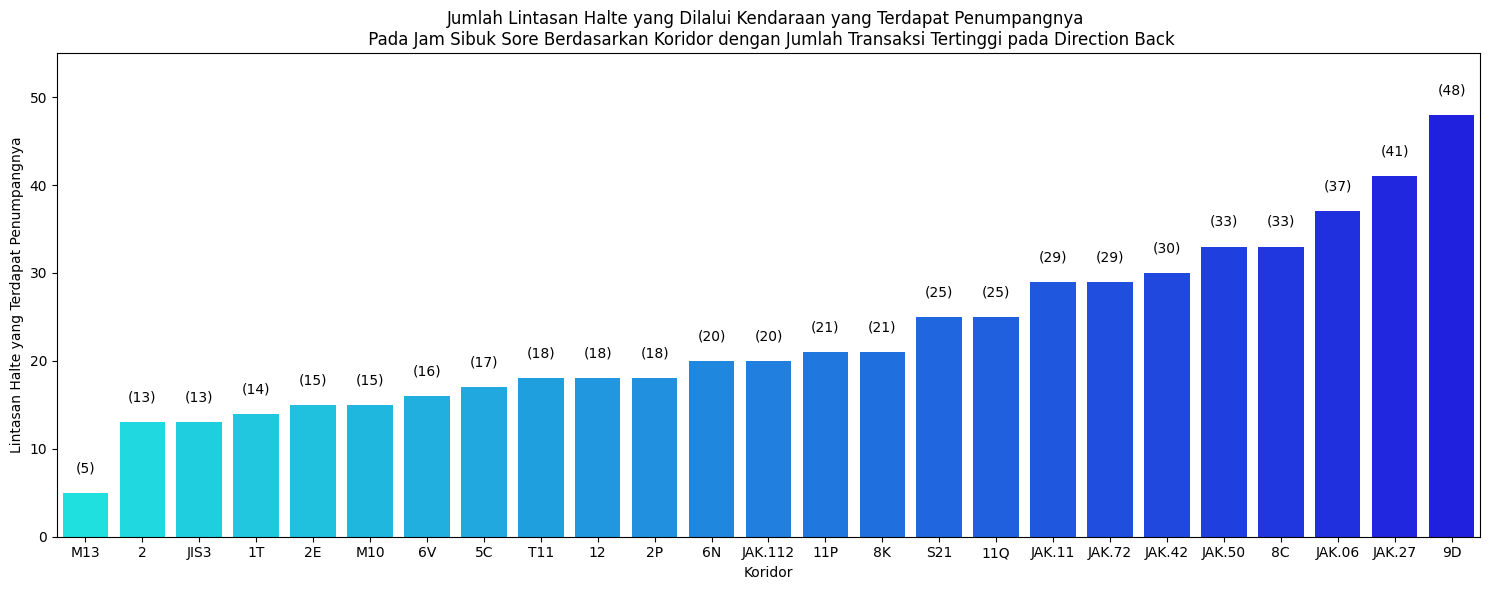

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(data=df1621RekayasaBack, x='corridorID', y='countSeq', palette='blend:cyan,blue')
plt.title('Jumlah Lintasan Halte yang Dilalui Kendaraan yang Terdapat Penumpangnya \n Pada Jam Sibuk Sore Berdasarkan Koridor dengan Jumlah Transaksi Tertinggi pada Direction Back')
plt.xlabel('Koridor')
plt.ylabel('Lintasan Halte yang Terdapat Penumpangnya')
plt.ylim(0,55)
plt.tight_layout()

# Menambahkan label Jumlah Halte (countSeq) yang dilalui kendaraan yang terdapat penumpang didalamnya
for i, v in enumerate(df1621RekayasaBack['countSeq']):
    plt.text(i, v + 2, f"({v})", ha='center', va='bottom')

plt.show()

<a name='soreback'></a>

In [ ]:
# FIlter data untuk countSeq terkecil berdasarkan Q1
(df1621RekayasaBack[df1621RekayasaBack['countSeq']<df1621RekayasaBack['countSeq'].quantile(0.25)]
                    [['corridorID','corridorName','newSeqRoute','countSeq','newRouteCorridor']])

corridorID                             corridorName newSeqRoute  countSeq  \
22        M13                    Puri Beta 2 - Tendean      6 - 11         5   
4           2                      Pulo Gadung - Monas      2 - 15        13   
20       JIS3  Harmoni - Jakarta International Stadium      0 - 13        13   
3          1T                     Cibubur - Balai Kota      1 - 15        14   
5          2E               Rusun Rawa Bebek - Kodamar     10 - 25        15   
21        M10                    PGC 2 - Tanjung Priok      0 - 15        15   

                                  newRouteCorridor  
22                           Seskoal - Puri Beta 2  
4                         Gambir 2 - Pulo Gadung 1  
20              Harmoni Arah Utara - Jembatan Item  
3              Bank Indonesia 1 - Cibubur Junction  
5   Pool Taksi - Raya Pulo Gebang Akses St. Cakung  
21                 Tanjung Priok - Pedati Prumpung

Koridor M13 yang pada direction back biasanya berjalan dari Tendean sampai Puri Beta 2 dapat dibuat agar hanya berjalan dari halte seskoal sampai Puri Beta 2

In [ ]:
# Mengecek apakah ada nilai countSeq yang ekstrem
IQR = 1.5 * (df1621RekayasaBack['countSeq'].quantile(0.75) - df1621RekayasaBack['countSeq'].quantile(0.25))
lower_bound = df1621RekayasaBack['countSeq'].quantile(0.25) - IQR
upper_bound = df1621RekayasaBack['countSeq'].quantile(0.75) + IQR
df1621RekayasaBack[(df1621RekayasaBack['countSeq'] < lower_bound)][['corridorID','corridorName','newSeqRoute','countSeq','newRouteCorridor']]

Empty DataFrame
Columns: [corridorID, corridorName, newSeqRoute, countSeq, newRouteCorridor]
Index: []

- Pada **direction back**, **koridor M13, 1T, 2, 2E, JIS3, dan M10** memiliki countSeq yang rendah

#####4.2.2.3.2 Rekayasa Jalur pada Direction Go

In [ ]:
# Menentukan stopStartSeq minimum pada tiap koridor dengan direction go
df1621StartSeqGo = (df1621[df1621['direction']=='Go']
                          [df1621['corridorID'].isin(dfTop1621['corridorID'])]
                          [['corridorID','corridorName','tapInStopsName','stopStartSeq']]
                          .sort_values(by=['corridorID','corridorName','stopStartSeq'])
                          .groupby(['corridorID','corridorName']).head(1)
                          .reset_index(drop=True)
                          )
df1621StartSeqGo.head()

corridorID                                 corridorName  \
0        11P  Rusun Pondok Bambu - Walikota Jakarta Timur   
1        11Q         Kampung Melayu - Pulo Gebang via BKT   
2         12                        Tanjung Priok - Pluit   
3         1T                         Cibubur - Balai Kota   
4          2                          Pulo Gadung - Monas   

            tapInStopsName  stopStartSeq  
0  Masjid Jami Al Barkah 1             5  
1         Perumnas Klender             3  
2              Penjaringan            17  
3         Cibubur Junction             0  
4            Cempaka Timur             5

In [ ]:
# Menentukan stopEndSeq maksimum pada tiap koridor dengan direction go
df1621EndSeqGo = (df1621[df1621['direction']=='Go']
                          [df1621['corridorID'].isin(dfTop1621['corridorID'])]
                          [['corridorID','tapOutStopsName','stopEndSeq']]
                          .sort_values(by=['corridorID','stopEndSeq'], ascending=[False,False])
                          .groupby(['corridorID']).head(1)
                          .reset_index(drop=True)
                          )
df1621EndSeqGo.head()

corridorID     tapOutStopsName  stopEndSeq
0        T11        Senayan City          24
1        S21             Dwijaya          19
2        M13          Rawa Barat          11
3        M10       Tanjung Priok          21
4       JIS3  Harmoni Arah Utara          13

In [ ]:
# Menggabungkan dataframe koridor dengan stopStartSeq minimum dengan stopEndSeq maksimum
df1621RekayasaGo = df1621StartSeqGo.merge(df1621EndSeqGo, how = 'left', on = 'corridorID')

# Menambahkan kolom newRouteCorridor, yaitu rute baru dari suatu koridor yang mengacu pada halte di stopStartSeq minimum dengan stopEndSeq maksimum
# nantinya kendaraan pada direction Go hanya akan berjalan dari halte dengan stopStartSeq minimum sampai halte stopEndSeq maksimum
df1621RekayasaGo['newRouteCorridor'] = df1621RekayasaGo['tapInStopsName'] + ' - ' + df1621RekayasaGo['tapOutStopsName']

# Menambahkan kolom newSeqRoute, yaitu rute baru yang mengacu pada stopStartSeq minimum dengan stopEndSeq maksimum
df1621RekayasaGo['newSeqRoute'] = df1621RekayasaGo['stopStartSeq'].astype(str) + ' - ' + df1621RekayasaGo['stopEndSeq'].astype(str)

# Menambahkan kolom countseq, yaitu banyak nya halte yang harus dilalui pada rute tersebut (halte stopEndSeq dikurangi halte stopStartEnd)
df1621RekayasaGo['countSeq'] = df1621RekayasaGo['stopEndSeq'] - df1621RekayasaGo['stopStartSeq']

df1621RekayasaGo = df1621RekayasaGo.sort_values(by='countSeq', ascending=True)
df1621RekayasaGo[['corridorID','corridorName','newSeqRoute','countSeq','newRouteCorridor']]

corridorID                                 corridorName newSeqRoute  \
2          12                        Tanjung Priok - Pluit     17 - 18   
19     JAK.72     Kampung Rambutan - Pasar Rebo via Poncol     48 - 49   
7          5C                                 PGC - Juanda      5 - 14   
22        M13                        Puri Beta 2 - Tendean      0 - 11   
6          2P                           Gondangdia - Senen      3 - 14   
20       JIS3      Harmoni - Jakarta International Stadium      0 - 13   
4           2                          Pulo Gadung - Monas      5 - 19   
9          6V                  Ragunan - Gelora Bung Karno      0 - 15   
0         11P  Rusun Pondok Bambu - Walikota Jakarta Timur      5 - 21   
3          1T                         Cibubur - Balai Kota      0 - 16   
11         8K                            Batusari - Grogol      2 - 18   
23        S21                                Ciputat - CSW      3 - 19   
15    JAK.112           Terminal Tanah Merah - Pulo Gadung      5 - 22   
18     JAK.50                   Kalideres - Puri Kembangan     27 - 45   
21        M10                        PGC 2 - Tanjung Priok      2 - 21   
5          2E                   Rusun Rawa Bebek - Kodamar     11 - 31   
8          6N                  Ragunan - Blok M via Kemang      4 - 24   
24        T11              Poris Plawad - Bundaran Senayan      2 - 24   
1         11Q         Kampung Melayu - Pulo Gebang via BKT      3 - 27   
12         9D                   Pasar Minggu - Tanah Abang     24 - 48   
10         8C                 Kebayoran Lama - Tanah Abang      1 - 29   
13     JAK.06               Kampung Rambutan - Pondok Gede     13 - 46   
17     JAK.42               Kampung Melayu - Pondok Kelapa      7 - 42   
14     JAK.11                 Tanah Abang - Kebayoran Lama      8 - 46   
16     JAK.27                        Pulo Gebang - Rorotan      1 - 47   

    countSeq                                   newRouteCorridor  
2          1                                Penjaringan - Pluit  
19         1  Litbang Depnaker Jaktim - Sbr. Sekolah Islam P...  
7          9                    Cawang Otista - Kramat Sentiong  
22        11                           Puri Beta 2 - Rawa Barat  
6         11                             Kanisius - Term. Senen  
20        13                           JIS - Harmoni Arah Utara  
4         14                              Cempaka Timur - Monas  
9         15                        Ragunan - Gelora Bung Karno  
0         16  Masjid Jami Al Barkah 1 - Walikota Jakarta Tim...  
3         16                    Cibubur Junction - Balai Kota 1  
11        16               Kb. Jeruk 1 - Simpang Tj. Duren Raya  
23        16                      Pusdiklat Kemenag 1 - Dwijaya  
15        17  Boulevard Janur Elok Raya 1 - Simpang Seruling...  
18        18  Jln. H. Selong Duri Kosambi - Gg. H. Doel Bojo...  
21        19                         Cawang UKI - Tanjung Priok  
5         20                 Gg. Sawo 1 - Yos Sudarso Kodamar 2  
8         20                Ampera 3 - Puskesmas Kebayoran Baru  
24        22                      Benteng Betawi - Senayan City  
1         24                     Perumnas Klender - Bidara Cina  
12        24                Tegal Parang 2 - Term. Pasar Minggu  
10        28        Univ. Satya Negara - Jak Lingko Tanah Abang  
13        33            Gg. Cengkeh Lubang Buaya - RS Adhiyaksa  
17        35                  Ps. Enjo 2 - Pospol Pondok Kelapa  
14        38       Pospol Jati Bunder - Ruko Ps. Kebayoran Lama  
16        46  Pintu Exit Term. Pulo Gebang - Simpang KH Abdu...

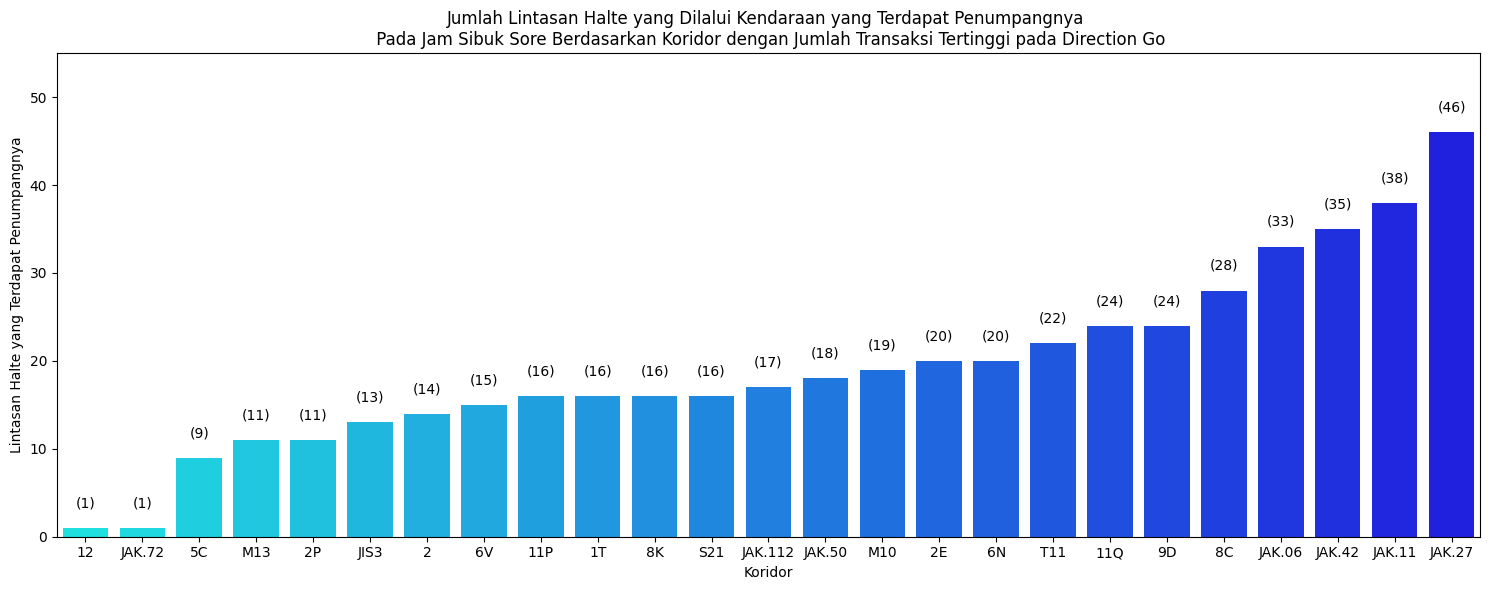

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(data=df1621RekayasaGo, x='corridorID', y='countSeq', palette='blend:cyan,blue')
plt.title('Jumlah Lintasan Halte yang Dilalui Kendaraan yang Terdapat Penumpangnya \n Pada Jam Sibuk Sore Berdasarkan Koridor dengan Jumlah Transaksi Tertinggi pada Direction Go')
plt.xlabel('Koridor')
plt.ylabel('Lintasan Halte yang Terdapat Penumpangnya')
plt.ylim(0,55)
plt.tight_layout()

# Menambahkan label Jumlah Halte (countSeq) yang dilalui kendaraan yang terdapat penumpang didalamnya
for i, v in enumerate(df1621RekayasaGo['countSeq']):
    plt.text(i, v + 2, f"({v})", ha='center', va='bottom')

plt.show()

<a name='sorego'></a>

In [ ]:
# Filter data untuk countSeq terkecil berdasarkan Q1
(df1621RekayasaGo[df1621RekayasaGo['countSeq']<df1621RekayasaGo['countSeq'].quantile(0.25)]
                 [['corridorID','corridorName','newSeqRoute','countSeq','newRouteCorridor']])

corridorID                              corridorName newSeqRoute  countSeq  \
2          12                     Tanjung Priok - Pluit     17 - 18         1   
19     JAK.72  Kampung Rambutan - Pasar Rebo via Poncol     48 - 49         1   
7          5C                              PGC - Juanda      5 - 14         9   
22        M13                     Puri Beta 2 - Tendean      0 - 11        11   
6          2P                        Gondangdia - Senen      3 - 14        11   
20       JIS3   Harmoni - Jakarta International Stadium      0 - 13        13   

                                     newRouteCorridor  
2                                 Penjaringan - Pluit  
19  Litbang Depnaker Jaktim - Sbr. Sekolah Islam P...  
7                     Cawang Otista - Kramat Sentiong  
22                           Puri Beta 2 - Rawa Barat  
6                              Kanisius - Term. Senen  
20                           JIS - Harmoni Arah Utara

In [ ]:
# Mengecek apakah ada nilai countSeq yang ekstrem
IQR = 1.5 * (df1621RekayasaGo['countSeq'].quantile(0.75) - df1621RekayasaGo['countSeq'].quantile(0.25))
lower_bound = df1621RekayasaGo['countSeq'].quantile(0.25) - IQR
upper_bound = df1621RekayasaGo['countSeq'].quantile(0.75) + IQR
df1621RekayasaGo[(df1621RekayasaGo['countSeq'] < lower_bound)]

Empty DataFrame
Columns: [corridorID, corridorName, tapInStopsName, stopStartSeq, tapOutStopsName, stopEndSeq, newRouteCorridor, newSeqRoute, countSeq]
Index: []

- Pada **direction go**,  **koridor 12, M13, 2P, 5C, JIS3, dan JAK72** memiliki countSeq yang rendah

##### Solusi 4.2.2.3

1. Pada jam sibuk kerja sore, didapati data bahwa **penumpang hanya terdapat pada lintasan halte tertentu saja**. Artinya, ketika kendaraan Transjakarta bergerak dari halte awal (stopStart Seq = 0) sampai dengan halte pada ujung koridor, **terdapat kondisi dimana tidak ada penumpang yang berada pada kendaraan tersebut**. Tentunya hal tersebut menjadi tidak efektif dan efisien. Oleh karena itu **kendaraan tidak harus bergerak dari ujung koridor halte ke ujung koridor halte**
2. Pada **direction go**, terdapat koridor yang perlu diefektifkan perjalannya **agar tidak bergerak dari halte awal (stopStart Seq = 0) sampai ujung halte koridor** yaitu **koridor 12, 13, 2P, 5C, JIS3, dan JAK72** dengan rincian:
  - **Koridor 12** yang pada direction **go** biasanya berjalan dari **Halte Tanjung Priok sampai Pluit** dapat dibuat agar hanya berjalan dari **Halte Penjaringan sampai Pluit**.
  - Koridor **JAK.72** yang pada direction **go** biasanya berjalan dari **Halte Kampung Rambutan sampai Pasar Rebo via Poncol** dapat dibuat agar hanya berjalan dari **Halte Litbang Depnaker Jaktim sampai Sbr. Sekolah Islam Poncol**.
  - Koridor **5C** yang pada direction **go** biasanya berjalan dari **Halte PGC sampai Juanda** dapat dibuat agar hanya berjalan dari **Halte Cawang Otista sampai Kramat Sentiong**.
  - Koridor **M13** yang pada direction **go** biasanya berjalan dari **Halte Puri Beta 2 sampai Tendean** dapat dibuat agar hanya berjalan dari **Halte Puri Beta 2 sampai Rawa Barat**.
  - Koridor **2P** yang pada direction **go** biasanya berjalan dari **Halte Gondangdia sampai Senen** dapat dibuat agar hanya berjalan dari **Halte Kanisius sampai Terminal Senen**.
  - Koridor **JIS3** yang pada direction **go** biasanya berjalan dari **Halte Harmoni sampai Jakarta International Stadium** dapat dibuat agar hanya berjalan dari **Halte JIS sampai Harmoni Arah Utara**.
3. Pada **direction back**, terdapat koridor yang perlu diefektifkan perjalannya **agar tidak bergerak dari halte awal (stopStart Seq = 0) sampai ujung halte koridor** yaitu **koridor M13, 1T, 2, 2E, JIS3, dan M10** dengan rincian
  - Koridor **M13** yang pada direction **back** biasanya berjalan dari **Halte Tendean sampai Halte Puri Beta 2**  dapat dibuat agar hanya berjalan dari **Halte Seskoal sampai Puri Beta 2**.
  - Koridor **2** yang pada direction **back** biasanya berjalan dari **Monas sampai Halte Pulo Gadung** dapat dibuat agar hanya berjalan dari **Halte Gambir 2 sampai Pulo Gadung 1**.
  - Koridor **JIS3** yang pada direction **back** biasanya berjalan dari **Halte Jakarta International Stadium sampai Harmoni** dapat dibuat agar hanya berjalan dari **Halte Harmoni Arah Utara sampai Jembatan Item**.
  - Koridor **1T** yang pada direction **back** biasanya berjalan dari **Halte Balai Kota sampai Cibubur**  dapat dibuat agar hanya berjalan dari **Halte Bank Indonesia 1 sampai Cibubur Junction**.
  - Koridor **2E** yang pada direction **back** biasanya berjalan dari **Halte Kodamar sampai Rusun Rawa Bebek** dapat dibuat agar hanya berjalan dari **Halte Pool Taksi sampai Raya Pulo Gebang Akses Stasiun Cakung**.
  - Koridor **M10** yang pada direction **back** biasanya berjalan dari **Halte Tanjung Priok sampai PGC 2** dapat dibuat agar hanya berjalan dari **Halte Tanjung Priok sampai Pedati Prumpung**.

## 4.3 Peningkatan Fasilitas Tranjakarta untuk Meningkatkan Kenyamanan Penumpang Wanita atau Lansia

### Latar Belakang : Jumlah penumpang Wanita mendominasi; Lansia adalah salah satu segmen yang masih exist

- Pengguna Transjakarta **mayoritas adalah wanita**, bahkan pada beberapa koridor **terdapat jumlah wanita yang lebih banyak** dibanding dengan jumlah pria **pada jam-jam sibuk**. Oleh karena itu perlu dilakukan **peningkatan fasilitas Transjakarta untuk meningkatkan kenyamanan penumpang wanita** \\

- Selain wanita, segmen penumpang yang **perlu diperhatikan adalah pada sektor Lansia**. Meskipun jumlah lansia merupakan jumlah minoritas, tetapi **lansia perlu mendapat perlakuan khusus**. Oleh karena itu perlu juga dilakukan **peningkatkan fasilitas Transjakarta untuk meningkatkan kenyamananan penumpang Lansia**

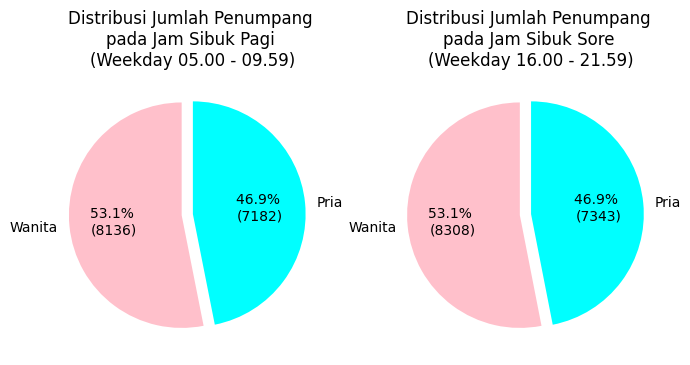

In [ ]:
# Dataframe Distribusi Jumlah Penumpang pada Jam Sibuk Pagi
df0509Gender = df0509.groupby('payCardSex')['transID'].count().reset_index()
df0509Gender['Percentage'] = (df0509Gender['transID'] / df0509Gender['transID'].sum()) * 100

# Dataframe Distribusi Jumlah Penumpang pada Jam Sibuk Sore
df1621Gender = df1621.groupby('payCardSex')['transID'].count().reset_index()
df1621Gender['Percentage'] = (df1621Gender['transID'] / df1621Gender['transID'].sum()) * 100

# Membuat Diagram Pie Plot
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
explode = (0.1, 0)
plt.pie(df0509Gender['transID'], labels=['Wanita','Pria'],
        autopct=lambda p: f'{p:.1f}% \n({int(p * sum(df0509Gender["transID"]) / 100)})',
        explode=explode, startangle=90, colors=['pink', 'cyan'])
plt.title('Distribusi Jumlah Penumpang \npada Jam Sibuk Pagi \n(Weekday 05.00 - 09.59)')

plt.subplot(1, 2, 2)
explode = (0.1, 0)
plt.pie(df1621Gender['transID'], labels=['Wanita','Pria'],
        autopct=lambda p: f'{p:.1f}% \n({int(p * sum(df1621Gender["transID"]) / 100)})',
        explode=explode, startangle=90, colors=['pink', 'cyan'])
plt.title('Distribusi Jumlah Penumpang \npada Jam Sibuk Sore \n(Weekday 16.00 - 21.59)')

plt.show()

>**Penumpang Wanita 1000 orang lebih banyak** pada **Jam Sibuk Pagi dan Jam Sibuk Sore**

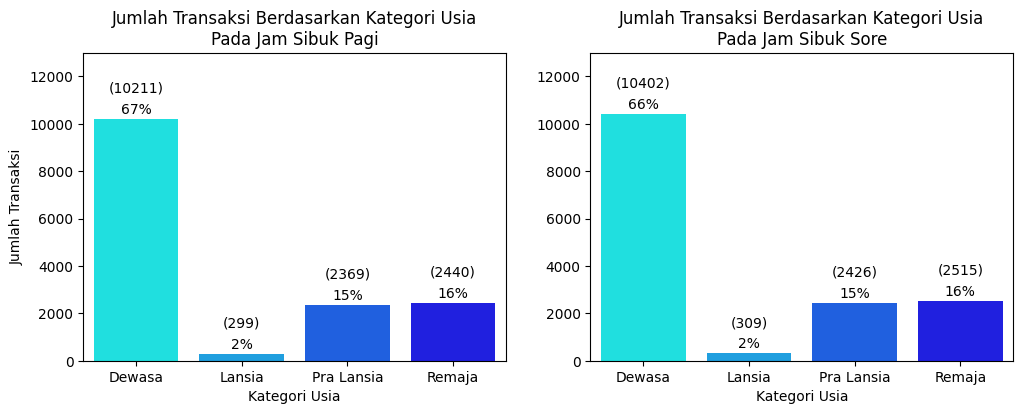

In [ ]:
# Membuat barplot Kategori Usia terhadap jumlah Transaksi
df0509Age = df0509.groupby('ageCategory')['transID'].count().reset_index()
df0509Age['Percentage'] = (df0509Age['transID'] / df0509Age['transID'].sum())*100

df1621Age =df1621.groupby('ageCategory')['transID'].count().reset_index()
df1621Age['Percentage'] = (df1621Age['transID'] / df1621Age['transID'].sum())*100

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.barplot(x=df0509Age['ageCategory'], y=df0509Age['transID'], palette='blend:cyan,blue')
plt.xlabel('Kategori Usia')
plt.ylabel('Jumlah Transaksi')
plt.ylim(0,13000)
plt.title('Jumlah Transaksi Berdasarkan Kategori Usia\nPada Jam Sibuk Pagi')

# Menambahkan label Percentage dari jumlah Transaksi
for i, v in enumerate(df0509Age['transID']):
    plt.text(i, v + 100, f"{df0509Age['Percentage'].iloc[i]:.0f}%", ha='center', va='bottom')

# Menambahkan label jumlah Transaksi
for i, v in enumerate(df0509Age['transID']):
    plt.text(i, v + 1000, f"({v})", ha='center', va='bottom')


plt.subplot(1, 2, 2)
sns.barplot(x=df1621Age['ageCategory'], y=df1621Age['transID'], palette='blend:cyan,blue')
plt.xlabel('Kategori Usia')
plt.ylabel('')
plt.ylim(0,13000)
plt.title('Jumlah Transaksi Berdasarkan Kategori Usia\nPada Jam Sibuk Sore')

# Menambahkan label Percentage dari jumlah Transaksi
for i, v in enumerate(df1621Age['transID']):
    plt.text(i, v + 100, f"{df1621Age['Percentage'].iloc[i]:.0f}%", ha='center', va='bottom')

# Menambahkan label jumlah Transaksi
for i, v in enumerate(df1621Age['transID']):
    plt.text(i, v + 1000, f"({v})", ha='center', va='bottom')

plt.show()

>Dari barplot diatas, segmen lansia masih exist sebagai pengguna Transjakarta pada jam-jam sibuk

###4.3.1 Analisis Peningkatan Fasilitas untuk Meningkatkan Kenyamanan Penumpang Wanita

In [ ]:
# Mengagregasi jumlah transaksi pada koridor berdasarkan gender
dfGender = tj.groupby(by=['corridorID','corridorName','payCardSex'])['transID'].count()

# Mengurutkan data berdasarkan koridor jumlah pengguna wanita terbanyak
dfGenderUnstack = dfGender.unstack().reset_index().sort_values(by='F', ascending=False).head(25)

# Prepare dataframe untuk plotting barplot
dfGenderCopy = dfGender.reset_index()
dfGenderCopy = dfGenderCopy[dfGenderCopy['corridorID'].isin(dfGenderUnstack['corridorID'])]

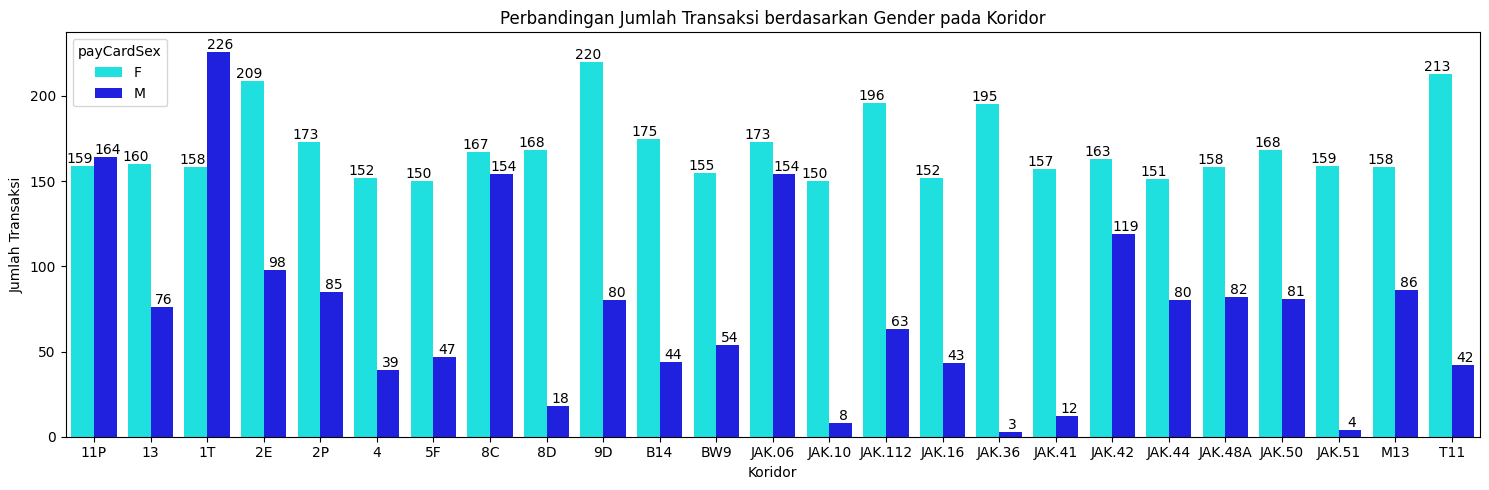

In [ ]:
plt.figure(figsize=(15, 5))
sns.barplot(x='corridorID', y='transID', hue='payCardSex', data=dfGenderCopy, palette='blend:cyan,blue')
plt.xlabel('Koridor')
plt.ylabel('Jumlah Transaksi')
plt.title('Perbandingan Jumlah Transaksi berdasarkan Gender pada Koridor')
plt.tight_layout()

# Menambahkan label jumlah Transaksi
for i, v in enumerate(dfGenderCopy['transID']):
    plt.text(i/2 - 0.26, v , f"{v}", ha='center', va='bottom')

plt.show()

In [ ]:
# Memfilter koridor dengan rasio female terhadap male yang tinggi berdasarkan Q3
dfGenderUnstack['f/m'] = dfGenderUnstack['F']/dfGenderUnstack['M']
dfGenderUnstack = dfGenderUnstack.sort_values('f/m', ascending = False)
dfGenderUnstack[dfGenderUnstack['f/m'] > dfGenderUnstack['f/m'].quantile(0.75)]

payCardSex corridorID                     corridorName    F   M        f/m
157            JAK.36            Cilangkap - Cililitan  195   3  65.000000
174            JAK.51          Taman Kota - Budi Luhur  159   4  39.750000
123            JAK.10               Tanah Abang - Kota  150   8  18.750000
162            JAK.41     Kampung Melayu - Pulo Gadung  157  12  13.083333
94                 8D                   Joglo - Blok M  168  18   9.333333
217               T11  Poris Plawad - Bundaran Senayan  213  42   5.071429

In [ ]:
# Mengecek apakah ada rasio wanita terhadap pria yang bernilai ekstrem
IQR = 1.5 * (dfGenderUnstack['f/m'].quantile(0.75) - dfGenderUnstack['f/m'].quantile(0.25))
lower_bound = dfGenderUnstack['f/m'].quantile(0.25) - IQR
upper_bound = dfGenderUnstack['f/m'].quantile(0.75) + IQR
dfGenderUnstack[(dfGenderUnstack['f/m'] > upper_bound)]

payCardSex corridorID                  corridorName    F   M        f/m
157            JAK.36         Cilangkap - Cililitan  195   3  65.000000
174            JAK.51       Taman Kota - Budi Luhur  159   4  39.750000
123            JAK.10            Tanah Abang - Kota  150   8  18.750000
162            JAK.41  Kampung Melayu - Pulo Gadung  157  12  13.083333
94                 8D                Joglo - Blok M  168  18   9.333333

> Terdapat **rasio wanita terhadap pria** yang ekstrem pada **koridor JAK36, JAK51, 1K, JAK10 dan JAK41**

In [ ]:
# List Koridor dengan Rasio Wanita terhadap Pria tertinggi Berdasarkan Q3
dfTopFemaleCorridor = dfGenderUnstack[(dfGenderUnstack['f/m'] > dfGenderUnstack['f/m'].quantile(0.75))]['corridorID']

In [ ]:
# Membuat agregasi jumlah transaksi wanita per hari pada koridor dengan rasio wanita yang tinggi
dfFemaleDay = (tj[tj['corridorID'].isin(dfTopFemaleCorridor)]
                                  .groupby('tapInDay')['transID'].count()
                                  .reindex('Monday Tuesday Wednesday Thursday Friday Saturday Sunday'.split(' '))
                                  .reset_index())

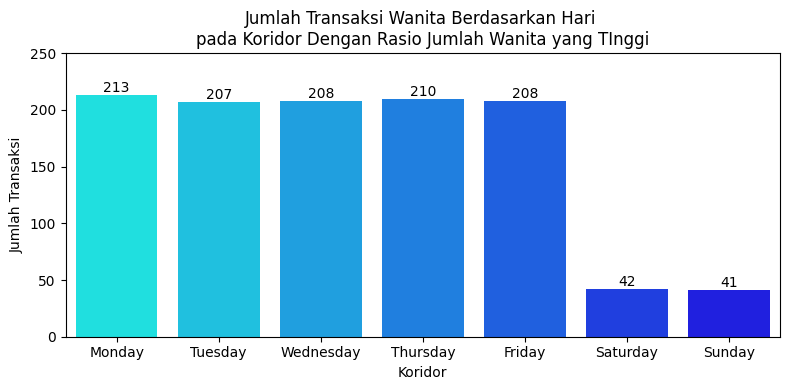

In [ ]:
plt.figure(figsize=(8, 4))
sns.barplot(x='tapInDay', y='transID', data=dfFemaleDay, palette='blend:cyan,blue')
plt.xlabel('Koridor')
plt.ylabel('Jumlah Transaksi')
plt.title('Jumlah Transaksi Wanita Berdasarkan Hari \npada Koridor Dengan Rasio Jumlah Wanita yang TInggi')
plt.ylim(0,250)
plt.tight_layout()

# Menambahkan label jumlah Transaksi
for i, v in enumerate(dfFemaleDay['transID']):
  plt.text(i, v , f"{v}", ha='center', va='bottom')

plt.show()

>Jumlah wanita pada koridor JAK36, JAK51, 1K, JAK10, JAK41 dan 8D pada saat Weekday lebih tinggi daripada Weekend

In [ ]:
# Membuat agregasi jumlah transaksi wanita per jam saat weekday pada koridor dengan rasio wanita yang tinggi
dfFemaleHourWeekday = (tj[tj['corridorID'].isin(dfTopFemaleCorridor)][tj[tj['corridorID'].isin(dfTopFemaleCorridor)]['tapInDay'].isin('Monday Tuesday Wednesday Thursday Friday'.split(' '))]
                      .groupby(['tapInHour'])['transID'].count()
                      .reset_index()
                      )

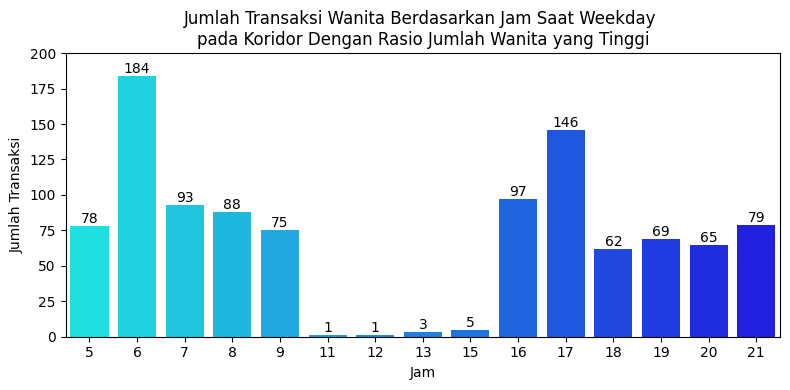

In [ ]:
plt.figure(figsize=(8, 4))
sns.barplot(x='tapInHour', y='transID', data=dfFemaleHourWeekday, palette='blend:cyan,blue')
plt.xlabel('Jam')
plt.ylabel('Jumlah Transaksi')
plt.title('Jumlah Transaksi Wanita Berdasarkan Jam Saat Weekday \npada Koridor Dengan Rasio Jumlah Wanita yang Tinggi')
plt.ylim(0,200)
plt.tight_layout()

# Menambahkan label jumlah Transaksi
for i, v in enumerate(dfFemaleHourWeekday['transID']):
  plt.text(i, v , f"{v}", ha='center', va='bottom')

plt.show()

In [ ]:
# Filter data berdasarkan jumlah transaksi berdasarkan Q3
dfFemaleHourWeekday[(dfFemaleHourWeekday['transID'] > dfFemaleHourWeekday['transID'].quantile(0.75))]

tapInHour  transID
1           6      184
2           7       93
9          16       97
10         17      146

> Jumlah wanita pada koridor JAK36, JAK51, 1K, JAK10, JAK41 dan 8D memiliki peak pada pukul 06.00 - 07.59 dan 16.00-17.59

In [ ]:
# Mengecek apakah terdapat jumlah transaksi berdasarkan jam yang jumlah nya ekstrem
IQR = (dfFemaleHourWeekday['transID'].quantile(0.75) - dfFemaleHourWeekday['transID'].quantile(0.25)) * 1.5
upper_bound = dfFemaleHourWeekday['transID'].quantile(0.75) + IQR
lower_bound = dfFemaleHourWeekday['transID'].quantile(0.25) - IQR
dfFemaleHourWeekday[(dfFemaleHourWeekday['transID'] > upper_bound)]

tapInHour  transID
1          6      184

In [ ]:
# Membuat agregasi jumlah transaksi wanita per jam saat weekend pada koridor dengan rasio wanita yang tinggi
dfFemaleHourWeekend = (tj[tj['corridorID'].isin(dfTopFemaleCorridor)][tj[tj['corridorID'].isin(dfTopFemaleCorridor)]['tapInDay'].isin('Saturday Sunday'.split(' '))]
                      .groupby(['tapInHour'])['transID'].count()
                      .reset_index()
                      )

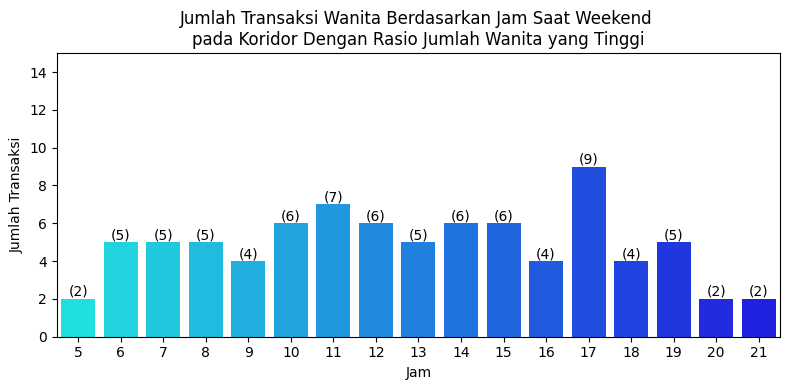

In [ ]:
plt.figure(figsize=(8, 4))
sns.barplot(x='tapInHour', y='transID', data=dfFemaleHourWeekend, palette='blend:cyan,blue')
plt.xlabel('Jam')
plt.ylabel('Jumlah Transaksi')
plt.title('Jumlah Transaksi Wanita Berdasarkan Jam Saat Weekend \npada Koridor Dengan Rasio Jumlah Wanita yang Tinggi')
plt.ylim(0,15)
plt.tight_layout()

# Menambahkan label jumlah Transaksi
for i, v in enumerate(dfFemaleHourWeekend['transID']):
  plt.text(i, v , f"({v})", ha='center', va='bottom')

plt.show()

> Saat weekend, Jumlah wanita pada koridor JAK36, JAK51, 1K, JAK10, JAK41 dan 8D berdasarkan jam memiliki jumlah yang rendah

### Solusi 4.3.1

1. **Koridor JAK36, JAK51, 1K, JAK10, JAK41 dan 8D** memiliki **jumlah penumpang wanita dengan rasio yang tinggi** dibanding penumpang pria
2. Pada koridor tersebut jumlah wanita terbanyak terjadi pada saat **weekday (senin-jumat)** pada jam **06.00 - 07.59 dan 16.00 - 17.59**
3. Perlu diterapkan **kendaraan Transjakarta khusus wanita** yang beroperasi pada **koridor JAK36, JAK51, 1K, JAK10, JAK41 dan 8D** di hari **Senin - Jumat** pada pukul **06.00 - 07.59 dan 16.00 - 17.59**, dengan pukul **06.00-06.59** sebagai prioritas

###4.3.2  Analisis Peningkatan Fasilitas untuk Meningkatkan Kenyamanan Penumpang Lansia

Klasifikasi usia menurut Kementerian Kesehatan (Kemenkes) adalah sebagai berikut:
1. Bayi baru lahir: 0–28 hari
2. Bayi: 0–11 bulan
3. Anak balita: 12–59 bulan
4. Anak prasekolah: 60–72 bulan
5. Anak usia sekolah: lebih dari 6 tahun, tetapi kurang dari 18 tahun
6. Remaja: 10–18 tahun
7. Dewasa: 19–44 tahun
8. Pra lanjut usia: 45–59 tahun
9. Lansia: 60 tahun ke atas

In [ ]:
# Mengagregasi jumlah transaksi berdasarkan klasifikasi usia
dfAgeCategory = (tj.groupby(['ageCategory'])['transID'].count()
                        .reset_index()
                        )
dfAgeCategory['percentage'] = dfAgeCategory['transID']/dfAgeCategory['transID'].sum() * 100
dfAgeCategory

ageCategory  transID  percentage
0      Dewasa    23255   66.475145
1      Lansia      705    2.015265
2  Pra Lansia     5389   15.404625
3      Remaja     5634   16.104965

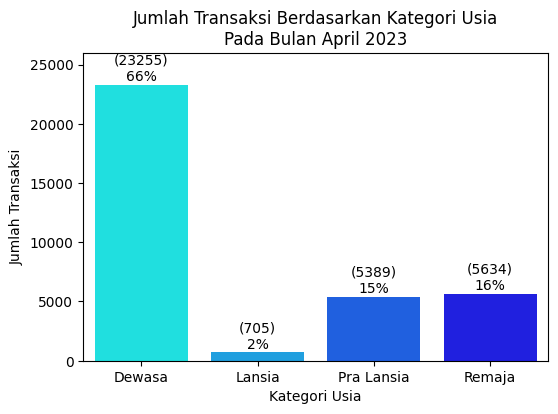

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x=dfAgeCategory['ageCategory'], y=dfAgeCategory['transID'], palette='blend:cyan,blue')
plt.xlabel('Kategori Usia')
plt.ylabel('Jumlah Transaksi')
plt.ylim(0,26000)
plt.title('Jumlah Transaksi Berdasarkan Kategori Usia\nPada Bulan April 2023')

# Menambahkan label percentage dari jumlah Transaksi
for i, v in enumerate(dfAgeCategory['transID']):
    plt.text(i, v + 100, f"{dfAgeCategory['percentage'].iloc[i]:.0f}%", ha='center', va='bottom')

# Menambahkan label jumlah Transaksi
for i, v in enumerate(dfAgeCategory['transID']):
    plt.text(i, v + 1500, f"({v})", ha='center', va='bottom')

plt.show()

Lansia memiliki **proporsi 2%** dari total penumpang secara keseluruhan. Namun **perlu tetap mendapat perhatian khusus** dalam peningkatan pelayanan terhadap Lansia agar Lansia dapat merasa nyaman selama menggunakan layanan Transjakarta

In [ ]:
# agregasi jumlah penumpang lansia berdasarkan koridor
dfLansia = (tj[tj['ageCategory']=='Lansia'].groupby(['corridorID','corridorName'])['transID'].count()
                                      .sort_values(ascending=False)
                                      .reset_index()
                                      )
dfLansia['percentage'] = 100 * dfLansia['transID']/dfLansia['transID'].sum()
print(f'Terdapat Total {len(dfLansia)} Koridor yang memiliki penumpang lansia')


Terdapat Total 81 Koridor yang memiliki penumpang lansia


In [ ]:
# filter berdasarkan koridor dengan jumlah lansia tertinggi
dfLansia = dfLansia.head(20)
dfLansia.head()

corridorID                      corridorName  transID  percentage
0         6V       Ragunan - Gelora Bung Karno       73   10.354610
1         7C                     Cibubur - BKN       39    5.531915
2         M1                     Blok M - Kota       38    5.390071
3        10D  Kampung Rambutan - Tanjung Priok       38    5.390071
4         6N       Ragunan - Blok M via Kemang       38    5.390071

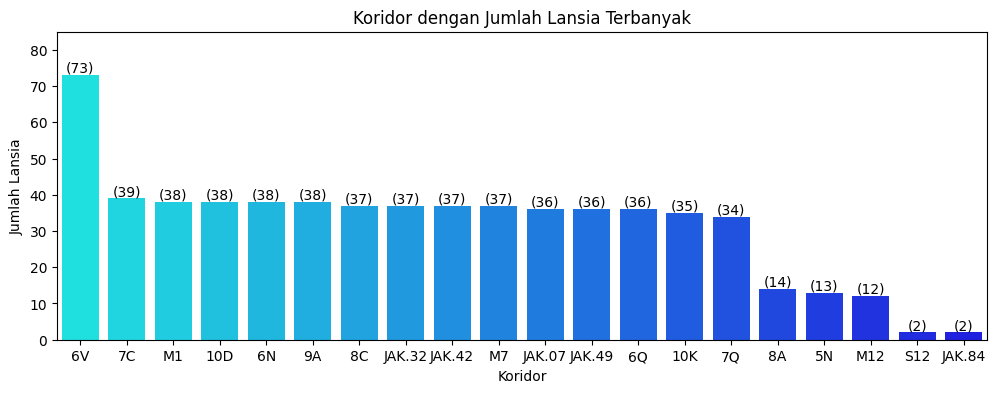

In [ ]:
plt.figure(figsize=(12, 4))
sns.barplot(y=dfLansia['transID'],x=dfLansia['corridorID'], palette='blend:cyan,blue')
plt.ylabel('Jumlah Lansia')
plt.xlabel('Koridor')
plt.title('Koridor dengan Jumlah Lansia Terbanyak')
plt.ylim(0,85)

# Menambahkan label jumlah Transaksi
for i, v in enumerate(dfLansia['transID']):
    plt.text(i, v , f"({v})", ha='center', va='bottom')

plt.show()

In [ ]:
# FIlter jumlah penumpang lansia berdasarkan Q3
dfLansia[(dfLansia['transID'] > dfLansia['transID'].quantile(0.75))]

corridorID                 corridorName  transID  percentage
0         6V  Ragunan - Gelora Bung Karno       73   10.354610
1         7C                Cibubur - BKN       39    5.531915

In [ ]:
# Mengecek apakah ada jumlah penumpang lansia yang ekstrem
IQR = 1.5 * (dfLansia['transID'].quantile(0.75) - dfLansia['transID'].quantile(0.25))
upper=dfLansia['transID'].quantile(0.75) + IQR
lower=dfLansia['transID'].quantile(0.25) - IQR
dfLansia[(dfLansia['transID'] > upper)]

corridorID                 corridorName  transID  percentage
0         6V  Ragunan - Gelora Bung Karno       73    10.35461

- Koridor dengan **jumlah lansia yang tinggi** terdapat pada **Koridor 6V dan 7C**
- **Koridor 6V memiliki jumlah penumpang yang lebih tinggi** dibanding koridor lainnya

In [ ]:
# Menentukan Pola Jumlah Pengguna Lansia berdasarkan Hari pada koridor 6V dan 7C
dfLansiaPerDay = (tj[tj['ageCategory']=='Lansia']
      [tj['corridorID'].isin(['6V','7C'])]
      .groupby(['tapInDay'])['transID'].count()
      .reindex(['Monday','Tuesday','Wednesday','Thursday','Friday'])
      .reset_index()
      )

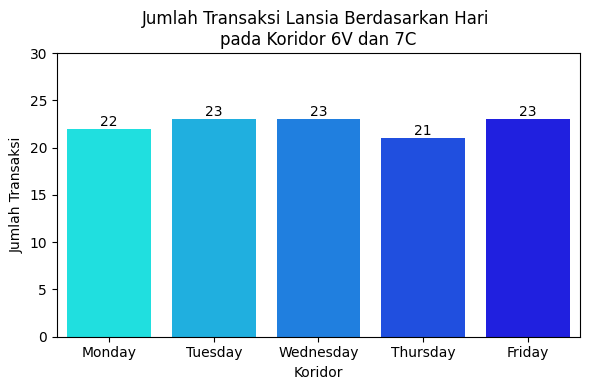

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x='tapInDay', y='transID', data=dfLansiaPerDay, palette='blend:cyan,blue')
plt.xlabel('Koridor')
plt.ylabel('Jumlah Transaksi')
plt.title('Jumlah Transaksi Lansia Berdasarkan Hari \npada Koridor 6V dan 7C')
plt.ylim(0,30)
plt.tight_layout()

# Menambahkan label jumlah Transaksi
for i, v in enumerate(dfLansiaPerDay['transID']):
  plt.text(i, v , f"{v}", ha='center', va='bottom')

plt.show()

- Lansia di koridor **6V dan 7C** hanya ada pada **weekday (Senin - Jumat)**
- Tidak ada lansia pada akhir pekan

In [ ]:
# Menentukan Pola Jumlah Lansia berdasarkan Jam pada hari weekday
dfLansiaHour = (tj[tj['ageCategory']=='Lansia']
      [tj['corridorID'].isin(['6V','7C'])]
      .groupby(['tapInHour'])['transID'].count()
      .reset_index()
      )

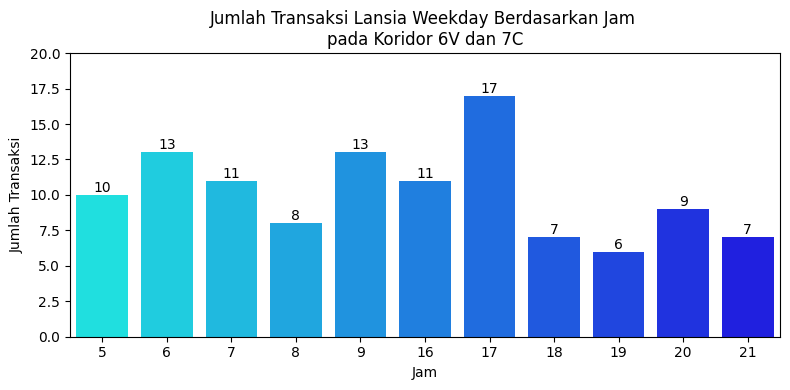

In [ ]:
plt.figure(figsize=(8, 4))
sns.barplot(x='tapInHour', y='transID', data=dfLansiaHour, palette='blend:cyan,blue')
plt.xlabel('Jam')
plt.ylabel('Jumlah Transaksi')
plt.title('Jumlah Transaksi Lansia Weekday Berdasarkan Jam \npada Koridor 6V dan 7C')
plt.ylim(0,20)
plt.tight_layout()

# Menambahkan label jumlah Transaksi
for i, v in enumerate(dfLansiaHour['transID']):
  plt.text(i, v , f"{v}", ha='center', va='bottom')

plt.show()

In [ ]:
#Memfilter jumlah lansia berdasarkan dengan mengacu pada Q3
dfLansiaHour[dfLansiaHour['transID'] > dfLansiaHour['transID'].quantile(0.75)]

tapInHour  transID
1          6       13
4          9       13
6         17       17

In [ ]:
# Mengecek apakah ada jumlah lansia perjam yang ekstrem
IQR = (dfLansiaHour['transID'].quantile(0.75) - dfLansiaHour['transID'].quantile(0.25)) * 1.5
lower_bound = dfLansiaHour['transID'].quantile(0.25) - IQR
upper_bound = dfLansiaHour['transID'].quantile(0.75) + IQR
dfLansiaHour[(dfLansiaHour['transID'] > upper_bound)]

Empty DataFrame
Columns: [tapInHour, transID]
Index: []

Jam dengan **jumlah transaksi lansia tertinggi** pada **koridor 6V dan 7C** adalah
- 06.00 - 06.59
- 09.00 - 09.59
- 17.00 - 17.59

### Solusi 4.3.2

1. Koridor **6V dan 7C** memiliki **jumlah Lansia yang tertinggi** dibandingkan dengan Koridor lainnya. Pada koridor tersebut, **jumlah lansia tertinggi** terjadi pada saat **weekday** pada pukul:
  - 06.00-06.59  
  - 09.00-09.59
  - 17.00-17.59


2. Kendaraan yang **beroperasi** di **koridor 6V dan 7C** harus **menyediakan tempat duduk khusus lansia yang lebih banyak** saat weekday pukul:
  - 06.00-06.59  
  - 09.00-09.59
  - 17.00-17.59


#5 Penutup

##5.1 Kesimpulan

###5.1.1 Untuk mengurangi beban operasional operasi Transjakarta atau meningkatkan pemasukan dapat dilakukan tindakan sebagai berikut.



1. Pihak Transjakarta dihimbau untuk tidak menaikkan tarif karena akan membebani masyarakat. Penyebabnya adalah karena bertentangan dengan Visi dan Misi TransJakarta yang ingin memudahkan dan membahagiakan kehidupan Jakarta
2. Mempertimbangkan untuk menonaktifkan koridor yang jarang digunakan oleh masyarakat yaitu **Koridor M5, 7B, JAK12, JAK99, 1R, 2Q dan JAK53**. Penyebabnya adalah karena pada koridor tersebut terjadi kondisi tanpa penumpang **(0 penumpang)** dalam **>= 15 Hari** di bulan April 2023.
3. Mempertimbangkan untuk **menonaktifkan 111 halte** yang jarang digunakan. Penyebabnya adalah karena halte tersebut berada pada **koridor dengan transaksi terendah** dan pada halte tersebut hanya terdapat **1 aktivitas saja pada bulan April 2023**. List halte dapat dilihat pada tabel [berikut](#halteHapus)
4. Meningkatkan kerjasama dengan pihak bank yang selama ini mendapat keuntungan dari pengguna yang menggunakan kartunya untuk bertransaksi yaitu **Bank DKI dan Bank Mandiri**. **Bank DKI perlu diprioritaskan** karena memiliki proporsi **jumlah transaksi dan jumlah uang yang jauh lebih tinggi** dari bank lainnya.


###5.1.2 Strategi pengelolaan sistem TransJakarta pada jam-jam padat adalah sebagai berikut

####5.1.2.1 Pada jam sibuk pagi hari (weekday) 05.00 - 09.59

##### 5.1.2.1.1 Pemindahan Alokasi Kendaraan dari Koridor dengan Jumlah Transaksi Rendah ke Koridor dengan Jumlah Transaksi Tinggi

  + Pada Jam Sibuk Kerja Pagi, kendaraan pada **Koridor M5, JAK53, 1R, JAK99, JAK12 dan 2Q** dapat **dialokasikan** ke **Koridor 1T, S21, JIS3, JAK06, 11P dan 8C**
  + **Koridor 1T** adalah koridor dengan prioritas utama untuk dialokasikan kendaraan lebih banyak kedalamnya

#####5.1.2.1.2 Alokasi Kendaraan pada Koridor dengan Jumlah Transaksi Tinggi pada Jam Sibuk Kerja Pagi berdasarkan Direction

  Pada Koridor dengan jumlah transaksi terbanyak pada jam sibuk pagi hari, dapat dilakukan optimalisasi berdasarkan direction nya:
1. **Jumlah kendaraan direction go** pada koridor **S21, JAK72, 12, 9N dan 3C** harus **dialokasikan lebih banyak** daripada direction back-nya. **Koridor JAK72** harus mendapat prioritas utama.  
2. **Jumlah kendaraan direction back** pada koridor **8C dan M10** harus **dialokasikan lebih banyak** daripada direction go-nya. **Koridor M10** harus mendapat prioritas utama.

##### 5.1.2.1.2 Rekayasa Jalur Pada Corridor Terpadat pada Jam Sibuk Kerja Pagi Hari

1. Pada jam sibuk kerja pagi, didapati data bahwa **penumpang hanya terdapat pada lintasan halte tertentu saja**. Artinya, ketika kendaraan Transjakarta bergerak dari halte awal (stopStart Seq = 0) sampai dengan halte pada ujung koridor, **terdapat kondisi dimana tidak ada penumpang yang berada pada kendaraan tersebut**. Tentunya hal tersebut menjadi tidak efektif dan efisien. Oleh karena itu **kendaraan tidak harus bergerak dari ujung halte koridor ke ujung halte koridor**
2. Pada **direction go**, terdapat koridor yang perlu diefektifkan perjalannya **agar tidak perlu bergerak dari halte awal (stopStart Seq = 0) sampai ujung halte koridor** yaitu **koridor 1T, 6V, 9N, JIS3, dan M13** dengan detail info pada tabel [berikut](#pagigo)
2. Pada **direction back**, terdapat koridor yang perlu diefektifkan perjalannya **agar tidak perlu bergerak dari halte awal (stopStart Seq = 0) sampai ujung halte koridor** yaitu **koridor 12, 5, 6N, 9N, JIS3, dan M13** dengan detail info pada tabel [berikut](#pagiback)

####5.1.2.1 Pada jam sibuk sore hari (weekday) 16.00 - 21.59

##### 5.1.2.1.2 Pemindahan Alokasi Kendaraan dari Koridor dengan Jumlah Transaksi Rendah ke Koridor dengan Jumlah Transaksi Tinggi

1. Pada Jam Sibuk Kerja Sore, kendaraan pada **Koridor M5, JAK12, JAK99, JAK53, 1R, 2Q dan 7P** dapat **dialokasikan** ke **Koridor 1T, S21, JAK06, 11P, JIS3 dan 8C**
2. **Koridor M5 dan JAK12** adalah Koridor dengan prioritas utama **agar kendaraan didalamnya dialihkan ke koridor lain**
3. **Koridor 1T dan S21** adalah koridor dengan prioritas utama **untuk dialokasikan kendaraan lebih banyak kedalamnya**

#####5.1.2.1.2 Alokasi Kendaraan pada Koridor dengan Jumlah Transaksi Tinggi pada Jam Sibuk Kerja Sore berdasarkan Direction

Pada Koridor dengan jumlah transaksi terbanyak pada jam sibuk sore hari, dapat dilakukan optimalisasi berdasarkan direction nya:
1. **Jumlah kendaraan direction go** pada koridor **M10 dan 2P** harus **dialokasikan lebih banyak** daripada direction back-nya.
2. **Jumlah kendaraan direction back** pada koridor **JAK72, 12, 5C dan JAK50** harus **dialokasikan lebih banyak** daripada direction go-nya. **Koridor JAK72** harus mendapat prioritas utama.

##### 5.1.2.1.3 Rekayasa Jalur Pada Corridor Terpadat pada Jam Sibuk Kerja Sore Hari

1. Pada jam sibuk kerja sore, didapati data bahwa **penumpang hanya terdapat pada lintasan halte tertentu saja**. Artinya, ketika kendaraan Transjakarta bergerak dari halte awal (stopStart Seq = 0) sampai dengan halte pada ujung koridor, **terdapat kondisi dimana tidak ada penumpang yang berada pada kendaraan tersebut**. Tentunya hal tersebut menjadi tidak efektif dan efisien. Oleh karena itu **kendaraan tidak harus bergerak dari ujung koridor halte ke ujung koridor halte**
2. Pada **direction go**, terdapat koridor yang perlu diefektifkan perjalannya **agar tidak bergerak dari halte awal (stopStart Seq = 0) sampai ujung halte koridor** yaitu **koridor 12, 13, 2P, 5C, JIS3, dan JAK72** dengan detail info pada tabel [berikut](#sorego)
3. Pada **direction back**, terdapat koridor yang perlu diefektifkan perjalannya **agar tidak bergerak dari halte awal (stopStart Seq = 0) sampai ujung halte koridor** yaitu **koridor 13, 1T, 2, 2E, JIS3, dan M10** dengan detail info pada tabel [berikut](#soreback)

###5.1.3 Langkah nyata yang dapat dilakukan untuk meningkatkan kenyamanan pada penumpang wanita atau segmen penumpang lansia adalah sebagai berikut.

1. Perlu diterapkan **kendaraan Transjakarta khusus wanita** yang beroperasi pada **koridor JAK36, JAK51, 1K, JAK10, JAK41 dan 8D** di hari **Senin - Jumat** pada pukul **06.00 - 07.59 dan 16.00 - 17.59**, dimana pukul **06.00-06.59** adalah jam prioritas
2. Kendaraan yang **beroperasi** di **koridor 6V dan 7C** harus **menyediakan tempat duduk khusus lansia yang lebih banyak** saat weekday pukul:
  - 06.00-06.59  
  - 09.00-09.59
  - 17.00-17.59

##5.2 Saran

Agar analisis dapat dilakukan lebih komprehensif, maka terdapat beberapa masukan untuk analisis selanjutnya

1. Diperlukan **data aktual kedatangan dan keberangkatan kendaraan pada tiap halte**, hal tersebut bertujuan agar dapat diketahui durasi perjalanan antar halte dengan akurat. Jika digunakan data selisih antara tapInTime dan tapOutTime untuk mencari durasi perjalanan maka hasilnya tidak akan akurat karena bisa saja penumpang sudah standby di halte belasan menit sebelum kendaraannya tiba di halte tersebut
2. Diperlukan **data jarak aktual jalur yang dilalui dari satu halte ke halte yang lain**. Jika digunakan pendekatan haversine untuk menkonversi selisih longitude dan lattitude menjadi jarak dalam satuan KM, maka hasilnya tidak akan akurat. Hal tersebut dikarenakan metode tersebut digunakan untuk mencari jarak terdekat antara dua posisi berdasarkan garis lurus. Faktanya, jalan yang dilalui oleh kendaraan Transjakarta dari 1 halte ke halte lainnya tidak mungkin selalu lurus.
3. Jika data pada poin (1) dan poin (2) didapat, maka dapat ditentukan **jalur pada koridor mana saja yang perlu dilakukan sterilisasi** agar menjadi antimacet sehingga durasi perjalanannya bisa optimum
4. Diperlukan **data kendaraan yang digunakan pada setiap koridor** seperti **jumlah tempat duduk untuk umum, jumlah tempat duduk lansia, jumlah tempat duduk wanita dan kapasitas maksimal penumpang untuk berdiri**. Dengan adanya data tersebut maka dapat ditentukan **berapa jumlah kendaraan yang diperlukan** sehingga quantity kendaraan dapat di-*state* pada kesimpulan bagian 5.1.2 dan 5.1.3